## **<span style="color:#023e8a;font-size:200%"><center> 🔥🔥EDA H&M🔥🔥</center></span>**

## **<span style="color:#023e8a;font-size:1000%"><center>EDA</center></span><span style="color:#023e8a;font-size:200%"><center>Exploratory Data Analysis. H&M</center></span>**

In [1]:
# !curl "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/31254/3103714/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1683545162&Signature=fa20KRSsS%2BXUIkURQYukFL11DUUp9SA46lGH%2B0lMb6RNDGNJIIE0Uq6aXnE9%2BYqQMaoN36RxOHIzR7ESeQVDqShTV6kEp5xZY%2BA7im7FDnJwS4D0z%2B6f6YckGW2BWlMbQUh%2FBDHQsbtGy0Eno7bylR8%2BWh0k2kT3q0dg%2BYFWOhng2H0gzywRNMX7GrdE82UZHJX21rLEF94IHUjUSAWP9YVTMWcD8cFmPif4nRQmU8%2BckiAVpAgi%2F%2BsDw2RTwtRWgO8RkBNGF5d4XMGil3DxYeYMa5%2FQreGHYA%2FtzhFXDYG2F41qDGAXB%2FGX%2FHekQJ1Qu6pUpM0DNWIQdhGJnqBf4w%3D%3D&response-content-disposition=attachment%3B+filename%3Dh-and-m-personalized-fashion-recommendations.zip" -o "h-and-m-personalized-fashion-recommendations.zip"

In [2]:
# !unzip /content/h-and-m-personalized-fashion-recommendations.zip

# **<a id="Content" style="color:#023e8a;">Table of Content</a>**
* [**<span style="color:#023e8a;">1. Dataset</span>**](#Dataset)  
* [**<span style="color:#023e8a;">2. Articles</span>**](#Articles)  
* [**<span style="color:#023e8a;">3. Customers</span>**](#Customers)  
* [**<span style="color:#023e8a;">4. Transactions</span>**](#Transactions)  
* [**<span style="color:#023e8a;">5. Recommender System</span>**](#Recommendation)  

## **<span style="color:#023e8a;">Intro</span>**

**<span style="color:#023e8a;">The main goal is to do product recomendations (H&M)  </span>**

**<span style="color:#023e8a;">Here we have different kinds of data that help us to get good recomendations: </span>**



<center><h1>- Data Exploration -</h1></center>

>  🛍️ **Goal:** For each customer within the training data we need to predict up to 12 products that the customer will buy in the next 7-day period *after* the training time period. We can predict up to *12 products* that the customer will likely be purchasing in the 7-day period.


### ⬇ Helper Functions

In [3]:
def adjust_id(x):
    '''Adjusts article ID code.'''
    x = str(x)
    if len(x) == 9:
        x = "0"+x
    
    return x

# def insert_image(path, zoom, xybox, ax):
#     '''Insert an image within matplotlib'''
#     imagebox = OffsetImage(mpimg.imread(path), zoom=zoom)
#     ab = AnnotationBbox(imagebox, xy=(0.5, 0.7), frameon=False, pad=1, xybox=xybox)
#     ax.add_artist(ab)
    
    
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## **<span id="Dataset" style="color:#023e8a;">1. Dataset</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)


🛍️ **There are 3 metadata .csv files and 1 image file:**
* 📸 `images` - images of every article_id
* 🙋 `articles`  - detailed metadata of every article_id **(105,542 datapoints)**
* 👔 `customers`  - detailed metadata of every customer_id **(1,371,980 datapoints)**
* 🧾 `transactions_train`  - file containing the `customer_id`, the article that was bought and at what price **(31,788,324 datapoints)**

**<span style="color:#023e8a;"> The first step as always: load the data :)</span>**


### ⬇ Libraries

Notebook Color Scheme:


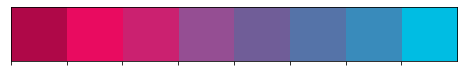

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import plotly.express as px
import warnings
import glob
import gc
from wordcloud import WordCloud, STOPWORDS

plt.rcParams.update({'font.size': 16})

# Environment check
warnings.filterwarnings("ignore")

# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'
    
my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]
print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

# bk_image = plt.imread("../input/hm-fashion-recommender-dataset/background.jpg")

In [5]:
data_dir = "./data/"
image_dir = '../data/images/*/*'

In [6]:
transactions = pd.read_csv(data_dir + 'transactions_train.csv', dtype={"t_dat": "object", "article_id": "object", "price": float, "sales_channel_id": int})

Memory Efficieny

In [7]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['year'] = (transactions['t_dat'].dt.year-2000).astype('int8')
transactions['month'] = (transactions['t_dat'].dt.month).astype('int8')
transactions['day'] = (transactions['t_dat'].dt.day).astype('int8')
transactions.drop('t_dat', axis=1, inplace=True)
transactions['price'] = transactions['price'].astype('float32')
transactions['sales_channel_id'] = transactions['sales_channel_id'].astype('int8')
# transactions['article_id'] = transactions['article_id'].astype('int32')

In [8]:
articles = pd.read_csv(data_dir + 'articles.csv')

In [9]:
customers = pd.read_csv(data_dir + 'customers.csv')

In [10]:
# id_to_index_dict = dict(zip(customers["customer_id"], customers.index))
# index_to_id_dict = dict(zip(customers.index, customers["customer_id"]))
# # for memory efficiency
# transactions["customer_id"] = transactions["customer_id"].map(id_to_index_dict)
# transactions["customer_id"] = transactions["customer_id"].astype('int32')

**<span style="color:#023e8a;"> Let's look at the tables and try to get some outcomes about data inside.</span>**

Lets take a closer look at the data

There are 3 main tables:
- **articles** - contains informations about each article (like product code, name, product group code, name ...)    
- **customers** - contains informations about each customer (fidelity card membership, age, postal code)
- **transactions** (train)  

Transactions have `customer_id` and `article_id`, which are foreign keys for the customer and articles tables.
Beside this, transaction also contains `sales_channel_id`.

## **<span id="Articles" style="color:#023e8a;">2. Articles</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)


**<span style="color:#023e8a;"> This table contains all h&m articles with details such as a type of product, a color, a product group and other features.</span>**  
**<span style="color:#023e8a;"> Article data description: </span>**

> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article.</span>**  
> `product_code`, `prod_name` **<span style="color:#023e8a;">: A unique identifier of every product and its name (not the same).</span>**  
> `product_type`, `product_type_name` **<span style="color:#023e8a;">: The group of product_code and its name</span>**  
> `graphical_appearance_no`, `graphical_appearance_name` **<span style="color:#023e8a;">: The group of graphics and its name</span>**  
> `colour_group_code`, `colour_group_name` **<span style="color:#023e8a;">: The group of color and its name</span>**  
> `perceived_colour_value_id`, `perceived_colour_value_name`, `perceived_colour_master_id`, `perceived_colour_master_name` **<span style="color:#023e8a;">: The added color info</span>**  
> `department_no`, `department_name`: **<span style="color:#023e8a;">: A unique identifier of every dep and its name</span>**  
> `index_code`, `index_name`: **<span style="color:#023e8a;">: A unique identifier of every index and its name</span>**  
> `index_group_no`, `index_group_name`: **<span style="color:#023e8a;">: A group of indeces and its name</span>**  
> `section_no`, `section_name`: **<span style="color:#023e8a;">: A unique identifier of every section and its name</span>**  
> `garment_group_no`, `garment_group_name`: **<span style="color:#023e8a;">: A unique identifier of every garment and its name</span>**  
> `detail_desc`: **<span style="color:#023e8a;">: Details</span>**  

## I. Preprocessing

🛍️ **Important Notes**:
* There are *more* `article_ids` than actual images:
    * unique article ids: 105,542
    * unique images: 105,100
* The `path` processing was taking too long, so the fastest (takes 1 second) way to do it was to create a variable that contains all article ids within the `images` folder (remember, `set()` is faster than a `list`), and then to correct any path that was invalid within the `articles.csv` file.
* There are only 416 missing values within the `desc` column - product description

In [11]:
print(clr.S+"ARTICLES:"+clr.E, articles.shape)
articles.head()

ARTICLES: (105542, 25)


article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

In [12]:
print(clr.S+"There are no missing values in any columns but 'Detail Description':"+clr.E,
      articles.isna().sum()[-1], "total missing values")

# Replace missing values
articles.fillna(value="No Description", inplace=True)

# Adjust the article ID and product code to be string & add "0"
articles["article_id"] = articles["article_id"].apply(lambda x: adjust_id(x))
articles["product_code"] = articles["article_id"].apply(lambda x: x[:3])

There are no missing values in any columns but 'Detail Description': 416 total missing values


In [13]:
# Get all paths from the image folder
all_image_paths = glob.glob(image_dir)

print(clr.S+"Number of unique article_ids within articles.csv:"+clr.E, len(articles), "\n"+
      clr.S+"Number of unique images within the image folder:"+clr.E, len(all_image_paths), "\n"+
      clr.S+"=> not all article_ids have a corresponding image!!!"+clr.E, "\n")

# Get all valid article ids
# Create a set() - as it moves faster than a list
all_image_ids = set()

for path in tqdm(all_image_paths):
    article_id = path.split('/')[-1].split('.')[0]
    all_image_ids.add(article_id)

Number of unique article_ids within articles.csv: 105542 
Number of unique images within the image folder: 0 
=> not all article_ids have a corresponding image!!! 



0it [00:00, ?it/s]

## II. Explore

**<span style="color:#023e8a;">Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.</span>**

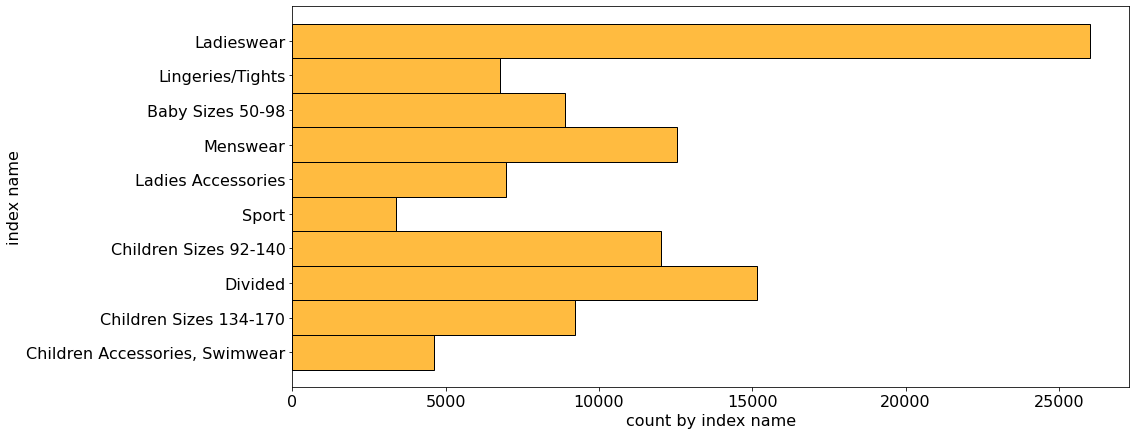

In [14]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

**<span style="color:#023e8a;"> The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. The next by number is accessories, many various accessories with low price.</span>**

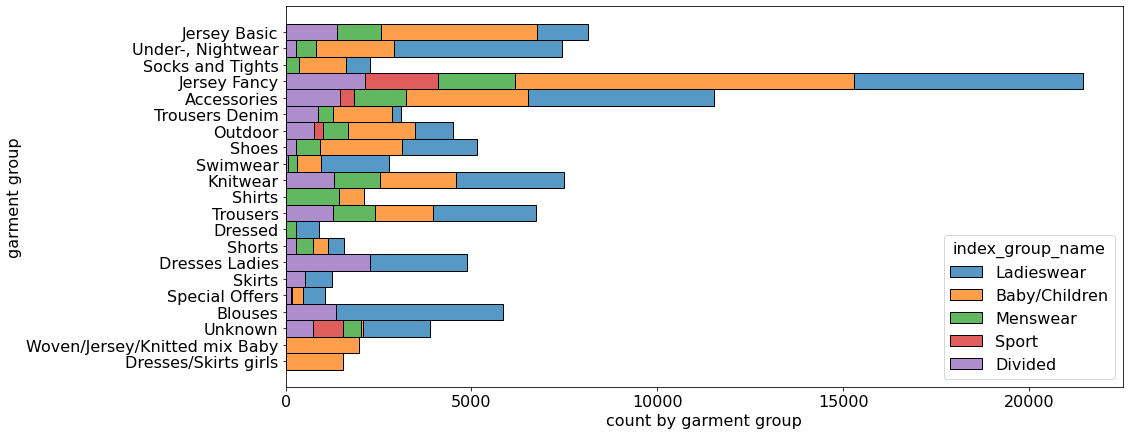

In [15]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

In [16]:
label = articles.index_group_name.unique()
count1 = articles.index_group_name.value_counts()
fig = px.pie(articles, values=count1, title="Pie Chart on Type on Products", names=label,color_discrete_sequence=px.colors.sequential.Purpor)
fig.show()

[link text](https:// [link text](https://))
**<span style="color:#023e8a;">Most sold product is the Dragonfly dress.</span>**

Total Number of unique Product Names: 45875


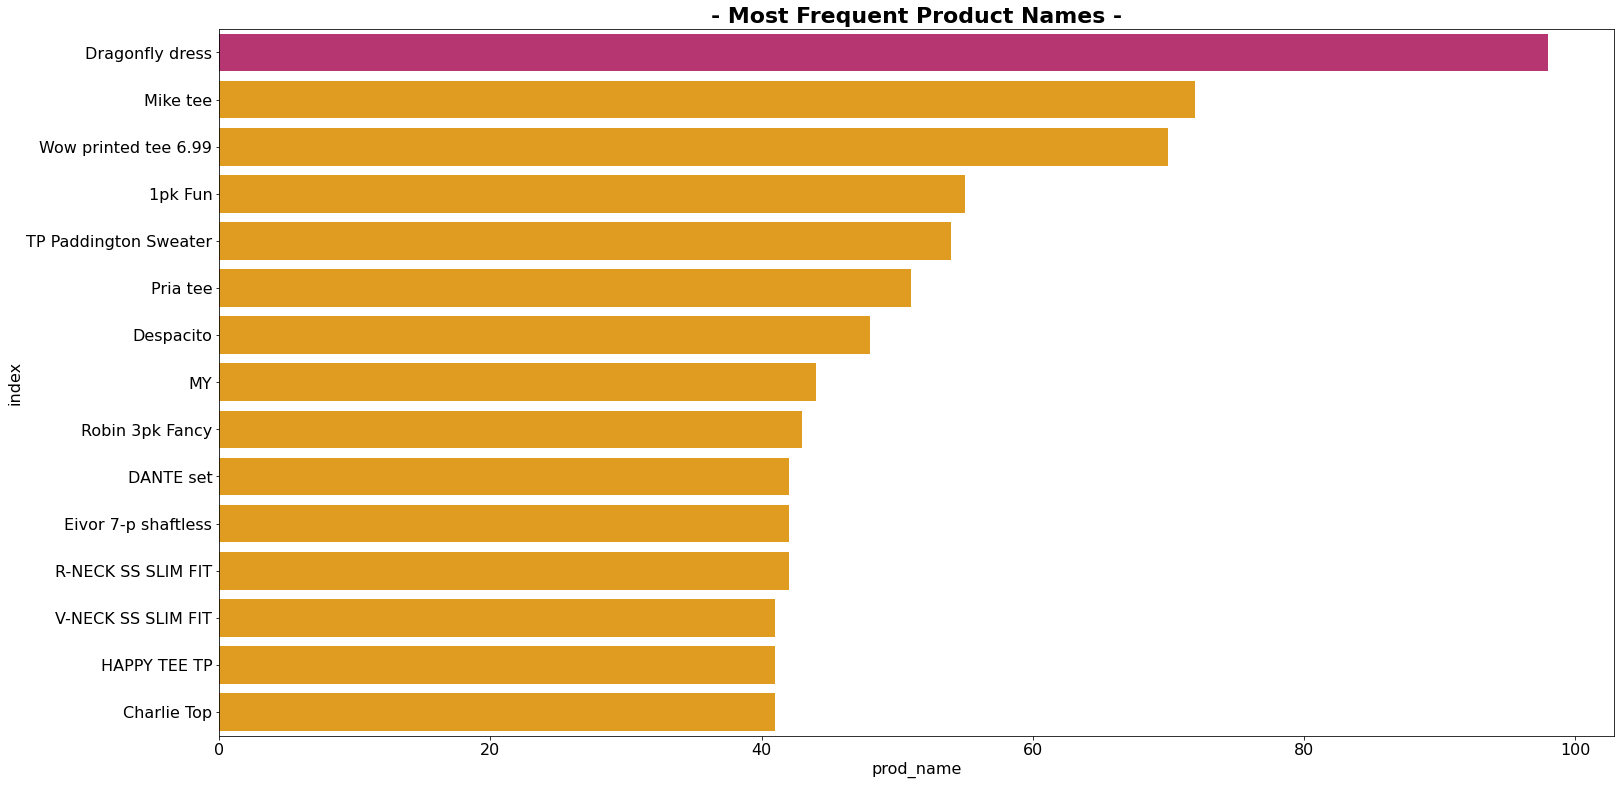

In [17]:
print(clr.S+"Total Number of unique Product Names:"+clr.E, articles["prod_name"].nunique())

# Data
prod_name = articles["prod_name"].value_counts().reset_index().head(15)
total_prod_names = articles["prod_name"].nunique()
clrs = ["#CB2170" if x==max(prod_name["prod_name"]) else '#FFA500' for x in prod_name["prod_name"]]

# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Most Frequent Product Names -', size=22, weight="bold")
sns.barplot(data=prod_name, x="prod_name", y="index", ax=ax,
            palette=clrs)
plt.show()

**<span style="color:#023e8a;">Now, pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.</span>**

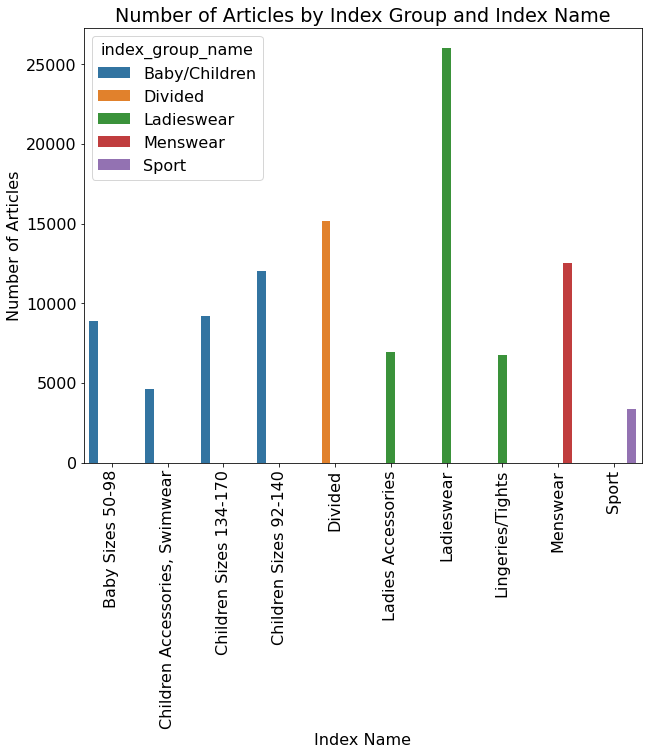

In [18]:
# articles.groupby(['index_group_name', 'index_name']).count()['article_id# create a DataFrame from the groupby object
temp_group = articles.groupby(['index_group_name', 'index_name']).count()['article_id'].reset_index()

# create the barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='index_name', y='article_id', hue='index_group_name', data=temp_group)
plt.title('Number of Articles by Index Group and Index Name')
plt.xlabel('Index Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

**<span style="color:#023e8a;"> And look at the product group-product structure. Accessories are really various, the most numerious: bags, earrings and hats. However, trousers prevail.</span>**

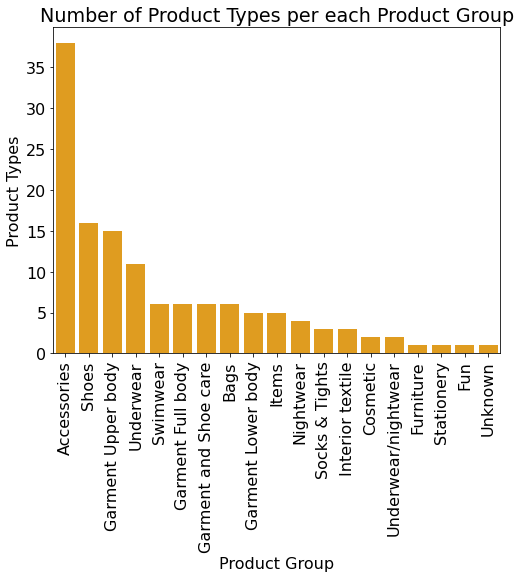

In [19]:
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df, color='orange')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

In [20]:
# create a list of dictionaries, where each dictionary contains the column name and its number of unique values
unique_values = []
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        unique_values.append({'Column Name': col, 'Number of Unique Values': un_n})

# create a pandas DataFrame from the list of dictionaries
df_unique_values = pd.DataFrame(unique_values)
# display the DataFrame
display(df_unique_values)

Column Name  Number of Unique Values
0                      prod_name                    45875
1              product_type_name                      131
2             product_group_name                       19
3      graphical_appearance_name                       30
4              colour_group_name                       50
5    perceived_colour_value_name                        8
6   perceived_colour_master_name                       20
7                department_name                      250
8                     index_name                       10
9               index_group_name                        5
10                  section_name                       56
11            garment_group_name                       21
12                   detail_desc                    43405


**<span style="color:#023e8a;"> And look at the product type structure. Trousers are the most sold product type followed by dress and sweater.</span>**

Total Number of unique Product Types: 131


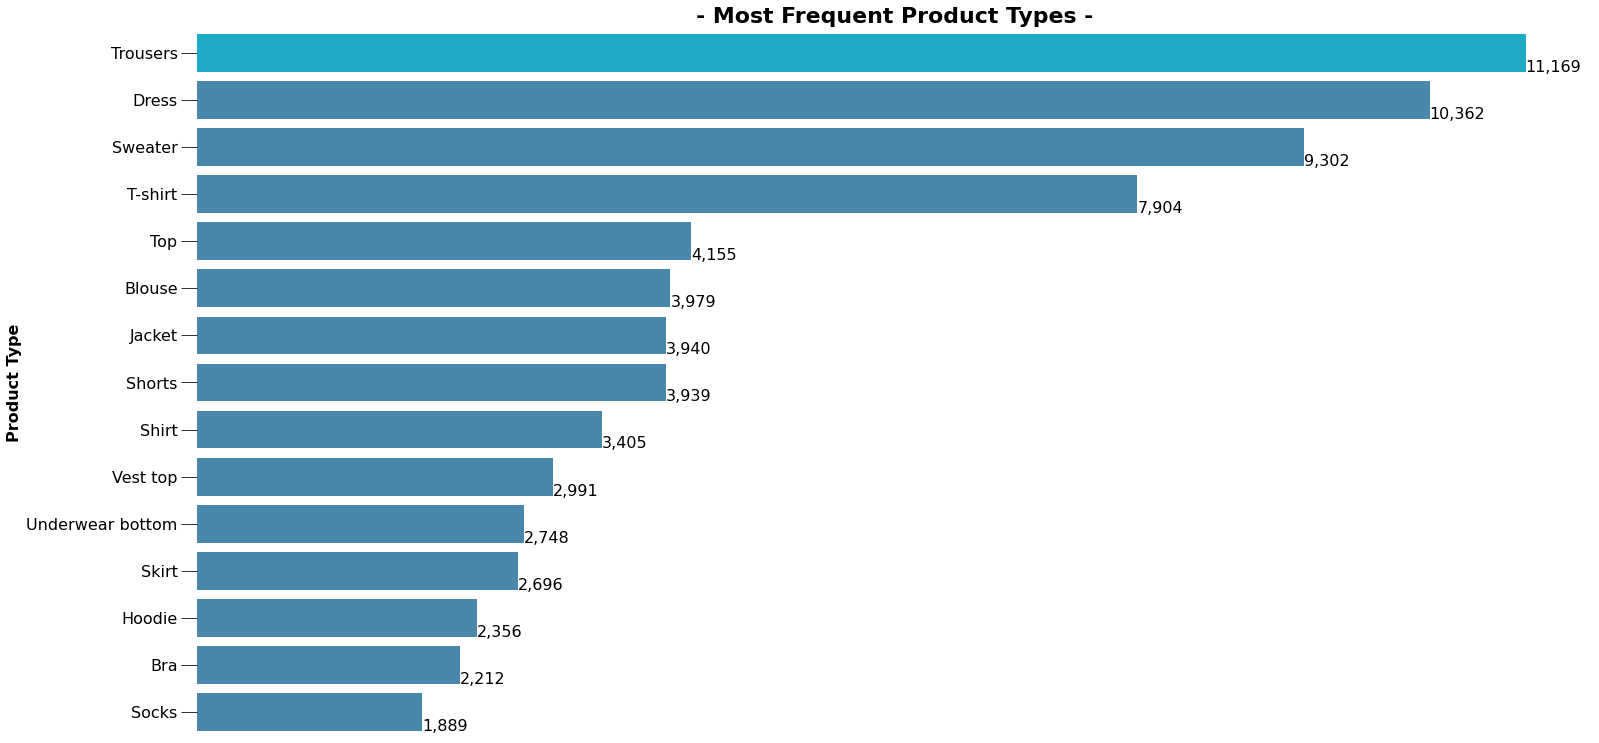

In [21]:
print(clr.S+"Total Number of unique Product Types:"+clr.E, articles["product_type_name"].nunique())

# Data
prod_type = articles["product_type_name"].value_counts().reset_index().head(15)
total_prod_types = articles["product_type_name"].nunique()
clrs = ["#00BDE3" if x==max(prod_type["product_type_name"]) else '#398BBB' for x in prod_type["product_type_name"]]


# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Most Frequent Product Types -', size=22, weight="bold")

sns.barplot(data=prod_type, x="product_type_name", y="index", ax=ax,
            palette=clrs)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()

show_values_on_bars(axs=ax, h_v="h", space=0.4)
plt.ylabel("Product Type", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)

sns.despine(left=True, bottom=True)
plt.show();

print("\n")

**<span style="color:#023e8a;"> We can again see the upper garment are very popular.</span>**

Total Number of unique Product Group: 19


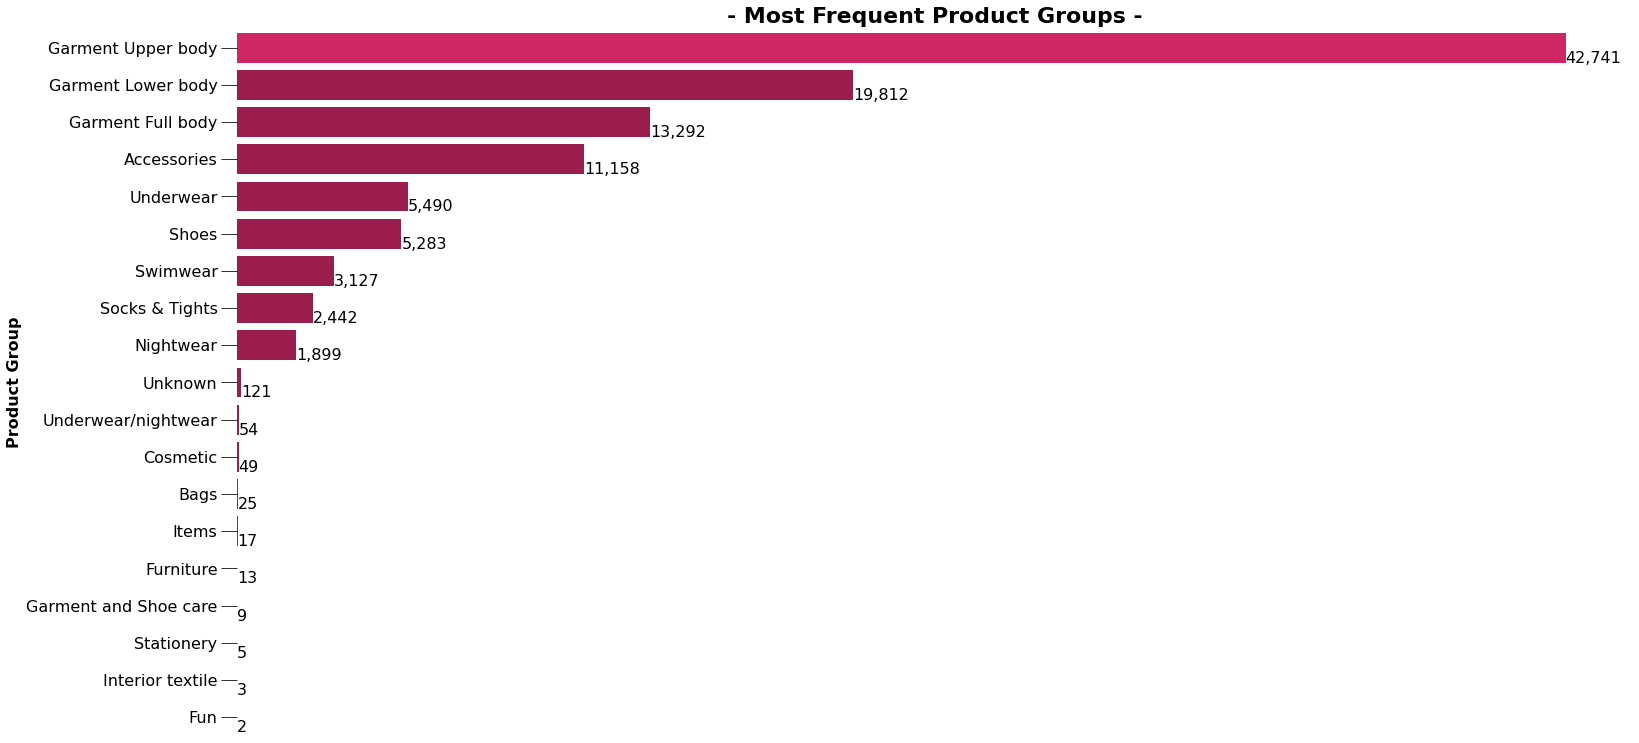

In [22]:
print(clr.S+"Total Number of unique Product Group:"+clr.E, articles["product_group_name"].nunique())

# Data
prod_group = articles["product_group_name"].value_counts().reset_index()
total_prod_groups = articles["product_group_name"].nunique()
clrs = ["#E90B60" if x==max(prod_group["product_group_name"]) else '#AF0848' for x in prod_group["product_group_name"]]

# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Most Frequent Product Groups -', size=22, weight="bold")

sns.barplot(data=prod_group, x="product_group_name", y="index", ax=ax,
            palette=clrs)
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()

show_values_on_bars(axs=ax, h_v="h", space=0.4)
plt.ylabel("Product Group", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)

sns.despine(left=True, bottom=True)
plt.show();

Types = articles.product_group_name.unique()
count = articles.product_group_name.value_counts()
fig = px.pie(articles, values=count, names=Types, title="Product Group by population", color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

In [23]:
def change_color(x):
    '''Change color name.'''
    if ("light" in x.lower().strip()) or \
        ("dark" in x.lower().strip()) or \
        ("greyish" in x.lower().strip()) or \
        ("yellowish" in x.lower().strip()) or \
        ("greenish" in x.lower().strip()) or \
        ("off" in x.lower().strip()) or \
        ("other" in x.lower().strip()):
        x = x.split(" ")[-1]
        
    return x

articles["colour_group_name"] = articles["colour_group_name"].apply(lambda x: change_color(x))

Total Number of unique Product Appearances: 30
Total Number of unique Product Colors (after preprocess): 20


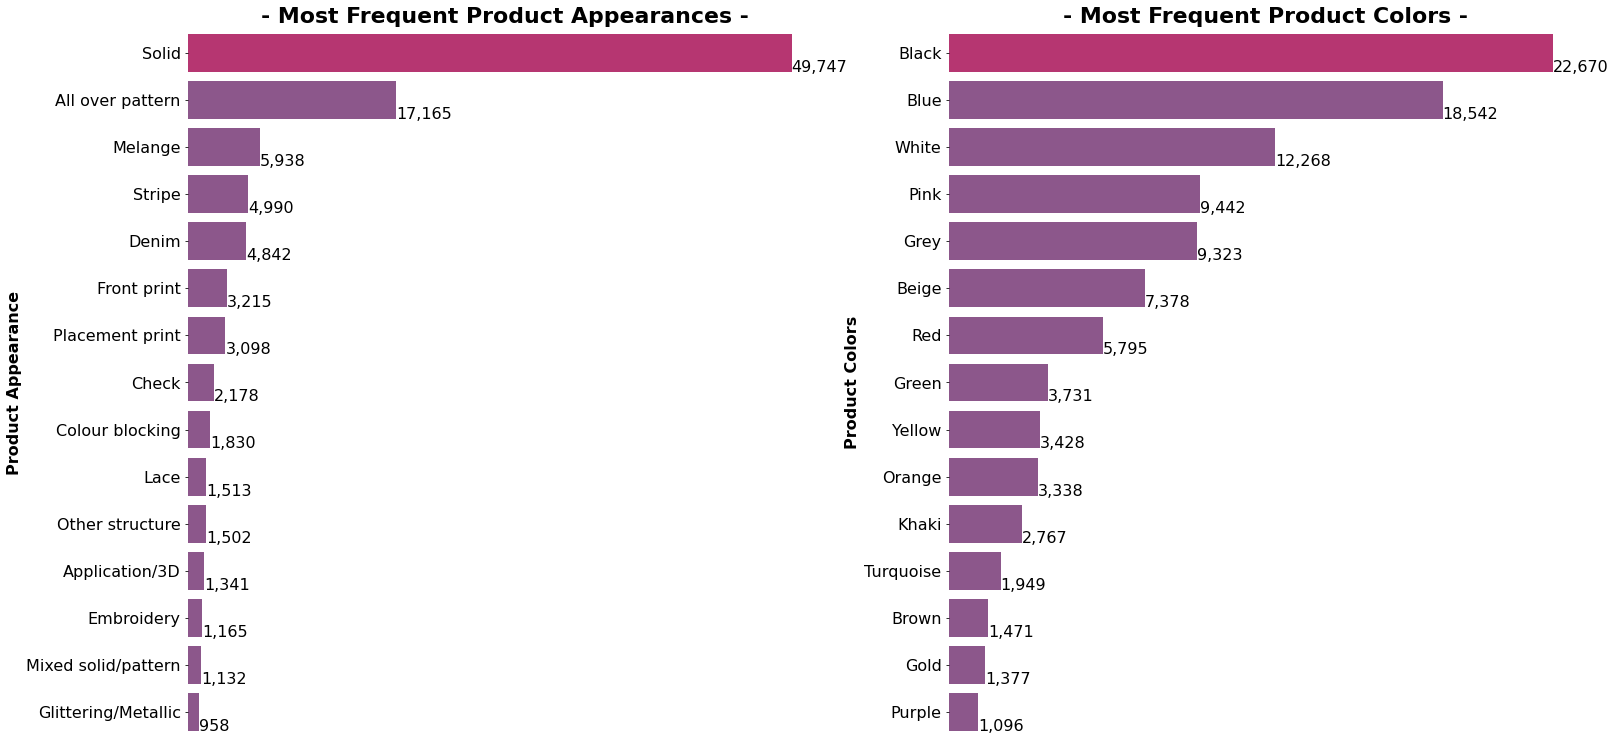

In [24]:
# Appearance and color
print(clr.S+"Total Number of unique Product Appearances:"+clr.E, articles["graphical_appearance_name"].nunique())
print(clr.S+"Total Number of unique Product Colors (after preprocess):"+clr.E, articles["colour_group_name"].nunique())

# --- Data 1 ---
prod_appearance = articles["graphical_appearance_name"].value_counts().reset_index().head(15)
total_prod_appearances = articles["graphical_appearance_name"].nunique()
clrs1 = ["#AF0848" if x==max(prod_appearance["graphical_appearance_name"]) else '#E90B60' for x in prod_appearance["graphical_appearance_name"]]

# --- Data 2 ---
prod_color = articles["colour_group_name"].value_counts().reset_index().head(15)
total_prod_color = articles["colour_group_name"].nunique()
clrs2 = ["#CB2170" if x==max(prod_color["colour_group_name"]) else '#954E93' for x in prod_color["colour_group_name"]]

# Plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 13))

ax1.set_title('- Most Frequent Product Appearances -', size=22, weight="bold")
sns.barplot(data=prod_appearance, x="graphical_appearance_name", y="index", ax=ax1,
            palette=clrs2)
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()

show_values_on_bars(axs=ax1, h_v="h", space=0.4)

ax1.set_ylabel("Product Appearance", size = 16, weight="bold")
ax1.set_xlabel("")
ax1.set_xticks([])

ax2.set_title('- Most Frequent Product Colors -', size=22, weight="bold")
sns.barplot(data=prod_color, x="colour_group_name", y="index", ax=ax2,
            palette=clrs2)
x0,x1 = ax2.get_xlim()
y0,y1 = ax2.get_ylim()

show_values_on_bars(axs=ax2, h_v="h", space=0.4)
ax2.set_ylabel("Product Colors", size = 16, weight="bold")
ax2.set_xlabel("")
ax2.set_xticks([])

sns.despine(left=True, bottom=True)
plt.show();

print("\n")

---

🛍️ **Important Notes**:
* In order for the wordcloud to take the shape of the image you should input a `.jpg` image with **white** background (not black and not transparent - because the function will interpret the transparent background as black).
* More custom fonts like I used below can be found here: https://www.dafont.com/

In [25]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    '''Creates a custom function for the color of the wordcloud.'''
    
    h = 270 # 0 - 360 <- the color hue
    s = 40 # 0-100 <- the color saturation
    l = random_state.randint(30, 70) # 0 - 100 <- gradient
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

Total Number of unique Article Descriptions: 43405 



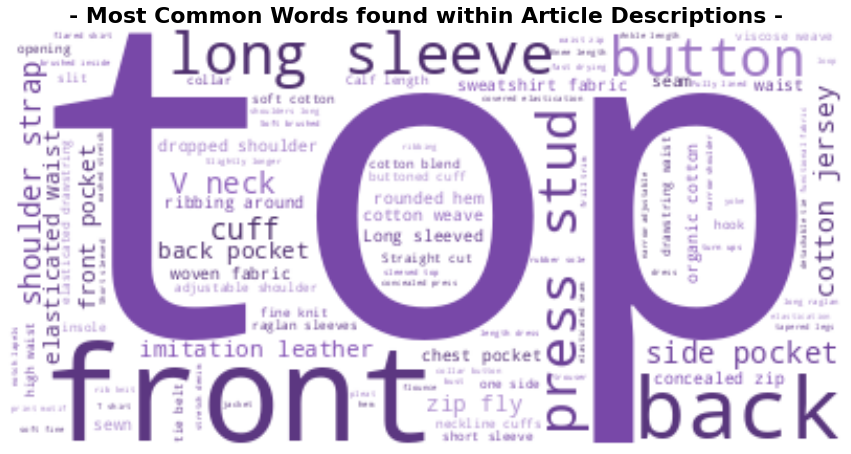

In [26]:
print(clr.S+"Total Number of unique Article Descriptions:"+clr.E, articles["detail_desc"].nunique(), "\n")

# Get descriptions and convert them to a string
text = articles["detail_desc"].unique()
text = " ".join(text)

# Get the mask - the form of the wordcloud
# mask = np.array(Image.open('../input/hm-fashion-recommender-dataset/pics/mask.jpg'))

# Create wordcloud object
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42,
               color_func=similar_color_func)
wc.generate(text)

# Plot
fig = plt.figure(figsize=(15, 15))
plt.title("- Most Common Words found within Article Descriptions -",
           size=22, weight="bold")
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## **<span id="Customers" style="color:#023e8a;">3. Customers</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span style="color:#023e8a;"> Customers data description: </span>**

> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `FN` **<span style="color:#023e8a;">: 1 or missed </span>**  
> `Active` **<span style="color:#023e8a;">: 1 or missed</span>**  
> `club_member_status` **<span style="color:#023e8a;">: Status in club</span>**  
> `fashion_news_frequency` **<span style="color:#023e8a;">: How often H&M may send news to customer</span>**  
> `age` **<span style="color:#023e8a;">: The current age</span>**  
> `postal_code` **<span style="color:#023e8a;">: Postal code of customer</span>**  

🛍️ **Important Notes**:
* In this dataset we have quite a few missing values:
    * for columns `FN` and `Active` I replaced all missing values with 0
    * for `club_member_status` and `fashion_news_frequency` I have set all missing values with `UNKNOWN`
    * for `age` I have imputed all missing values with the median age (which is 36)
* I have created an `age_interval` as well that splits all ages in decades

In [27]:
def create_age_interval(x):
    if x <= 25:
        return [16, 25]
    elif x <= 35:
        return [26, 35]
    elif x <= 45:
        return [36, 45]
    elif x <= 55:
        return [46, 55]
    elif x <= 65:
        return [56, 65]
    else:
        return [66, 99]

In [28]:
print(clr.S+"Missing values within customers dataset:"+clr.E)
print(customers.isna().sum())

Missing values within customers dataset:
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64


In [29]:
# Fill FN and Active - the only available value is "1"
customers["FN"].fillna(0, inplace=True)
customers["Active"].fillna(0, inplace=True)

# Set unknown the club member status & news frequency
customers["club_member_status"].fillna("UNKNOWN", inplace=True)

customers["fashion_news_frequency"] = customers["fashion_news_frequency"].replace({"None":"NONE"})
customers["fashion_news_frequency"].fillna("UNKNOWN", inplace=True)

# Set missing values in age with the median
customers["age"].fillna(customers["age"].median(), inplace=True)
# customers["age_interval"] = customers["age"].apply(lambda x: create_age_interval(x))

In [30]:
pd.options.display.max_rows = 50
customers.head()

customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     0.0   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     0.0   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.0     0.0   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.0     0.0   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

**<span style="color:#023e8a;"> There are no duplicates in </span>** `customers`

In [31]:
customers.shape[0] - customers['customer_id'].nunique()

0

**<span style="color:#023e8a;"> Here we have abnormal number of customers by one postal code. One has 120303, it might be encoded nan adress or smth like a huge distribution center, or pickup.</span>**

In [32]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

postal_code  customer_id  \
61034   2c29ae653a9282cce4151bd87643c907644e09541abc28...       120303   
281937  cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...          261   
156090  714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...          159   
171208  7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...          157   
126228  5b7eb31eabebd3277de632b82267286d847fd5d44287ee...          156   

            FN  Active  club_member_status  fashion_news_frequency     age  
61034   120303  120303              120303                  120303  120303  
281937     261     261                 261                     261     261  
156090     159     159                 159                     159     159  
171208     157     157                 157                     157     157  
126228     156     156                 156                     156     156

**<span style="color:#023e8a;"> Ages, club_member_status are different, like customer_ids.</span>**

In [33]:
customers[customers['postal_code']=='2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head()

customer_id   FN  Active  \
5   000064249685c11552da43ef22a5030f35a147f723d5b0...  0.0     0.0   
8   00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...  0.0     0.0   
9   00008469a21b50b3d147c97135e25b4201a8c58997f787...  0.0     0.0   
11  000097d91384a0c14893c09ed047a963c4fc6a5c021044...  0.0     0.0   
14  0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...  1.0     1.0   

   club_member_status fashion_news_frequency   age  \
5             UNKNOWN                UNKNOWN  32.0   
8              ACTIVE                   NONE  20.0   
9              ACTIVE                   NONE  20.0   
11             ACTIVE                   NONE  31.0   
14             ACTIVE              Regularly  29.0   

                                          postal_code  
5   2c29ae653a9282cce4151bd87643c907644e09541abc28...  
8   2c29ae653a9282cce4151bd87643c907644e09541abc28...  
9   2c29ae653a9282cce4151bd87643c907644e09541abc28...  
11  2c29ae653a9282cce4151bd87643c907644e09541abc28...  
14  2c29ae653a9282cce4151bd87643c907644e09541abc28...

**<span style="color:#023e8a;"> The most common age is about 21-23</span>**

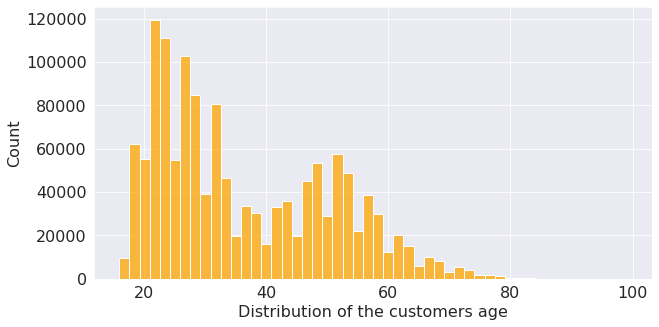

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

**<span style="color:#023e8a;"> Status in H&M club. Almost every customer has an active club status, some of them begin to activate it (pre-create). A tiny part of customers abandoned the club.</span>**

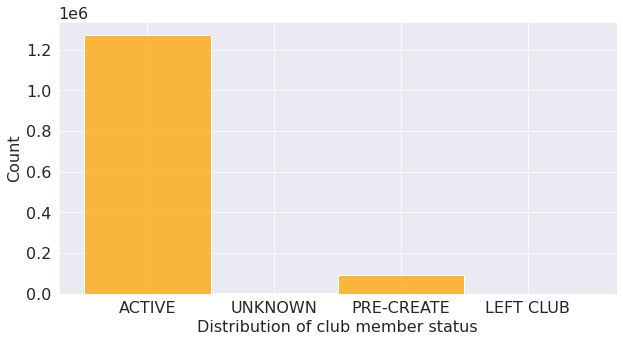

In [35]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

**<span style="color:#023e8a;"> Here we have three types for NO DATA. Let's unite these values.</span>**

In [36]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', 'UNKNOWN', 'Monthly'], dtype=object)

In [37]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [38]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

**<span style="color:#023e8a;"> Customers prefer not to get any messages about the current news.</span>**

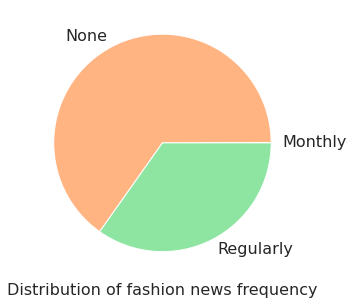

In [39]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
# ax = sns.histplot(data=customers, x='fashion_news_frequency', color='orange')
# ax = sns.pie(data=customers, x='fashion_news_frequency', color='orange')
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

## **<span id="Transactions" style="color:#023e8a;">4. Transactions</span>**

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)

**<span style="color:#023e8a;"> Transactions data description: </span>**

> `t_dat` **<span style="color:#023e8a;">: A unique identifier of every customer</span>**  
> `customer_id` **<span style="color:#023e8a;">: A unique identifier of every customer </span>**  **<span style="color:#FF0000;">(in </span>** `customers` **<span style="color:#FF0000;"> table)</span>**  
> `article_id` **<span style="color:#023e8a;">: A unique identifier of every article</span>**  **<span style="color:#FF0000;">(in </span>** `articles` **<span style="color:#FF0000;"> table)</span>**  
> `price` **<span style="color:#023e8a;">: Price of purchase</span>**  
> `sales_channel_id` **<span style="color:#023e8a;">: 1 or 2</span>**  

🛍️ **Important Notes**:
* Denims, Trousers and Undergarments are sold the most.
* The **prices are altered**, with the highest one being 0.59 and the lowest being 0.0000169.
* The most expensive items are leather garments.
* The average order has around 23 units and costs ~0.649.
* The units/order is directly correlated with the price/order: as the units increase, the price within the order increases too.

In [40]:
print(clr.S+"Missing values within transactions dataset:"+clr.E)
print(transactions.isna().sum())

Missing values within transactions dataset:
customer_id         0
article_id          0
price               0
sales_channel_id    0
year                0
month               0
day                 0
dtype: int64


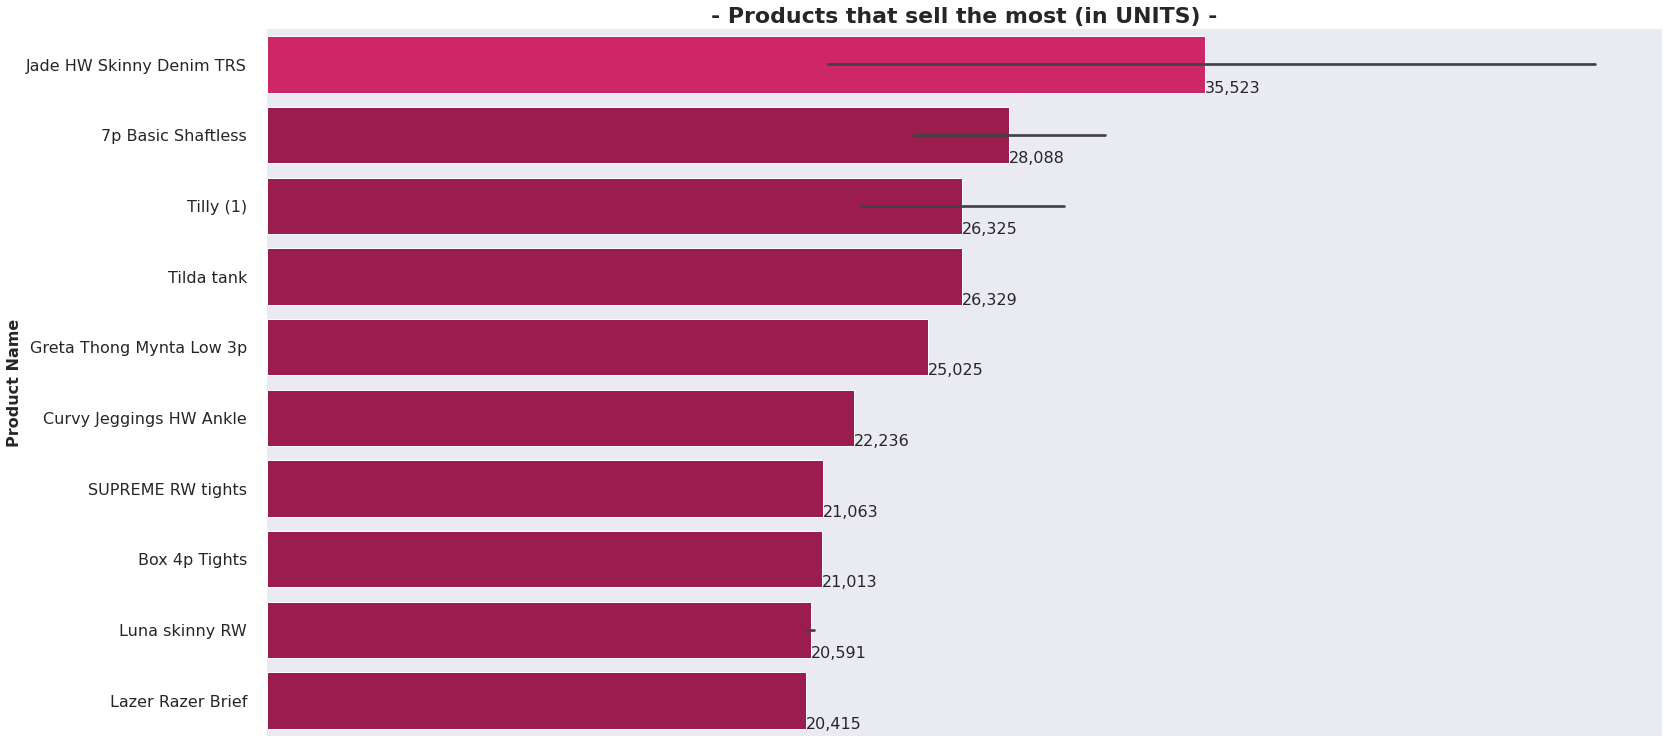

In [41]:
# Get data
top_sold_products = transactions["article_id"].value_counts().reset_index().head(15)
top_sold_products.columns = ["article_id", "count"]
top_sold_products = pd.merge(top_sold_products, articles, on="article_id")[["article_id", "count", "prod_name"]]

clrs = ["#E90B60" if x==max(top_sold_products["count"]) else '#AF0848' for x in top_sold_products["count"]]
# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Products that sell the most (in UNITS) -', size=22, weight="bold")

sns.barplot(data=top_sold_products, x="count", y="prod_name", ax=ax,
            palette=clrs)

show_values_on_bars(axs=ax, h_v="h", space=0.4)
plt.ylabel("Product Name", size = 16, weight="bold")
plt.xlabel("")
plt.xticks([])
plt.yticks(size=16)
plt.tick_params(size=16)

sns.despine(left=True, bottom=True)
plt.show();

In [42]:
print(clr.S+"Maximum Price is:"+clr.E, transactions["price"].max(), "\n" +
      clr.S+"Minimum Price is:"+clr.E, transactions["price"].min(), "\n" +
      clr.S+"Average Price is:"+clr.E, transactions["price"].mean())

# Get data
top_sold_products = transactions.groupby("article_id")["price"].max().reset_index()\
                                        .sort_values("price", ascending=False).head(15)
top_sold_products.columns = ["article_id", "price"]
top_sold_products = pd.merge(top_sold_products, articles, on="article_id")[["article_id", "price", "prod_name"]]
print(clr.S + "Most Expensive products:" + clr.E)
display(top_sold_products)

Maximum Price is: 0.5915254354476929 
Minimum Price is: 1.694915226835292e-05 
Average Price is: 0.027829282


KeyboardInterrupt: 

In [ ]:
# Data
basket = transactions.groupby("customer_id").agg({'article_id':'count', 
                                                  'price': 'sum'}).reset_index()
basket.columns = ["customer_id", "units", "order_price"]

print(clr.S+"=== UNITS/ORDER ==="+clr.E)
print(clr.S+"Maximum Units/Order is:"+clr.E, basket["units"].max(), "\n" +
      clr.S+"Minimum Units/Order is:"+clr.E, basket["units"].min(), "\n" +
      clr.S+"Average Units/Order is:"+clr.E, basket["units"].mean(), "\n")

print(clr.S+"=== SPENDING/ORDER ==="+clr.E)
print(clr.S+"Maximum Spending/Order is:"+clr.E, basket["order_price"].max(), "\n" +
      clr.S+"Minimum Spending/Order is:"+clr.E, basket["order_price"].min(), "\n" +
      clr.S+"Average Spending/Order is:"+clr.E, basket["order_price"].mean())

# Plot
plt.figure(figsize=(24, 15))
plt.suptitle('- Order Attributes -', size=22, weight="bold")

ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,1,2)

sns.distplot(basket["units"], color=my_colors[-3], ax=ax1,
             hist_kws=dict(edgecolor=my_colors[-3]))
ax1.set_title("Units/Order Distribution", size=18, weight="bold")
ax1.set_ylabel("")

sns.distplot(basket["order_price"], color=my_colors[-5], ax=ax2,
             hist_kws=dict(edgecolor=my_colors[-5]))
ax2.set_title("Spending/Order Distribution", size=18, weight="bold")
ax2.set_ylabel("")

sns.scatterplot(data=basket, x="units", y="order_price", hue="units", palette="mako", 
                legend=None, ax=ax3)
ax3.set_title("Units x Price Correlation", size=18, weight="bold")
ax3.set_ylabel("Spending per Order")
ax3.set_xlabel("Units per Order")

sns.despine(left=True, bottom=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None);

<img src="https://i.imgur.com/nMuocgz.png">

## **<span id="Recommendation" style="color:#023e8a;">5. Recommender System</span>**


[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Go to Table of Content</span>**](#Content)


**What is a Recommender System**?

A recommender system is not more or less than an algorithm that tries to predict the preference on an object or concept based on somebody's preferences for other objects or concepts.

This can apply to **anything**: movies, songs, books, amazon orders, clothing or just Google Engine searches.

<center><img src="https://i.imgur.com/m8T6MhL.png" width=500></center>

<!-- > 🛍 **Turicreate**: we will be using `turicreate` model in order to create recommendations for users based on their previous purchases. For more details about the library you can [read the documentation](https://github.com/apple/turicreate). My main inspiration was this amazing article [How to Build a Recommendation System for Purchase Data (Step-by-Step)](https://medium.datadriveninvestor.com/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6). -->

<font size="3">  I will create 5 DFs; <br>
    <br>
                 1. DF with customers and the products they bought.<br>
                 2. DF with features of products and customers who have bought it<br>
                 3. DF with the features of the products they have bought next to the customers who have bought a product<br>
                 4. The DF we will use to fill in the missing values during the creation of our model values <br>
                 5. The DF I will use in the modeling phase <br>
</font>     

We will use only 10000 transactions to train it. Also We will use all the data from the articles and customers data 

In [43]:
transactions = transactions.head(10000)
transactions

customer_id  article_id     price  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0663713001  0.050831   
1     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0541518023  0.030492   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...  0505221004  0.015237   
3     00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687003  0.016932   
4     00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687004  0.016932   
...                                                 ...         ...       ...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...  0671057002  0.003373   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0305304008  0.011847   
9997  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0561617003  0.023712   
9998  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0671777002  0.006763   
9999  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0587782001  0.027102   

      sales_channel_id  year  month  day  
0                    2    18      9   20  
1                    2    18      9   20  
2                    2    18      9   20  
3                    2    18      9   20  
4                    2    18      9   20  
...                ...   ...    ...  ...  
9995                 2    18      9   20  
9996                 2    18      9   20  
9997                 2    18      9   20  
9998                 2    18      9   20  
9999                 2    18      9   20  

[10000 rows x 7 columns]

<a id='transactionsCustomerArticlesDF' style="color:black" /></a>
### 1. DF with customers and the products they bought

In [44]:
transactions['customer_id'].unique().size

2954

<font size="3">I am creating a table where every customer who buys is once. I will combine it with the products of my customer that I grouped into this table.</font>

In [45]:
df_groupedCustomerTransactions = transactions.groupby(["customer_id"],as_index=False)
df_TRS_TR_OneCus = transactions.drop_duplicates(subset=['customer_id'])

In [46]:
try:
    df_TRS_TR_OneCus.insert(len(df_TRS_TR_OneCus.columns), 'articles', [None] * len(df_TRS_TR_OneCus))
except:
    print("Already created")

In [47]:
def get_article_indexes(val):
    groupArticles = df_groupedCustomerTransactions.get_group(val)['article_id'].reset_index()
    groupArticles = groupArticles.drop(['index'],axis=1)
    groupArticles = groupArticles.to_numpy()
    groupArticles = np.reshape(groupArticles, groupArticles.size)
    
    df_TRS_TR_OneCus.loc[df_TRS_TR_OneCus['customer_id'] == val,'articles'] = ','.join(map(str, groupArticles))

In [48]:
df_TRS_TR_OneCus = df_TRS_TR_OneCus.drop(['sales_channel_id','price','day','month','year'],axis=1,errors = 'ignore')

In [49]:
df_TRS_TR_OneCus['customer_id'].apply(get_article_indexes)

0       None
2       None
7       None
12      None
14      None
        ... 
9983    None
9985    None
9988    None
9995    None
9996    None
Name: customer_id, Length: 2954, dtype: object

In [50]:
df_TRS_TR_OneCus = df_TRS_TR_OneCus.drop(['article_id'],axis=1,errors = 'ignore')

In [51]:
df_TRS_TR_OneCus

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...   
7     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
12    0008968c0d451dbc5a9968da03196fe20051965edde741...   
14    000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
9983  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
9985  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
9988  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                               articles  
0                                 0663713001,0541518023  
2     0505221004,0685687003,0685687004,0685687001,05...  
7     0688873012,0501323011,0598859003,0688873020,06...  
12                                0531310002,0529841001  
14    0501820043,0501820043,0674681001,0671505001,06...  
...                                                 ...  
9983                              0673677002,0636455008  
9985                   0622238007,0622238009,0622238018  
9988  0657165001,0189616008,0524939008,0610274009,06...  
9995                                         0671057002  
9996        0305304008,0561617003,0671777002,0587782001  

[2954 rows x 2 columns]

### 2. DF with features of products and customers who have bought it

In [52]:
customers = customers.drop(['postal_code'],axis=1,errors='ignore')

In [53]:
for col in customers:
    if(col == 'customer_id'):
        continue
    if(col == 'age_interval'):
        continue
    print(customers[col].unique())

[0. 1.]
[0. 1.]
['ACTIVE' 'UNKNOWN' 'PRE-CREATE' 'LEFT CLUB']
['None' 'Regularly' 'Monthly']
[49. 25. 24. 54. 52. 32. 20. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22. 40.
 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34. 57.
 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46. 73.
 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97. 89.
 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]


In [55]:
customers = pd.get_dummies(customers, columns = ["club_member_status"], prefix = ["CMS"])
customers = pd.get_dummies(customers, columns = ["fashion_news_frequency"], prefix = ["FNF"])

KeyError: "None of [Index(['club_member_status'], dtype='object')] are in the [columns]"

In [56]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'age', 'CMS_ACTIVE', 'CMS_LEFT CLUB',
       'CMS_PRE-CREATE', 'CMS_UNKNOWN', 'FNF_Monthly', 'FNF_None',
       'FNF_Regularly'],
      dtype='object')

In [57]:
df_merged_transactionsCustomer = pd.merge(transactions, customers, on='customer_id', how='left')

In [58]:
df_groupedBuyingArticles = df_merged_transactionsCustomer.groupby(["article_id"],as_index=False)

In [59]:
df_groupedBuyingArticles[["price"]].aggregate("mean")

article_id     price
0     0108775015  0.008393
1     0108775051  0.005068
2     0110065001  0.022864
3     0110065002  0.025407
4     0111586001  0.012860
...          ...       ...
4898  0725253001  0.044475
4899  0727754001  0.020322
4900  0728162001  0.008458
4901  0728162002  0.008458
4902  0729931001  0.025407

[4903 rows x 2 columns]

The average of the characteristics of the customers who purchased the product. I'm buying. For example, if there is 0.3 cms_active, it means that 3 out of 10 users are active.

In [60]:
# pd.set_option('display.max_rows', 50)
df_groupedBuyingArticles[["CMS_ACTIVE","CMS_UNKNOWN","CMS_LEFT CLUB","CMS_PRE-CREATE",
                    "FNF_None","FNF_Monthly","FNF_Regularly"]].mean()

article_id  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  \
0     0108775015         1.0          0.0            0.0             0.0   
1     0108775051         1.0          0.0            0.0             0.0   
2     0110065001         1.0          0.0            0.0             0.0   
3     0110065002         1.0          0.0            0.0             0.0   
4     0111586001         1.0          0.0            0.0             0.0   
...          ...         ...          ...            ...             ...   
4898  0725253001         1.0          0.0            0.0             0.0   
4899  0727754001         1.0          0.0            0.0             0.0   
4900  0728162001         1.0          0.0            0.0             0.0   
4901  0728162002         1.0          0.0            0.0             0.0   
4902  0729931001         1.0          0.0            0.0             0.0   

      FNF_None  FNF_Monthly  FNF_Regularly  
0     0.333333          0.0       0.666667  
1     1.000000          0.0       0.000000  
2     0.000000          0.0       1.000000  
3     0.000000          0.0       1.000000  
4     1.000000          0.0       0.000000  
...        ...          ...            ...  
4898  0.000000          0.0       1.000000  
4899  1.000000          0.0       0.000000  
4900  1.000000          0.0       0.000000  
4901  1.000000          0.0       0.000000  
4902  0.500000          0.0       0.500000  

[4903 rows x 8 columns]

In [61]:
df_groupedBuyingArticles[["age"]].aggregate("mean")

article_id    age
0     0108775015  32.00
1     0108775051  29.00
2     0110065001  20.00
3     0110065002  51.00
4     0111586001  40.25
...          ...    ...
4898  0725253001  28.50
4899  0727754001  26.00
4900  0728162001  27.00
4901  0728162002  27.00
4902  0729931001  46.00

[4903 rows x 2 columns]

In [62]:
df_groupedBuyingArticles[["FN"]].aggregate("mean")

article_id        FN
0     0108775015  0.666667
1     0108775051  0.000000
2     0110065001  1.000000
3     0110065002  1.000000
4     0111586001  0.000000
...          ...       ...
4898  0725253001  1.000000
4899  0727754001  0.000000
4900  0728162001  0.000000
4901  0728162002  0.000000
4902  0729931001  0.500000

[4903 rows x 2 columns]

In [63]:
df_groupedBuyingArticlesValues = df_groupedBuyingArticles[["price"]].aggregate("mean")
cacheArr = df_groupedBuyingArticles[["customer_id"]].count().sort_values('customer_id', ascending=False)
cacheArr2 = df_groupedBuyingArticles[["FN"]].aggregate("mean")
cacheArr3 = df_groupedBuyingArticles[["Active"]].aggregate("mean")
cacheArr4 = df_groupedBuyingArticles[["age"]].aggregate("mean")
cacheArr5 = df_groupedBuyingArticles[["CMS_ACTIVE","CMS_UNKNOWN","CMS_LEFT CLUB","CMS_PRE-CREATE",
                    "FNF_None","FNF_Monthly","FNF_Regularly",]].mean()
df_groupedBuyingArticlesValues = pd.merge(df_groupedBuyingArticlesValues,cacheArr, how='outer')
df_groupedBuyingArticlesValues = pd.merge(df_groupedBuyingArticlesValues,cacheArr2, how='outer')
df_groupedBuyingArticlesValues = pd.merge(df_groupedBuyingArticlesValues,cacheArr3, how='outer')
df_groupedBuyingArticlesValues = pd.merge(df_groupedBuyingArticlesValues,cacheArr4, how='outer')
df_groupedBuyingArticlesValues = pd.merge(df_groupedBuyingArticlesValues,cacheArr5, how='outer').sort_values('customer_id', ascending=False)

del cacheArr, cacheArr2, cacheArr3, cacheArr4, cacheArr5
df_groupedBuyingArticlesValues

article_id     price  customer_id        FN    Active        age  \
4641  0685687004  0.016795           98  0.428571  0.428571  40.989796   
4638  0685687001  0.016822           56  0.410714  0.410714  38.321429   
4640  0685687003  0.016912           51  0.450980  0.450980  39.862745   
4336  0673677002  0.016785           29  0.448276  0.448276  39.965517   
4639  0685687002  0.016751           27  0.407407  0.407407  37.111111   
...          ...       ...          ...       ...       ...        ...   
2800  0626815001  0.033881            1  1.000000  1.000000  53.000000   
2801  0626815002  0.033881            1  0.000000  0.000000  35.000000   
2804  0626816004  0.022864            1  1.000000  1.000000  22.000000   
2805  0627009010  0.025407            1  1.000000  0.000000  72.000000   
2451  0618398011  0.016932            1  0.000000  0.000000  46.000000   

      CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  FNF_None  \
4641    1.000000     0.000000            0.0             0.0  0.571429   
4638    0.964286     0.035714            0.0             0.0  0.589286   
4640    0.980392     0.019608            0.0             0.0  0.549020   
4336    1.000000     0.000000            0.0             0.0  0.551724   
4639    1.000000     0.000000            0.0             0.0  0.592593   
...          ...          ...            ...             ...       ...   
2800    1.000000     0.000000            0.0             0.0  0.000000   
2801    1.000000     0.000000            0.0             0.0  1.000000   
2804    1.000000     0.000000            0.0             0.0  0.000000   
2805    1.000000     0.000000            0.0             0.0  0.000000   
2451    1.000000     0.000000            0.0             0.0  1.000000   

      FNF_Monthly  FNF_Regularly  
4641          0.0       0.428571  
4638          0.0       0.410714  
4640          0.0       0.450980  
4336          0.0       0.448276  
4639          0.0       0.407407  
...           ...            ...  
2800          0.0       1.000000  
2801          0.0       0.000000  
2804          0.0       1.000000  
2805          0.0       1.000000  
2451          0.0       0.000000  

[4903 rows x 13 columns]

In [64]:
display(df_TRS_TR_OneCus)
display(df_groupedBuyingArticlesValues)

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...   
7     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
12    0008968c0d451dbc5a9968da03196fe20051965edde741...   
14    000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
9983  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
9985  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
9988  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                               articles  
0                                 0663713001,0541518023  
2     0505221004,0685687003,0685687004,0685687001,05...  
7     0688873012,0501323011,0598859003,0688873020,06...  
12                                0531310002,0529841001  
14    0501820043,0501820043,0674681001,0671505001,06...  
...                                                 ...  
9983                              0673677002,0636455008  
9985                   0622238007,0622238009,0622238018  
9988  0657165001,0189616008,0524939008,0610274009,06...  
9995                                         0671057002  
9996        0305304008,0561617003,0671777002,0587782001  

[2954 rows x 2 columns]

article_id     price  customer_id        FN    Active        age  \
4641  0685687004  0.016795           98  0.428571  0.428571  40.989796   
4638  0685687001  0.016822           56  0.410714  0.410714  38.321429   
4640  0685687003  0.016912           51  0.450980  0.450980  39.862745   
4336  0673677002  0.016785           29  0.448276  0.448276  39.965517   
4639  0685687002  0.016751           27  0.407407  0.407407  37.111111   
...          ...       ...          ...       ...       ...        ...   
2800  0626815001  0.033881            1  1.000000  1.000000  53.000000   
2801  0626815002  0.033881            1  0.000000  0.000000  35.000000   
2804  0626816004  0.022864            1  1.000000  1.000000  22.000000   
2805  0627009010  0.025407            1  1.000000  0.000000  72.000000   
2451  0618398011  0.016932            1  0.000000  0.000000  46.000000   

      CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  FNF_None  \
4641    1.000000     0.000000            0.0             0.0  0.571429   
4638    0.964286     0.035714            0.0             0.0  0.589286   
4640    0.980392     0.019608            0.0             0.0  0.549020   
4336    1.000000     0.000000            0.0             0.0  0.551724   
4639    1.000000     0.000000            0.0             0.0  0.592593   
...          ...          ...            ...             ...       ...   
2800    1.000000     0.000000            0.0             0.0  0.000000   
2801    1.000000     0.000000            0.0             0.0  1.000000   
2804    1.000000     0.000000            0.0             0.0  0.000000   
2805    1.000000     0.000000            0.0             0.0  0.000000   
2451    1.000000     0.000000            0.0             0.0  1.000000   

      FNF_Monthly  FNF_Regularly  
4641          0.0       0.428571  
4638          0.0       0.410714  
4640          0.0       0.450980  
4336          0.0       0.448276  
4639          0.0       0.407407  
...           ...            ...  
2800          0.0       1.000000  
2801          0.0       0.000000  
2804          0.0       1.000000  
2805          0.0       1.000000  
2451          0.0       0.000000  

[4903 rows x 13 columns]

### 3. DF with the features of the products they have bought next to the customers who have bought a product

In [65]:
articles = articles.drop(['detail_desc'],axis=1, errors = 'ignore')
articles

article_id product_code               prod_name  product_type_no  \
0       0108775015          010               Strap top              253   
1       0108775044          010               Strap top              253   
2       0108775051          010           Strap top (1)              253   
3       0110065001          011       OP T-shirt (Idro)              306   
4       0110065002          011       OP T-shirt (Idro)              306   
...            ...          ...                     ...              ...   
105537  0953450001          095  5pk regular Placement1              302   
105538  0953763001          095       SPORT Malaga tank              253   
105539  0956217002          095         Cartwheel dress              265   
105540  0957375001          095        CLAIRE HAIR CLAW               72   
105541  0959461001          095            Lounge dress              265   

       product_type_name  product_group_name  graphical_appearance_no  \
0               Vest top  Garment Upper body                  1010016   
1               Vest top  Garment Upper body                  1010016   
2               Vest top  Garment Upper body                  1010017   
3                    Bra           Underwear                  1010016   
4                    Bra           Underwear                  1010016   
...                  ...                 ...                      ...   
105537             Socks      Socks & Tights                  1010014   
105538          Vest top  Garment Upper body                  1010016   
105539             Dress   Garment Full body                  1010016   
105540         Hair clip         Accessories                  1010016   
105541             Dress   Garment Full body                  1010016   

       graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                          Solid                  9             Black  ...   
1                          Solid                 10             White  ...   
2                         Stripe                 11             White  ...   
3                          Solid                  9             Black  ...   
4                          Solid                 10             White  ...   
...                          ...                ...               ...  ...   
105537           Placement print                  9             Black  ...   
105538                     Solid                  9             Black  ...   
105539                     Solid                  9             Black  ...   
105540                     Solid                  9             Black  ...   
105541                     Solid                 11             White  ...   

        department_no    department_name  index_code        index_name  \
0                1676       Jersey Basic           A        Ladieswear   
1                1676       Jersey Basic           A        Ladieswear   
2                1676       Jersey Basic           A        Ladieswear   
3                1339     Clean Lingerie           B  Lingeries/Tights   
4                1339     Clean Lingerie           B  Lingeries/Tights   
...               ...                ...         ...               ...   
105537           7188          Socks Bin           F          Menswear   
105538           1919             Jersey           A        Ladieswear   
105539           1641             Jersey           A        Ladieswear   
105540           3946  Small Accessories           D           Divided   
105541           1641             Jersey           A        Ladieswear   

        index_group_no index_group_name section_no            section_name  \
0                    1       Ladieswear         16  Womens Everyday Basics   
1                    1       Ladieswear         16  Womens Everyday Basics   
2                    1       Ladieswear         16  Womens Everyday Basics   
3                    1       Ladieswear         61         Womens Lingerie   
4 

In [66]:
df_articles_all = articles.copy()

In [67]:
df_articles_all

article_id product_code               prod_name  product_type_no  \
0       0108775015          010               Strap top              253   
1       0108775044          010               Strap top              253   
2       0108775051          010           Strap top (1)              253   
3       0110065001          011       OP T-shirt (Idro)              306   
4       0110065002          011       OP T-shirt (Idro)              306   
...            ...          ...                     ...              ...   
105537  0953450001          095  5pk regular Placement1              302   
105538  0953763001          095       SPORT Malaga tank              253   
105539  0956217002          095         Cartwheel dress              265   
105540  0957375001          095        CLAIRE HAIR CLAW               72   
105541  0959461001          095            Lounge dress              265   

       product_type_name  product_group_name  graphical_appearance_no  \
0               Vest top  Garment Upper body                  1010016   
1               Vest top  Garment Upper body                  1010016   
2               Vest top  Garment Upper body                  1010017   
3                    Bra           Underwear                  1010016   
4                    Bra           Underwear                  1010016   
...                  ...                 ...                      ...   
105537             Socks      Socks & Tights                  1010014   
105538          Vest top  Garment Upper body                  1010016   
105539             Dress   Garment Full body                  1010016   
105540         Hair clip         Accessories                  1010016   
105541             Dress   Garment Full body                  1010016   

       graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                          Solid                  9             Black  ...   
1                          Solid                 10             White  ...   
2                         Stripe                 11             White  ...   
3                          Solid                  9             Black  ...   
4                          Solid                 10             White  ...   
...                          ...                ...               ...  ...   
105537           Placement print                  9             Black  ...   
105538                     Solid                  9             Black  ...   
105539                     Solid                  9             Black  ...   
105540                     Solid                  9             Black  ...   
105541                     Solid                 11             White  ...   

        department_no    department_name  index_code        index_name  \
0                1676       Jersey Basic           A        Ladieswear   
1                1676       Jersey Basic           A        Ladieswear   
2                1676       Jersey Basic           A        Ladieswear   
3                1339     Clean Lingerie           B  Lingeries/Tights   
4                1339     Clean Lingerie           B  Lingeries/Tights   
...               ...                ...         ...               ...   
105537           7188          Socks Bin           F          Menswear   
105538           1919             Jersey           A        Ladieswear   
105539           1641             Jersey           A        Ladieswear   
105540           3946  Small Accessories           D           Divided   
105541           1641             Jersey           A        Ladieswear   

        index_group_no index_group_name section_no            section_name  \
0                    1       Ladieswear         16  Womens Everyday Basics   
1                    1       Ladieswear         16  Womens Everyday Basics   
2                    1       Ladieswear         16  Womens Everyday Basics   
3                    1       Ladieswear         61         Womens Lingerie   
4 

In [68]:
for col in df_articles_all:
    if(col == 'article_id' ):
        continue
    print(col)
    print(df_articles_all[col].unique())
    print(df_articles_all[col].unique().size)

product_code
['010' '011' '012' '013' '014' '015' '016' '017' '018' '019' '020' '021'
 '022' '023' '024' '025' '026' '027' '028' '029' '030' '031' '032' '033'
 '034' '035' '036' '037' '038' '039' '040' '041' '042' '043' '044' '045'
 '046' '047' '048' '049' '050' '051' '052' '053' '054' '055' '056' '057'
 '058' '059' '060' '061' '062' '063' '064' '065' '066' '067' '068' '069'
 '070' '071' '072' '073' '074' '075' '076' '077' '078' '079' '080' '081'
 '082' '083' '084' '085' '086' '087' '088' '089' '090' '091' '092' '093'
 '094' '095']
86
prod_name
['Strap top' 'Strap top (1)' 'OP T-shirt (Idro)' ... 'Cartwheel dress'
 'CLAIRE HAIR CLAW' 'Lounge dress']
45875
product_type_no
[253 306 304 302 273 252 254 272  72 532 295 256  73  -1 308 196  74  67
  87 298  59 286  57 275 255 265  75 307 274 259  69 297  94  81 245  71
  70  66 264  89 267  91 262  83 277 305  80 263  78 257  93 293 495 515
  76 260  77  86  82 296 509  68 258 271  85 283 496 161  49 268 276  84
 299  60 144 270  79 156  95

['Womens Everyday Basics' 'Womens Lingerie'
 'Womens Nightwear, Socks & Tigh' 'Baby Essentials & Complements'
 'Men Underwear' 'Mama' 'Womens Small accessories' 'Men H&M Sport'
 'Kids Boy' 'Divided Basics' 'Girls Underwear & Basics' 'Mens Outerwear'
 'Womens Big accessories' 'Divided Accessories'
 'Womens Swimwear, beachwear' 'Divided Selected' 'Boys Underwear & Basics'
 'Contemporary Street' 'Contemporary Casual' 'Men Accessories'
 'Men Suits & Tailoring' 'Womens Everyday Collection' 'Men Shoes'
 'Young Boy' 'H&M+' 'Divided Collection' 'Ladies Denim'
 'Contemporary Smart' 'Womens Trend' 'Kids Outerwear' 'Young Girl'
 'Womens Shoes' 'Womens Tailoring' 'Divided Projects' 'Denim Men'
 'Men Other' 'Womens Jackets' 'Men Other 2' 'Baby Boy' 'Womens Casual'
 'Kids Accessories, Swimwear & D' 'Ladies H&M Sport' 'Kids & Baby Shoes'
 'Baby Girl' 'Kids Girl' 'Divided Complements Other' 'Womens Premium'
 'Special Collections' 'Kids Sports' 'Men Project' 'Men Edition'
 'Collaborations' 'Divided Asi

I have two name variables of Promotion/ Other /Offer . I'm fixing this situation

In [69]:
df_articles_all.loc[df_articles_all.department_name == 'Promotion/ Other /Offer','department_name'] = "PromotionOtherOffer"
df_articles_all.loc[df_articles_all.department_name == 'Promotion/Other/Offer','department_name'] = "PromotionOtherOffer"

In [70]:
df_articles_all = df_articles_all.drop(['product_code','product_type_no','graphical_appearance_no',
                                     'colour_group_code','perceived_colour_value_id',
                                     'perceived_colour_master_id','department_no',
                                     'index_group_no','index_code','section_no','garment_group_no'],axis=1,errors='ignore')

df_articles_all

article_id               prod_name product_type_name  \
0       0108775015               Strap top          Vest top   
1       0108775044               Strap top          Vest top   
2       0108775051           Strap top (1)          Vest top   
3       0110065001       OP T-shirt (Idro)               Bra   
4       0110065002       OP T-shirt (Idro)               Bra   
...            ...                     ...               ...   
105537  0953450001  5pk regular Placement1             Socks   
105538  0953763001       SPORT Malaga tank          Vest top   
105539  0956217002         Cartwheel dress             Dress   
105540  0957375001        CLAIRE HAIR CLAW         Hair clip   
105541  0959461001            Lounge dress             Dress   

        product_group_name graphical_appearance_name colour_group_name  \
0       Garment Upper body                     Solid             Black   
1       Garment Upper body                     Solid             White   
2       Garment Upper body                    Stripe             White   
3                Underwear                     Solid             Black   
4                Underwear                     Solid             White   
...                    ...                       ...               ...   
105537      Socks & Tights           Placement print             Black   
105538  Garment Upper body                     Solid             Black   
105539   Garment Full body                     Solid             Black   
105540         Accessories                     Solid             Black   
105541   Garment Full body                     Solid             White   

       perceived_colour_value_name perceived_colour_master_name  \
0                             Dark                        Black   
1                            Light                        White   
2                      Dusty Light                        White   
3                             Dark                        Black   
4                            Light                        White   
...                            ...                          ...   
105537                        Dark                        Black   
105538                        Dark                        Black   
105539                        Dark                        Black   
105540                        Dark                        Black   
105541                 Dusty Light                        White   

          department_name        index_name index_group_name  \
0            Jersey Basic        Ladieswear       Ladieswear   
1            Jersey Basic        Ladieswear       Ladieswear   
2            Jersey Basic        Ladieswear       Ladieswear   
3          Clean Lingerie  Lingeries/Tights       Ladieswear   
4          Clean Lingerie  Lingeries/Tights       Ladieswear   
...                   ...               ...              ...   
105537          Socks Bin          Menswear         Menswear   
105538             Jersey        Ladieswear       Ladieswear   
105539             Jersey        Ladieswear       Ladieswear   
105540  Small Accessories           Divided          Divided   
105541             Jersey        Ladieswear       Ladieswear   

                  section_name garment_group_name  
0       Womens Everyday Basics       Jersey Basic  
1       Womens Everyday Basics       Jersey Basic  
2       Womens Everyday Basics       Jersey Basic  
3              Womens Lingerie  Under-, Nightwear  
4              Womens Lingerie  Under-, Nightwear  
...                        ...                ...  
105537           Men Underwear   Socks and Tights  
105538                    H&M+       Jersey Fancy  
105539            Womens Trend       Jersey Fancy  
105540     Divided Accessories        Accessories  
105541            Womens Trend       Jersey Fancy  

[105542 rows x 13 columns]

In [71]:
import re
cache_df = df_articles_all.copy()
for col in cache_df:
    if(col.endswith("_name")):
        cache_df[col] = cache_df[col].transform(lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_articles_all = cache_df
df_articles_all

article_id             prod_name product_type_name product_group_name  \
0       0108775015              Straptop           Vesttop   GarmentUpperbody   
1       0108775044              Straptop           Vesttop   GarmentUpperbody   
2       0108775051             Straptop1           Vesttop   GarmentUpperbody   
3       0110065001          OPTshirtIdro               Bra          Underwear   
4       0110065002          OPTshirtIdro               Bra          Underwear   
...            ...                   ...               ...                ...   
105537  0953450001  5pkregularPlacement1             Socks        SocksTights   
105538  0953763001       SPORTMalagatank           Vesttop   GarmentUpperbody   
105539  0956217002        Cartwheeldress             Dress    GarmentFullbody   
105540  0957375001        CLAIREHAIRCLAW          Hairclip        Accessories   
105541  0959461001           Loungedress             Dress    GarmentFullbody   

       graphical_appearance_name colour_group_name  \
0                          Solid             Black   
1                          Solid             White   
2                         Stripe             White   
3                          Solid             Black   
4                          Solid             White   
...                          ...               ...   
105537            Placementprint             Black   
105538                     Solid             Black   
105539                     Solid             Black   
105540                     Solid             Black   
105541                     Solid             White   

       perceived_colour_value_name perceived_colour_master_name  \
0                             Dark                        Black   
1                            Light                        White   
2                       DustyLight                        White   
3                             Dark                        Black   
4                            Light                        White   
...                            ...                          ...   
105537                        Dark                        Black   
105538                        Dark                        Black   
105539                        Dark                        Black   
105540                        Dark                        Black   
105541                  DustyLight                        White   

         department_name       index_name index_group_name  \
0            JerseyBasic       Ladieswear       Ladieswear   
1            JerseyBasic       Ladieswear       Ladieswear   
2            JerseyBasic       Ladieswear       Ladieswear   
3          CleanLingerie  LingeriesTights       Ladieswear   
4          CleanLingerie  LingeriesTights       Ladieswear   
...                  ...              ...              ...   
105537          SocksBin         Menswear         Menswear   
105538            Jersey       Ladieswear       Ladieswear   
105539            Jersey       Ladieswear       Ladieswear   
105540  SmallAccessories          Divided          Divided   
105541            Jersey       Ladieswear       Ladieswear   

                section_name garment_group_name  
0       WomensEverydayBasics        JerseyBasic  
1       WomensEverydayBasics        JerseyBasic  
2       WomensEverydayBasics        JerseyBasic  
3             WomensLingerie     UnderNightwear  
4             WomensLingerie     UnderNightwear  
...                      ...                ...  
105537          MenUnderwear     SocksandTights  
105538                    HM        JerseyFancy  
105539           WomensTrend        JerseyFancy  
105540    DividedAccessories        Accessories  
105541           WomensTrend        JerseyFancy  

[105542 rows x 13 columns]

In [72]:
df_merged_transactionsCustomer

customer_id  article_id     price  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0663713001  0.050831   
1     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0541518023  0.030492   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...  0505221004  0.015237   
3     00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687003  0.016932   
4     00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687004  0.016932   
...                                                 ...         ...       ...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...  0671057002  0.003373   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0305304008  0.011847   
9997  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0561617003  0.023712   
9998  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0671777002  0.006763   
9999  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0587782001  0.027102   

      sales_channel_id  year  month  day   FN  Active   age  CMS_ACTIVE  \
0                    2    18      9   20  0.0     0.0  24.0           1   
1                    2    18      9   20  0.0     0.0  24.0           1   
2                    2    18      9   20  1.0     1.0  32.0           1   
3                    2    18      9   20  1.0     1.0  32.0           1   
4                    2    18      9   20  1.0     1.0  32.0           1   
...                ...   ...    ...  ...  ...     ...   ...         ...   
9995                 2    18      9   20  0.0     0.0  56.0           1   
9996                 2    18      9   20  0.0     0.0  25.0           1   
9997                 2    18      9   20  0.0     0.0  25.0           1   
9998                 2    18      9   20  0.0     0.0  25.0           1   
9999                 2    18      9   20  0.0     0.0  25.0           1   

      CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  FNF_Monthly  FNF_None  \
0                 0               0            0            0         1   
1                 0               0            0            0         1   
2                 0               0            0            0         0   
3                 0               0            0            0         0   
4                 0               0            0            0         0   
...             ...             ...          ...          ...       ...   
9995              0               0            0            0         1   
9996              0               0            0            0         1   
9997              0               0            0            0         1   
9998              0               0            0            0         1   
9999              0               0            0            0         1   

      FNF_Regularly  
0                 0  
1                 0  
2                 1  
3                 1  
4                 1  
...             ...  
9995              0  
9996              0  
9997              0  
9998              0  
9999              0  

[10000 rows x 17 columns]

Since processing power is required while shaping the product table, I reduce the table to use only purchased products. We don't have to. I just did it this way because it would take a lot of time. We shouldn't do that in real life.

df_merged_transactionsCustomer contained only customers and article ids. 

Here, we said, **"Bring me only the rows that have the article id in this table."** I have earned about 100000 lines.

In [73]:
df_reduced_article = df_articles_all[df_articles_all['article_id'].isin(df_merged_transactionsCustomer['article_id'])]
df_reduced_article

article_id               prod_name product_type_name  \
0      0108775015                Straptop           Vesttop   
2      0108775051               Straptop1           Vesttop   
3      0110065001            OPTshirtIdro               Bra   
4      0110065002            OPTshirtIdro               Bra   
8      0111586001    ShapeUp30den1pTights    LeggingsTights   
...           ...                     ...               ...   
59845  0725253001             KaizenFancy           Sweater   
60244  0727754001  PernillebikerleggingRW    LeggingsTights   
60342  0728162001                  Talia1            Tshirt   
60343  0728162002                  Talia1            Tshirt   
60547  0729931001        EDCoatedleggings          Trousers   

      product_group_name graphical_appearance_name colour_group_name  \
0       GarmentUpperbody                     Solid             Black   
2       GarmentUpperbody                    Stripe             White   
3              Underwear                     Solid             Black   
4              Underwear                     Solid             White   
8       GarmentLowerbody                     Solid             Black   
...                  ...                       ...               ...   
59845   GarmentUpperbody                Embroidery             White   
60244   GarmentLowerbody                     Solid             Black   
60342   GarmentUpperbody                     Solid             Black   
60343   GarmentUpperbody                     Solid             White   
60547   GarmentLowerbody                     Solid             Black   

      perceived_colour_value_name perceived_colour_master_name  \
0                            Dark                        Black   
2                      DustyLight                        White   
3                            Dark                        Black   
4                           Light                        White   
8                            Dark                        Black   
...                           ...                          ...   
59845                       Light                        White   
60244                        Dark                        Black   
60342                        Dark                        Black   
60343                       Light                        White   
60547                        Dark                        Black   

       department_name       index_name index_group_name  \
0          JerseyBasic       Ladieswear       Ladieswear   
2          JerseyBasic       Ladieswear       Ladieswear   
3        CleanLingerie  LingeriesTights       Ladieswear   
4        CleanLingerie  LingeriesTights       Ladieswear   
8          Tightsbasic  LingeriesTights       Ladieswear   
...                ...              ...              ...   
59845  TopsFancyJersey          Divided          Divided   
60244           Jersey       Ladieswear       Ladieswear   
60342      JerseyBasic       Ladieswear       Ladieswear   
60343      JerseyBasic       Ladieswear       Ladieswear   
60547           Jersey       Ladieswear       Ladieswear   

                   section_name garment_group_name  
0          WomensEverydayBasics        JerseyBasic  
2          WomensEverydayBasics        JerseyBasic  
3                WomensLingerie     UnderNightwear  
4                WomensLingerie     UnderNightwear  
8      WomensNightwearSocksTigh     SocksandTights  
...                         ...                ...  
59845         DividedCollection        JerseyFancy  
60244               WomensTrend        JerseyFancy  
60342      WomensEverydayBasics        JerseyBasic  
60343      WomensEverydayBasics        JerseyBasic  
60547                        HM        JerseyFancy  

[4903 rows x 13 columns]

In [258]:
df_reduced_article.to_csv('df_reduced_article.csv')

In [74]:
df_transactionsOnlyOneArt = df_merged_transactionsCustomer.drop_duplicates(subset=['article_id'])

In [75]:
df_transactionsArtGrouped = df_merged_transactionsCustomer.groupby(["article_id"],as_index=False)

As you can see, both have the same number of elements.

In [76]:
pd.set_option('display.max_colwidth', 50)
display(df_transactionsOnlyOneArt[['article_id']])
display(df_transactionsOnlyOneArt)

article_id
0     0663713001
1     0541518023
2     0505221004
3     0685687003
4     0685687004
...          ...
9991  0610274009
9992  0627554001
9993  0567968002
9997  0561617003
9998  0671777002

[4903 rows x 1 columns]

customer_id  article_id     price  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0663713001  0.050831   
1     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0541518023  0.030492   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...  0505221004  0.015237   
3     00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687003  0.016932   
4     00007d2de826758b65a93dd24ce629ed66842531df6699...  0685687004  0.016932   
...                                                 ...         ...       ...   
9991  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...  0610274009  0.023559   
9992  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...  0627554001  0.012559   
9993  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...  0567968002  0.006271   
9997  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0561617003  0.023712   
9998  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0671777002  0.006763   

      sales_channel_id  year  month  day   FN  Active   age  CMS_ACTIVE  \
0                    2    18      9   20  0.0     0.0  24.0           1   
1                    2    18      9   20  0.0     0.0  24.0           1   
2                    2    18      9   20  1.0     1.0  32.0           1   
3                    2    18      9   20  1.0     1.0  32.0           1   
4                    2    18      9   20  1.0     1.0  32.0           1   
...                ...   ...    ...  ...  ...     ...   ...         ...   
9991                 2    18      9   20  1.0     1.0  22.0           1   
9992                 2    18      9   20  1.0     1.0  22.0           1   
9993                 2    18      9   20  1.0     1.0  22.0           1   
9997                 2    18      9   20  0.0     0.0  25.0           1   
9998                 2    18      9   20  0.0     0.0  25.0           1   

      CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  FNF_Monthly  FNF_None  \
0                 0               0            0            0         1   
1                 0               0            0            0         1   
2                 0               0            0            0         0   
3                 0               0            0            0         0   
4                 0               0            0            0         0   
...             ...             ...          ...          ...       ...   
9991              0               0            0            0         0   
9992              0               0            0            0         0   
9993              0               0            0            0         0   
9997              0               0            0            0         1   
9998              0               0            0            0         1   

      FNF_Regularly  
0                 0  
1                 0  
2                 1  
3                 1  
4                 1  
...             ...  
9991              1  
9992              1  
9993              1  
9997              0  
9998              0  

[4903 rows x 17 columns]

In [77]:
df_reduced_article['article_id'] = df_reduced_article['article_id'].astype('int64')

We have created a DF that brings the other products purchased by the customers who bought each product. base_article_id becomes the id of our main product. Other columns show other products purchased by customers who have purchased that product

In [78]:
class Articles:
    df_articles = None
    df_articleAndCustomerMost = None
    
    # Brings the products bought by the customer who bought that product.
    def get_customer_most(self,val):
        articles = df_TRS_TR_OneCus[df_TRS_TR_OneCus.customer_id == val]['articles'].to_numpy()
        # print(articles)
        articles = np.fromstring(articles[0], dtype=np.int64, sep=',')
        articles = np.int64(articles)
        return df_reduced_article[df_reduced_article['article_id'].isin(articles)]

     # It brings the products purchased by the customers who bought the product and combines them with the main product id.
    def get_article_customers(self,val):
        self.df_articles = pd.DataFrame()
        vals = df_transactionsArtGrouped.get_group(val)
        i = 0
    
        for customer_id in vals['customer_id']:
            two = self.get_customer_most(customer_id)
            
            if(self.df_articles.empty):
                self.df_articles = two
            else:
                self.df_articles = pd.concat([self.df_articles,two])
        
        self.df_articles.insert(0, 'base_article_id', val)
        if(self.df_articleAndCustomerMost.empty):
            self.df_articleAndCustomerMost = self.df_articles.copy(deep=True)
        else:
            self.df_articleAndCustomerMost = pd.concat([self.df_articleAndCustomerMost,self.df_articles])              
                
    def build(self,arr,head):
        self.df_articleAndCustomerMost = pd.DataFrame()
        if(head == 0):
            arr.apply(self.get_article_customers)
        else:
            arr.head(head).apply(self.get_article_customers)

a = Articles()             
a.build(df_transactionsOnlyOneArt['article_id'],0)

In [79]:
display(a.df_articleAndCustomerMost)

base_article_id  article_id              prod_name product_type_name  \
10520      0663713001   541518023     RaePushMelbourne2p               Bra   
40179      0663713001   663713001  AtlantaPushBodyHarlow     Underwearbody   
10520      0541518023   541518023     RaePushMelbourne2p               Bra   
40179      0541518023   663713001  AtlantaPushBodyHarlow     Underwearbody   
10520      0541518023   541518023     RaePushMelbourne2p               Bra   
...               ...         ...                    ...               ...   
42176      0561617003   671777002              RollUpTee            Tshirt   
943        0671777002   305304008         BoyDenimShorts            Shorts   
14134      0671777002   561617003          Savoycrossbag               Bag   
20212      0671777002   587782001           Estelledress             Dress   
42176      0671777002   671777002              RollUpTee            Tshirt   

      product_group_name graphical_appearance_name colour_group_name  \
10520          Underwear                     Solid              Pink   
40179          Underwear                     Solid             Black   
10520          Underwear                     Solid              Pink   
40179          Underwear                     Solid             Black   
10520          Underwear                     Solid              Pink   
...                  ...                       ...               ...   
42176   GarmentUpperbody            Colourblocking             White   
943     GarmentLowerbody                     Solid              Blue   
14134        Accessories                     Solid             Beige   
20212    GarmentFullbody            Alloverpattern            Yellow   
42176   GarmentUpperbody            Colourblocking             White   

      perceived_colour_value_name perceived_colour_master_name  \
10520                  DustyLight                         Pink   
40179                        Dark                        Black   
10520                  DustyLight                         Pink   
40179                        Dark                        Black   
10520                  DustyLight                         Pink   
...                           ...                          ...   
42176                       Light                        White   
943                    DustyLight                         Blue   
14134                  DustyLight                        Beige   
20212                      Bright                       Yellow   
42176                       Light                        White   

          department_name         index_name index_group_name  \
10520      CasualLingerie    LingeriesTights       Ladieswear   
40179  ExpressiveLingerie    LingeriesTights       Ladieswear   
10520      CasualLingerie    LingeriesTights       Ladieswear   
40179  ExpressiveLingerie    LingeriesTights       Ladieswear   
10520      CasualLingerie    LingeriesTights       Ladieswear   
...                   ...                ...              ...   
42176         JerseyFancy           Menswear         Menswear   
943                Shorts            Divided          Divided   
14134           SmallBags  LadiesAccessories       Ladieswear   
20212             Dresses            Divided          Divided   
42176         JerseyFancy           Menswear         Menswear   

               section_name garment_group_name  
10520        WomensLingerie     UnderNightwear  
40179        WomensLingerie     UnderNightwear  
10520        WomensLingerie     UnderNightwear  
40179        WomensLingerie     UnderNightwear  
10520        WomensLingerie     UnderNightwear  
...                     ...                ...  
42176    ContemporaryStreet        JerseyFancy  
943       DividedCollection             Shorts  
14134  WomensBigaccessories        Accessories  
20212     DividedCollection      DressesLadies  
42176    ContemporaryStreet        JerseyFancy  

[58672 rows x 14 columns]

In [80]:
df_articleAndCustomerMost = a.df_articleAndCustomerMost
df_articleAndCustomerMost

base_article_id  article_id              prod_name product_type_name  \
10520      0663713001   541518023     RaePushMelbourne2p               Bra   
40179      0663713001   663713001  AtlantaPushBodyHarlow     Underwearbody   
10520      0541518023   541518023     RaePushMelbourne2p               Bra   
40179      0541518023   663713001  AtlantaPushBodyHarlow     Underwearbody   
10520      0541518023   541518023     RaePushMelbourne2p               Bra   
...               ...         ...                    ...               ...   
42176      0561617003   671777002              RollUpTee            Tshirt   
943        0671777002   305304008         BoyDenimShorts            Shorts   
14134      0671777002   561617003          Savoycrossbag               Bag   
20212      0671777002   587782001           Estelledress             Dress   
42176      0671777002   671777002              RollUpTee            Tshirt   

      product_group_name graphical_appearance_name colour_group_name  \
10520          Underwear                     Solid              Pink   
40179          Underwear                     Solid             Black   
10520          Underwear                     Solid              Pink   
40179          Underwear                     Solid             Black   
10520          Underwear                     Solid              Pink   
...                  ...                       ...               ...   
42176   GarmentUpperbody            Colourblocking             White   
943     GarmentLowerbody                     Solid              Blue   
14134        Accessories                     Solid             Beige   
20212    GarmentFullbody            Alloverpattern            Yellow   
42176   GarmentUpperbody            Colourblocking             White   

      perceived_colour_value_name perceived_colour_master_name  \
10520                  DustyLight                         Pink   
40179                        Dark                        Black   
10520                  DustyLight                         Pink   
40179                        Dark                        Black   
10520                  DustyLight                         Pink   
...                           ...                          ...   
42176                       Light                        White   
943                    DustyLight                         Blue   
14134                  DustyLight                        Beige   
20212                      Bright                       Yellow   
42176                       Light                        White   

          department_name         index_name index_group_name  \
10520      CasualLingerie    LingeriesTights       Ladieswear   
40179  ExpressiveLingerie    LingeriesTights       Ladieswear   
10520      CasualLingerie    LingeriesTights       Ladieswear   
40179  ExpressiveLingerie    LingeriesTights       Ladieswear   
10520      CasualLingerie    LingeriesTights       Ladieswear   
...                   ...                ...              ...   
42176         JerseyFancy           Menswear         Menswear   
943                Shorts            Divided          Divided   
14134           SmallBags  LadiesAccessories       Ladieswear   
20212             Dresses            Divided          Divided   
42176         JerseyFancy           Menswear         Menswear   

               section_name garment_group_name  
10520        WomensLingerie     UnderNightwear  
40179        WomensLingerie     UnderNightwear  
10520        WomensLingerie     UnderNightwear  
40179        WomensLingerie     UnderNightwear  
10520        WomensLingerie     UnderNightwear  
...                     ...                ...  
42176    ContemporaryStreet        JerseyFancy  
943       DividedCollection             Shorts  
14134  WomensBigaccessories        Accessories  
20212     DividedCollection      DressesLadies  
42176    ContemporaryStreet        JerseyFancy  

[58672 rows x 14 columns]

In [81]:
df_articleAndCustomerMost.info()
df_articleAndCustomerMost['base_article_id'] = df_articleAndCustomerMost['base_article_id'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58672 entries, 10520 to 42176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   base_article_id               58672 non-null  object
 1   article_id                    58672 non-null  int64 
 2   prod_name                     58672 non-null  object
 3   product_type_name             58672 non-null  object
 4   product_group_name            58672 non-null  object
 5   graphical_appearance_name     58672 non-null  object
 6   colour_group_name             58672 non-null  object
 7   perceived_colour_value_name   58672 non-null  object
 8   perceived_colour_master_name  58672 non-null  object
 9   department_name               58672 non-null  object
 10  index_name                    58672 non-null  object
 11  index_group_name              58672 non-null  object
 12  section_name                  58672 non-null  object
 13  garment_grou

I'm grouping the products that have been bought according to the main product id information.

In [82]:
df_articleAndCustomerMost_Grouped = df_articleAndCustomerMost.groupby(["base_article_id"],as_index=False)

In [83]:
df_articleAndCustomerMost_Grouped.get_group(355569001)

base_article_id  article_id            prod_name product_type_name  \
1526         355569001   355569001            NickyLong           Vesttop   
10109        355569001   538699001        Vneckstraptop           Vesttop   
36839        355569001   651912001          Indianabody               Top   
36842        355569001   651913002             Gatebody           Vesttop   
36843        355569001   651913003             Gatebody           Vesttop   
47253        355569001   688463001        Straptop2pack           Vesttop   
1526         355569001   355569001            NickyLong           Vesttop   
10109        355569001   538699001        Vneckstraptop           Vesttop   
36839        355569001   651912001          Indianabody               Top   
36842        355569001   651913002             Gatebody           Vesttop   
36843        355569001   651913003             Gatebody           Vesttop   
47253        355569001   688463001        Straptop2pack           Vesttop   
1526         355569001   355569001            NickyLong           Vesttop   
24266        355569001   608776002       Scallop5pSocks             Socks   
28383        355569001   622958003       NewVegasneaker          Sneakers   
28395        355569001   622962001           BillieBoot             Boots   
1526         355569001   355569001            NickyLong           Vesttop   
24266        355569001   608776002       Scallop5pSocks             Socks   
28383        355569001   622958003       NewVegasneaker          Sneakers   
28395        355569001   622962001           BillieBoot             Boots   
1526         355569001   355569001            NickyLong           Vesttop   
1529         355569001   355569005            NickyLong           Vesttop   
1526         355569001   355569001            NickyLong           Vesttop   
1529         355569001   355569005            NickyLong           Vesttop   
1526         355569001   355569001            NickyLong           Vesttop   
32182        355569001   634021004     DASHAseamlessbra               Bra   
37862        355569001   655347006  EVAtanktopconscious           Vesttop   
1526         355569001   355569001            NickyLong           Vesttop   
1528         355569001   355569004            NickyLong           Vesttop   
3112         355569001   448515027      KendallDenimTRS          Trousers   
12236        355569001   552471004              KELLYS8             Shirt   
43604        355569001   677809001        MalinLeggings    LeggingsTights   
55761        355569001   711521001               CSPEva           Sweater   

      product_group_name graphical_appearance_name colour_group_name  \
1526    GarmentUpperbody                     Solid             Black   
10109   GarmentUpperbody                     Solid             Black   
36839   GarmentUpperbody                     Solid               Red   
36842   GarmentUpperbody                     Solid             White   
36843   GarmentUpperbody                     Solid             Black   
47253   GarmentUpperbody                     Solid             Black   
1526    GarmentUpperbody                     Solid             Black   
10109   GarmentUpperbody                     Solid             Black   
36839   GarmentUpperbody                     Solid               Red   
36842   GarmentUpperbody                     Solid             White   
36843   GarmentUpperbody                     Solid             Black   
47253   GarmentUpperbody                     Solid             Black   
1526    GarmentUpperbody                     Solid             Black   
24266        SocksTights                     Solid             Black   
28383              Shoes                     Solid             Black   
28395              Shoes                     Solid             Black   
1526    GarmentUpperbody                     Solid             Black   
24266        SocksTights                     Solid             Black   
28383              S

In [84]:
df_baseArticleOnly = df_articleAndCustomerMost.drop_duplicates(subset=['base_article_id'])
df_baseArticleOnly

base_article_id  article_id           prod_name product_type_name  \
10520        663713001   541518023  RaePushMelbourne2p               Bra   
10520        541518023   541518023  RaePushMelbourne2p               Bra   
6386         505221004   505221001          Incajumper           Sweater   
6386         685687003   505221001          Incajumper           Sweater   
6386         685687004   505221001          Incajumper           Sweater   
...                ...         ...                 ...               ...   
178          610274009   189616008     Heavyjsylongleg    LeggingsTights   
178          627554001   189616008     Heavyjsylongleg    LeggingsTights   
178          567968002   189616008     Heavyjsylongleg    LeggingsTights   
943          561617003   305304008      BoyDenimShorts            Shorts   
943          671777002   305304008      BoyDenimShorts            Shorts   

      product_group_name graphical_appearance_name colour_group_name  \
10520          Underwear                     Solid              Pink   
10520          Underwear                     Solid              Pink   
6386    GarmentUpperbody                   Melange              Grey   
6386    GarmentUpperbody                   Melange              Grey   
6386    GarmentUpperbody                   Melange              Grey   
...                  ...                       ...               ...   
178     GarmentLowerbody                  Contrast             Black   
178     GarmentLowerbody                  Contrast             Black   
178     GarmentLowerbody                  Contrast             Black   
943     GarmentLowerbody                     Solid              Blue   
943     GarmentLowerbody                     Solid              Blue   

      perceived_colour_value_name perceived_colour_master_name  \
10520                  DustyLight                         Pink   
10520                  DustyLight                         Pink   
6386                  MediumDusty                      Unknown   
6386                  MediumDusty                      Unknown   
6386                  MediumDusty                      Unknown   
...                           ...                          ...   
178                          Dark                        Black   
178                          Dark                        Black   
178                          Dark                        Black   
943                    DustyLight                         Blue   
943                    DustyLight                         Blue   

      department_name       index_name index_group_name       section_name  \
10520  CasualLingerie  LingeriesTights       Ladieswear     WomensLingerie   
10520  CasualLingerie  LingeriesTights       Ladieswear     WomensLingerie   
6386   TopsKnitwearDS          Divided          Divided    DividedSelected   
6386   TopsKnitwearDS          Divided          Divided    DividedSelected   
6386   TopsKnitwearDS          Divided          Divided    DividedSelected   
...               ...              ...              ...                ...   
178            Basic1          Divided          Divided      DividedBasics   
178            Basic1          Divided          Divided      DividedBasics   
178            Basic1          Divided          Divided      DividedBasics   
943            Shorts          Divided          Divided  DividedCollection   
943            Shorts          Divided          Divided  DividedCollection   

      garment_group_name  
10520     UnderNightwear  
10520     UnderNightwear  
6386            Knitwear  
6386            Knitwear  
6386            Knitwear  
...                  ...  
178          JerseyBasic  
178          JerseyBasic  
178          JerseyBasic  
943               Shorts  
943               Shorts  

[4903 rows x 14 columns]

I'm renaming base_article_id to article_id as I'm going to merge this with the customers table

In [85]:
class ArticleGroup:
    df_article_most = None
    base_arr = None;
    columns = None;      
   
    def iteration(self,base_article_id,grouped_arr):
        values = np.array([])
        group_arr = grouped_arr.get_group(base_article_id)
        
        
        for col in group_arr:
            if(col == 'base_article_id' or col == 'article_id'):
                continue
            values = np.append(values, group_arr[col].value_counts().index[0])
        values = np.insert(values,0,base_article_id)
        
        cache_df = pd.DataFrame([values], columns=self.columns)
        
        if(self.df_article_most.empty):
            self.df_article_most = cache_df
        else:          
            self.df_article_most = pd.concat([self.df_article_most,cache_df])
            
    def build(self,arr,grouped_arr):
        self.df_article_most = pd.DataFrame()
        self.base_arr = arr
        self.columns = self.base_arr.columns.tolist()
        self.columns = ['most_' + sub for sub in self.columns]
        del self.columns[1]
        self.columns[0] = 'article_id'

        for base_article_id in arr['base_article_id']:
         
            self.iteration(base_article_id,grouped_arr)
       

        
b = ArticleGroup()
b.build(df_baseArticleOnly,df_articleAndCustomerMost_Grouped)
b.df_article_most

article_id      most_prod_name most_product_type_name  \
0   663713001  RaePushMelbourne2p                    Bra   
0   541518023  RaePushMelbourne2p                    Bra   
0   505221004          Incajumper                Sweater   
0   685687003    WYODAKNITOLOFFER                Sweater   
0   685687004    WYODAKNITOLOFFER                Sweater   
..        ...                 ...                    ...   
0   610274009     Heavyjsylongleg         LeggingsTights   
0   627554001     Heavyjsylongleg         LeggingsTights   
0   567968002     Heavyjsylongleg         LeggingsTights   
0   561617003      BoyDenimShorts                 Shorts   
0   671777002      BoyDenimShorts                 Shorts   

   most_product_group_name most_graphical_appearance_name  \
0                Underwear                          Solid   
0                Underwear                          Solid   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                          Solid   
..                     ...                            ...   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentLowerbody                          Solid   
0         GarmentLowerbody                          Solid   

   most_colour_group_name most_perceived_colour_value_name  \
0                    Pink                       DustyLight   
0                    Pink                       DustyLight   
0                    Pink                      MediumDusty   
0                   Black                             Dark   
0                   Black                             Dark   
..                    ...                              ...   
0                   Black                             Dark   
0                   Black                             Dark   
0                   Black                             Dark   
0                    Blue                       DustyLight   
0                    Blue                       DustyLight   

   most_perceived_colour_master_name  most_department_name  \
0                               Pink        CasualLingerie   
0                               Pink        CasualLingerie   
0                               Pink        TopsKnitwearDS   
0                              Black             Campaigns   
0                              Black             Campaigns   
..                               ...                   ...   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                               Blue                Shorts   
0                               Blue                Shorts   

        most_index_name most_index_group_name         most_section_name  \
0       LingeriesTights            Ladieswear            WomensLingerie   
0       LingeriesTights            Ladieswear            WomensLingerie   
0               Divided               Divided           DividedSelected   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
..                  ...                   ...                       ...   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0               Divided               Divided         DividedCollection   
0               Divided               Divided         DividedCollection   

   most_garment_group_name  
0           UnderNightwear  
0           UnderNightwear  
0                 Knitwear  
0            SpecialOffers  
0            

In [86]:
df_oneArticleMost = b.df_article_most

In [87]:
df_oneArticleMost.columns

Index(['article_id', 'most_prod_name', 'most_product_type_name',
       'most_product_group_name', 'most_graphical_appearance_name',
       'most_colour_group_name', 'most_perceived_colour_value_name',
       'most_perceived_colour_master_name', 'most_department_name',
       'most_index_name', 'most_index_group_name', 'most_section_name',
       'most_garment_group_name'],
      dtype='object')

For example, the most repetitive features of the products bought by the people who bought the product with the id number 685687003.

In [88]:
df_oneArticleMost[df_oneArticleMost['article_id'] == "685687003"]

article_id    most_prod_name most_product_type_name most_product_group_name  \
0  685687003  WYODAKNITOLOFFER                Sweater        GarmentUpperbody   

  most_graphical_appearance_name most_colour_group_name  \
0                        Melange                  Black   

  most_perceived_colour_value_name most_perceived_colour_master_name  \
0                             Dark                             Black   

  most_department_name most_index_name most_index_group_name  \
0            Campaigns      Ladieswear            Ladieswear   

          most_section_name most_garment_group_name  
0  WomensEverydayCollection           SpecialOffers

In [89]:
df_articleAndCustomerMost_Grouped['article_id'].count().sort_values('article_id', ascending=False)

base_article_id  article_id
4641        685687004         520
4638        685687001         299
4640        685687003         276
4639        685687002         192
4172        667491011         161
...               ...         ...
2048        598755002           1
3666        653032007           1
3681        653416002           1
4552        681718001           1
4601        684105001           1

[4903 rows x 2 columns]

<font size="3">  Now i have 4 DFs; <br>
    <br>
                 1. DF with customers and the products they bought.<br>
                 2. DF with features of products and customers who have bought it<br>
                 3. DF with the features of the products they have bought next to the customers who have bought a product<br>
                 4. The DF we will use to fill in the missing values during the creation of our model values <br>
</font>     

In [90]:
display(df_TRS_TR_OneCus)
display(df_groupedBuyingArticlesValues)
display(df_oneArticleMost)
display(df_articles_all)

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...   
7     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
12    0008968c0d451dbc5a9968da03196fe20051965edde741...   
14    000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
9983  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
9985  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
9988  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                               articles  
0                                 0663713001,0541518023  
2     0505221004,0685687003,0685687004,0685687001,05...  
7     0688873012,0501323011,0598859003,0688873020,06...  
12                                0531310002,0529841001  
14    0501820043,0501820043,0674681001,0671505001,06...  
...                                                 ...  
9983                              0673677002,0636455008  
9985                   0622238007,0622238009,0622238018  
9988  0657165001,0189616008,0524939008,0610274009,06...  
9995                                         0671057002  
9996        0305304008,0561617003,0671777002,0587782001  

[2954 rows x 2 columns]

article_id     price  customer_id        FN    Active        age  \
4641  0685687004  0.016795           98  0.428571  0.428571  40.989796   
4638  0685687001  0.016822           56  0.410714  0.410714  38.321429   
4640  0685687003  0.016912           51  0.450980  0.450980  39.862745   
4336  0673677002  0.016785           29  0.448276  0.448276  39.965517   
4639  0685687002  0.016751           27  0.407407  0.407407  37.111111   
...          ...       ...          ...       ...       ...        ...   
2800  0626815001  0.033881            1  1.000000  1.000000  53.000000   
2801  0626815002  0.033881            1  0.000000  0.000000  35.000000   
2804  0626816004  0.022864            1  1.000000  1.000000  22.000000   
2805  0627009010  0.025407            1  1.000000  0.000000  72.000000   
2451  0618398011  0.016932            1  0.000000  0.000000  46.000000   

      CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  FNF_None  \
4641    1.000000     0.000000            0.0             0.0  0.571429   
4638    0.964286     0.035714            0.0             0.0  0.589286   
4640    0.980392     0.019608            0.0             0.0  0.549020   
4336    1.000000     0.000000            0.0             0.0  0.551724   
4639    1.000000     0.000000            0.0             0.0  0.592593   
...          ...          ...            ...             ...       ...   
2800    1.000000     0.000000            0.0             0.0  0.000000   
2801    1.000000     0.000000            0.0             0.0  1.000000   
2804    1.000000     0.000000            0.0             0.0  0.000000   
2805    1.000000     0.000000            0.0             0.0  0.000000   
2451    1.000000     0.000000            0.0             0.0  1.000000   

      FNF_Monthly  FNF_Regularly  
4641          0.0       0.428571  
4638          0.0       0.410714  
4640          0.0       0.450980  
4336          0.0       0.448276  
4639          0.0       0.407407  
...           ...            ...  
2800          0.0       1.000000  
2801          0.0       0.000000  
2804          0.0       1.000000  
2805          0.0       1.000000  
2451          0.0       0.000000  

[4903 rows x 13 columns]

article_id      most_prod_name most_product_type_name  \
0   663713001  RaePushMelbourne2p                    Bra   
0   541518023  RaePushMelbourne2p                    Bra   
0   505221004          Incajumper                Sweater   
0   685687003    WYODAKNITOLOFFER                Sweater   
0   685687004    WYODAKNITOLOFFER                Sweater   
..        ...                 ...                    ...   
0   610274009     Heavyjsylongleg         LeggingsTights   
0   627554001     Heavyjsylongleg         LeggingsTights   
0   567968002     Heavyjsylongleg         LeggingsTights   
0   561617003      BoyDenimShorts                 Shorts   
0   671777002      BoyDenimShorts                 Shorts   

   most_product_group_name most_graphical_appearance_name  \
0                Underwear                          Solid   
0                Underwear                          Solid   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                          Solid   
..                     ...                            ...   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentLowerbody                          Solid   
0         GarmentLowerbody                          Solid   

   most_colour_group_name most_perceived_colour_value_name  \
0                    Pink                       DustyLight   
0                    Pink                       DustyLight   
0                    Pink                      MediumDusty   
0                   Black                             Dark   
0                   Black                             Dark   
..                    ...                              ...   
0                   Black                             Dark   
0                   Black                             Dark   
0                   Black                             Dark   
0                    Blue                       DustyLight   
0                    Blue                       DustyLight   

   most_perceived_colour_master_name  most_department_name  \
0                               Pink        CasualLingerie   
0                               Pink        CasualLingerie   
0                               Pink        TopsKnitwearDS   
0                              Black             Campaigns   
0                              Black             Campaigns   
..                               ...                   ...   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                               Blue                Shorts   
0                               Blue                Shorts   

        most_index_name most_index_group_name         most_section_name  \
0       LingeriesTights            Ladieswear            WomensLingerie   
0       LingeriesTights            Ladieswear            WomensLingerie   
0               Divided               Divided           DividedSelected   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
..                  ...                   ...                       ...   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0               Divided               Divided         DividedCollection   
0               Divided               Divided         DividedCollection   

   most_garment_group_name  
0           UnderNightwear  
0           UnderNightwear  
0                 Knitwear  
0            SpecialOffers  
0            

article_id             prod_name product_type_name product_group_name  \
0       0108775015              Straptop           Vesttop   GarmentUpperbody   
1       0108775044              Straptop           Vesttop   GarmentUpperbody   
2       0108775051             Straptop1           Vesttop   GarmentUpperbody   
3       0110065001          OPTshirtIdro               Bra          Underwear   
4       0110065002          OPTshirtIdro               Bra          Underwear   
...            ...                   ...               ...                ...   
105537  0953450001  5pkregularPlacement1             Socks        SocksTights   
105538  0953763001       SPORTMalagatank           Vesttop   GarmentUpperbody   
105539  0956217002        Cartwheeldress             Dress    GarmentFullbody   
105540  0957375001        CLAIREHAIRCLAW          Hairclip        Accessories   
105541  0959461001           Loungedress             Dress    GarmentFullbody   

       graphical_appearance_name colour_group_name  \
0                          Solid             Black   
1                          Solid             White   
2                         Stripe             White   
3                          Solid             Black   
4                          Solid             White   
...                          ...               ...   
105537            Placementprint             Black   
105538                     Solid             Black   
105539                     Solid             Black   
105540                     Solid             Black   
105541                     Solid             White   

       perceived_colour_value_name perceived_colour_master_name  \
0                             Dark                        Black   
1                            Light                        White   
2                       DustyLight                        White   
3                             Dark                        Black   
4                            Light                        White   
...                            ...                          ...   
105537                        Dark                        Black   
105538                        Dark                        Black   
105539                        Dark                        Black   
105540                        Dark                        Black   
105541                  DustyLight                        White   

         department_name       index_name index_group_name  \
0            JerseyBasic       Ladieswear       Ladieswear   
1            JerseyBasic       Ladieswear       Ladieswear   
2            JerseyBasic       Ladieswear       Ladieswear   
3          CleanLingerie  LingeriesTights       Ladieswear   
4          CleanLingerie  LingeriesTights       Ladieswear   
...                  ...              ...              ...   
105537          SocksBin         Menswear         Menswear   
105538            Jersey       Ladieswear       Ladieswear   
105539            Jersey       Ladieswear       Ladieswear   
105540  SmallAccessories          Divided          Divided   
105541            Jersey       Ladieswear       Ladieswear   

                section_name garment_group_name  
0       WomensEverydayBasics        JerseyBasic  
1       WomensEverydayBasics        JerseyBasic  
2       WomensEverydayBasics        JerseyBasic  
3             WomensLingerie     UnderNightwear  
4             WomensLingerie     UnderNightwear  
...                      ...                ...  
105537          MenUnderwear     SocksandTights  
105538                    HM        JerseyFancy  
105539           WomensTrend        JerseyFancy  
105540    DividedAccessories        Accessories  
105541           WomensTrend        JerseyFancy  

[105542 rows x 13 columns]

### Combining ArticlesCustomerValues with ArticlesMost DF¶


Now let's start combining our 2nd and 3rd DF for classification operations.

In [92]:
df_oneArticleMost['article_id'] = df_oneArticleMost['article_id'].astype('int64')
df_groupedBuyingArticlesValues['article_id'] = df_groupedBuyingArticlesValues['article_id'].astype('int64')

df_all_values = pd.merge(df_groupedBuyingArticlesValues, df_oneArticleMost,on='article_id'
                         ,how='left')
df_all_values_CP = df_all_values.copy()
df_all_values

article_id     price  customer_id        FN    Active        age  \
0      685687004  0.016795           98  0.428571  0.428571  40.989796   
1      685687001  0.016822           56  0.410714  0.410714  38.321429   
2      685687003  0.016912           51  0.450980  0.450980  39.862745   
3      673677002  0.016785           29  0.448276  0.448276  39.965517   
4      685687002  0.016751           27  0.407407  0.407407  37.111111   
...          ...       ...          ...       ...       ...        ...   
4898   626815001  0.033881            1  1.000000  1.000000  53.000000   
4899   626815002  0.033881            1  0.000000  0.000000  35.000000   
4900   626816004  0.022864            1  1.000000  1.000000  22.000000   
4901   627009010  0.025407            1  1.000000  0.000000  72.000000   
4902   618398011  0.016932            1  0.000000  0.000000  46.000000   

      CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  ...  \
0       1.000000     0.000000            0.0             0.0  ...   
1       0.964286     0.035714            0.0             0.0  ...   
2       0.980392     0.019608            0.0             0.0  ...   
3       1.000000     0.000000            0.0             0.0  ...   
4       1.000000     0.000000            0.0             0.0  ...   
...          ...          ...            ...             ...  ...   
4898    1.000000     0.000000            0.0             0.0  ...   
4899    1.000000     0.000000            0.0             0.0  ...   
4900    1.000000     0.000000            0.0             0.0  ...   
4901    1.000000     0.000000            0.0             0.0  ...   
4902    1.000000     0.000000            0.0             0.0  ...   

      most_product_group_name  most_graphical_appearance_name  \
0            GarmentUpperbody                           Solid   
1            GarmentUpperbody                         Melange   
2            GarmentUpperbody                         Melange   
3            GarmentUpperbody                           Solid   
4            GarmentUpperbody                         Melange   
...                       ...                             ...   
4898         GarmentUpperbody                           Solid   
4899         GarmentUpperbody                         Melange   
4900         GarmentLowerbody                           Denim   
4901         GarmentUpperbody                      Frontprint   
4902         GarmentUpperbody                          Stripe   

      most_colour_group_name most_perceived_colour_value_name  \
0                      Black                             Dark   
1                       Grey                             Dark   
2                      Black                             Dark   
3                      Black                             Dark   
4                       Grey                             Dark   
...                      ...                              ...   
4898                   Black                             Dark   
4899                    Blue                       DustyLight   
4900                    Blue                      MediumDusty   
4901                   Green                             Dark   
4902                    Blue                             Dark   

     most_perceived_colour_master_name  most_department_name  \
0                                Black             Campaigns   
1                                 Grey             Campaigns   
2                                Black             Campaigns   
3                                Black              Knitwear   
4                                 Grey             Campaigns   
...                                ...                   ...   
4898                             Black             TopsWoven   
4899                              Blue            Loungewear   
4900                              Blue         DenimTrousers   
4901                             Green  YoungGirlJerseyFancy   
4902                  

### Articles DF's Feature Engineering¶

Now we have the DF of each product with the features of the customers who bought it and the features of the products they bought with it.

I'm putting our model variables into the process of standardizing. If you've come this far, I don't think I need to tell you about them. :)

In [254]:
from sklearn import preprocessing 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [255]:
df_all_values

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  MPTN_Woodballs  \
article_id                                         ...                   
685687004             0.00      0.57         0.00  ...               0   
685687001             0.00      0.59         0.00  ...               0   
685687003             0.00      0.55         0.00  ...               0   
673677002             0.00      0.55         0.00  ...               0   
685687002             0.00      0.59         0.00  ...               0   
...                    ...       ...          ...  ...             ...   
626815001             0.00      0.00         0.00  ...               0   
626815002             0.00      1.00         0.00  ...               0   
626816004             0.00      0.00         0.00  ...               0   
627009010             0.00      0.00         0.00  ...               0   
618398011             0.00      1.00         0.00  ...               0   

            MPTN_Zipperhead  PCMN_BluishGreen  PCMN_YellowishGreen  \
article_id                                                           
685687004                 0                 0                    0   
685687001                 0                 0                    0   
685687003                 0                 0                    0   
673677002                 0                 0                    0   
685687002                 0                 0                    0   
...                     ...               ...                  ...   
626815001                 0                 0                    0   
626815002                 0                 0                    0   
626816004                 0                 0                    0   
627009010                 0                 0                    0   
618398011                 0                 0                    0   

            SN_DividedAsiakeys  SN_DividedComplementsOther  SN_EQDivided  \
article_id                                                                 
685687004                    0                           0             0   
685687001                    0                           0             0   
685687003                    0                           0             0   
673677002                    0                           0             0   
685687002                    0                           0             0   
...                        ...                         ...           ...   
626815001                    0                           0             0   
626815002                    0                           0             0   
626816004                    0                           0             0   
627009010                    0                           0             0   
618398011                    0                           0             0   

            SN_LadiesOther  SN_MenEdition  SN_MenHMSport  
article_id                                                
685

The reason for keeping the min, max values here is because when I want the class for a customer, these values will be needed when normalizing their age and price.

In [94]:
max_age = df_all_values['age'].max()

In [95]:
min_age = df_all_values['age'].min()

In [96]:
max_price = df_all_values['price'].max()

In [97]:
min_price = df_all_values['price'].min()

In [98]:
cache = np.array(df_all_values.loc[:,'age']).reshape(-1, 1)
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
df_all_values['age'] = scaler.fit_transform(cache)
display(scaler.fit_transform(cache))

array([[0.383163],
       [0.338690],
       [0.364379],
       ...,
       [0.066667],
       [0.900000],
       [0.466667]])

In [99]:
cache = np.array(df_all_values.loc[:,'price']).reshape(-1, 1)
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
df_all_values['price'] = scaler.fit_transform(cache)
display(scaler.fit_transform(cache))

array([[0.063359],
       [0.063468],
       [0.063825],
       ...,
       [0.087475],
       [0.097576],
       [0.063906]], dtype=float32)

Since I will not use the article id value in the model and I want to see which class the product falls into, I index the article id value.

In [100]:
df_all_values = df_all_values.set_index('article_id')

In [101]:
df_all_values

price  customer_id   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  \
article_id                                                                  
685687004    0.06           98 0.43    0.43 0.38        1.00         0.00   
685687001    0.06           56 0.41    0.41 0.34        0.96         0.04   
685687003    0.06           51 0.45    0.45 0.36        0.98         0.02   
673677002    0.06           29 0.45    0.45 0.37        1.00         0.00   
685687002    0.06           27 0.41    0.41 0.32        1.00         0.00   
...           ...          ...  ...     ...  ...         ...          ...   
626815001    0.13            1 1.00    1.00 0.58        1.00         0.00   
626815002    0.13            1 0.00    0.00 0.28        1.00         0.00   
626816004    0.09            1 1.00    1.00 0.07        1.00         0.00   
627009010    0.10            1 1.00    0.00 0.90        1.00         0.00   
618398011    0.06            1 0.00    0.00 0.47        1.00         0.00   

            CMS_LEFT CLUB  CMS_PRE-CREATE  FNF_None  ...  \
article_id                                           ...   
685687004            0.00            0.00      0.57  ...   
685687001            0.00            0.00      0.59  ...   
685687003            0.00            0.00      0.55  ...   
673677002            0.00            0.00      0.55  ...   
685687002            0.00            0.00      0.59  ...   
...                   ...             ...       ...  ...   
626815001            0.00            0.00      0.00  ...   
626815002            0.00            0.00      1.00  ...   
626816004            0.00            0.00      0.00  ...   
627009010            0.00            0.00      0.00  ...   
618398011            0.00            0.00      1.00  ...   

            most_product_group_name  most_graphical_appearance_name  \
article_id                                                            
685687004          GarmentUpperbody                           Solid   
685687001          GarmentUpperbody                         Melange   
685687003          GarmentUpperbody                         Melange   
673677002          GarmentUpperbody                           Solid   
685687002          GarmentUpperbody                         Melange   
...                             ...                             ...   
626815001          GarmentUpperbody                           Solid   
626815002          GarmentUpperbody                         Melange   
626816004          GarmentLowerbody                           Denim   
627009010          GarmentUpperbody                      Frontprint   
618398011          GarmentUpperbody                          Stripe   

           most_colour_group_name most_perceived_colour_value_name  \
article_id                                                           
685687004                   Black                             Dark   
685687001                    Grey                             Dark   
685687003                   Black                             Dark   
673677002                   Black                             Dark   
685687002                    Grey                             Dark   
...                           ...                              ...   
626815001                   Black                             Dark   
626815002                    Blue                       DustyLight   
626816004                    Blue                      MediumDusty   
627009010                   Green                             Dark   
618398011                    Blue                             Dark   

           most_perceived_colour_master_name  most_department_name  \
article_id                                                           
685687004                              Black             Campaigns   
685687001                               Grey             Campaigns   
685687003                              Black             Campaigns   
673677002                              Black

Since the product name value is variable for each product, it will not benefit us. Since we won't be using the product's purchase quantity for our model, I'm removing them.

In [102]:
df_all_values_IncCustomerPrirce = df_all_values.copy()

In [103]:
df_all_values = df_all_values.drop(['customer_id'],axis=1)
df_all_values = df_all_values.drop(['most_prod_name'],axis=1)
df_all_values

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  \
article_id                                         ...   
685687004             0.00      0.57         0.00  ...   
685687001             0.00      0.59         0.00  ...   
685687003             0.00      0.55         0.00  ...   
673677002             0.00      0.55         0.00  ...   
685687002             0.00      0.59         0.00  ...   
...                    ...       ...          ...  ...   
626815001             0.00      0.00         0.00  ...   
626815002             0.00      1.00         0.00  ...   
626816004             0.00      0.00         0.00  ...   
627009010             0.00      0.00         0.00  ...   
618398011             0.00      1.00         0.00  ...   

            most_product_group_name most_graphical_appearance_name  \
article_id                                                           
685687004          GarmentUpperbody                          Solid   
685687001          GarmentUpperbody                        Melange   
685687003          GarmentUpperbody                        Melange   
673677002          GarmentUpperbody                          Solid   
685687002          GarmentUpperbody                        Melange   
...                             ...                            ...   
626815001          GarmentUpperbody                          Solid   
626815002          GarmentUpperbody                        Melange   
626816004          GarmentLowerbody                          Denim   
627009010          GarmentUpperbody                     Frontprint   
618398011          GarmentUpperbody                         Stripe   

           most_colour_group_name most_perceived_colour_value_name  \
article_id                                                           
685687004                   Black                             Dark   
685687001                    Grey                             Dark   
685687003                   Black                             Dark   
673677002                   Black                             Dark   
685687002                    Grey                             Dark   
...                           ...                              ...   
626815001                   Black                             Dark   
626815002                    Blue                       DustyLight   
626816004                    Blue                      MediumDusty   
627009010                   Green                             Dark   
618398011                    Blue                             Dark   

           most_perceived_colour_master_name  most_department_name  \
article_id                                                           
685687004                              Black             Campaigns   
685687001                               Grey             Campaigns   
685687003                              Black             Campaigns   
673677002                              Black             

Names of all our categorical variables

In [104]:
for col in df_all_values:
    if(col == 'price' or col == 'age' or col == 'CMS_ACTIVE' or col == 'CMS_EMPTY'
       or col == 'CMS_LEFT_CLUB' or col == 'CMS_PRE_CREATE' or col == 'FNF_EMPTY'
       or col == 'FNF_Monthly' or col == 'FNF_Regularly'):
        continue
    print(col)
    print(df_all_values[col].unique())

FN
[0.428571 0.410714 0.450980 0.448276 0.407407 0.416667 0.217391 0.681818
 0.285714 0.952381 0.523810 0.550000 0.350000 0.250000 0.421053 0.263158
 1.000000 0.294118 0.470588 0.117647 0.058824 0.375000 0.500000 0.533333
 0.600000 0.266667 0.333333 0.214286 0.615385 0.230769 0.692308 0.384615
 0.461538 0.583333 0.454545 0.545455 0.000000 0.272727 0.700000 0.300000
 0.400000 0.100000 0.200000 0.900000 0.222222 0.444444 0.777778 0.555556
 0.666667 0.888889 0.111111 0.625000 0.750000 0.714286 0.142857 0.571429
 0.857143 0.833333 0.166667 0.800000]
Active
[0.428571 0.410714 0.450980 0.448276 0.407407 0.416667 0.173913 0.681818
 0.285714 0.952381 0.476190 0.500000 0.350000 0.250000 0.421053 0.263158
 1.000000 0.294118 0.470588 0.117647 0.058824 0.375000 0.533333 0.600000
 0.266667 0.214286 0.615385 0.230769 0.692308 0.384615 0.461538 0.583333
 0.333333 0.454545 0.545455 0.000000 0.272727 0.700000 0.300000 0.400000
 0.100000 0.200000 0.900000 0.222222 0.444444 0.777778 0.555556 0.666667
 0.

In [105]:
df_all_values.columns

Index(['price', 'FN', 'Active', 'age', 'CMS_ACTIVE', 'CMS_UNKNOWN',
       'CMS_LEFT CLUB', 'CMS_PRE-CREATE', 'FNF_None', 'FNF_Monthly',
       'FNF_Regularly', 'most_product_type_name', 'most_product_group_name',
       'most_graphical_appearance_name', 'most_colour_group_name',
       'most_perceived_colour_value_name', 'most_perceived_colour_master_name',
       'most_department_name', 'most_index_name', 'most_index_group_name',
       'most_section_name', 'most_garment_group_name'],
      dtype='object')


The reason for not doing 'drop=First' at the time of creating dummies variables is that when the customer is guessing, the variable information here is not preserved during the creation of the dummies variable again. So a variable removed here may be in my table during the estimation phase. That's why I don't remove it.

In [106]:
df_all_values = pd.get_dummies(df_all_values, columns = ["most_product_type_name"], prefix = ["MPTN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_product_group_name"], prefix = ["MPGN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_graphical_appearance_name"], prefix = ["GAN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_colour_group_name"], prefix = ["CGN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_perceived_colour_value_name"], prefix = ["PCVN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_perceived_colour_master_name"], prefix = ["PCMN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_department_name"], prefix = ["DN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_index_name"], prefix = ["IN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_index_group_name"], prefix = ["IGN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_section_name"], prefix = ["SN"])
df_all_values = pd.get_dummies(df_all_values, columns = ["most_garment_group_name"], prefix = ["GGN"])

df_articles_all = pd.get_dummies(df_articles_all, columns = ["product_type_name"], prefix = ["MPTN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["product_group_name"], prefix = ["MPGN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["graphical_appearance_name"], prefix = ["GAN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["colour_group_name"], prefix = ["CGN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["perceived_colour_value_name"], prefix = ["PCVN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["perceived_colour_master_name"], prefix = ["PCMN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["department_name"], prefix = ["DN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["index_name"], prefix = ["IN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["index_group_name"], prefix = ["IGN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["section_name"], prefix = ["SN"])
df_articles_all = pd.get_dummies(df_articles_all, columns = ["garment_group_name"], prefix = ["GGN"])

In [107]:
df_all_values

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  GGN_Shorts  \
article_id                                         ...               
685687004             0.00      0.57         0.00  ...           0   
685687001             0.00      0.59         0.00  ...           0   
685687003             0.00      0.55         0.00  ...           0   
673677002             0.00      0.55         0.00  ...           0   
685687002             0.00      0.59         0.00  ...           0   
...                    ...       ...          ...  ...         ...   
626815001             0.00      0.00         0.00  ...           0   
626815002             0.00      1.00         0.00  ...           0   
626816004             0.00      0.00         0.00  ...           0   
627009010             0.00      0.00         0.00  ...           0   
618398011             0.00      1.00         0.00  ...           0   

            GGN_Skirts  GGN_SocksandTights  GGN_SpecialOffers  GGN_Swimwear  \
article_id                                                                    
685687004            0                   0                  1             0   
685687001            0                   0                  1             0   
685687003            0                   0                  1             0   
673677002            0                   0                  0             0   
685687002            0                   0                  1             0   
...                ...                 ...                ...           ...   
626815001            0                   0                  0             0   
626815002            0                   0                  0             0   
626816004            0                   0                  0             0   
627009010            0                   0                  0             0   
618398011            0                   0                  0             0   

            GGN_Trousers  GGN_TrousersDenim  GGN_UnderNightwear  GGN_Unknown  \
article_id                                                                     
685687004              0                  0                   0            0   
685687001              0                  0                   0            0   
685687003              0                  0                   0            0   
673677002              0                  0                   0            0   
685687002              0                  0                   0            0   
...                  ...                ...                 ...          ...   
626815001              0                  0                   0            0   
626815002              0                  0                   1            0   
626816004              0                  1                   0            0   
627009010              0                  0                   0            0   
618398011              0                  0                   0            0   

    

We created the df_articles_all df with all the columns to fill in the missing columns when the customer information is created. For the reason I explained above.

In [108]:
df_articles_all = df_articles_all.set_index('article_id')

In [109]:
df_articles_all = df_articles_all.drop(['prod_name'],axis=1)

In [110]:
df_articles_all

MPTN_Accessoriesset  MPTN_Aliceband  MPTN_BabyBib  MPTN_Backpack  \
article_id                                                                     
0108775015                    0               0             0              0   
0108775044                    0               0             0              0   
0108775051                    0               0             0              0   
0110065001                    0               0             0              0   
0110065002                    0               0             0              0   
...                         ...             ...           ...            ...   
0953450001                    0               0             0              0   
0953763001                    0               0             0              0   
0956217002                    0               0             0              0   
0957375001                    0               0             0              0   
0959461001                    0               0             0              0   

            MPTN_Bag  MPTN_Ballerinas  MPTN_Beanie  MPTN_Belt  MPTN_Bikinitop  \
article_id                                                                      
0108775015         0                0            0          0               0   
0108775044         0                0            0          0               0   
0108775051         0                0            0          0               0   
0110065001         0                0            0          0               0   
0110065002         0                0            0          0               0   
...              ...              ...          ...        ...             ...   
0953450001         0                0            0          0               0   
0953763001         0                0            0          0               0   
0956217002         0                0            0          0               0   
0957375001         0                0            0          0               0   
0959461001         0                0            0          0               0   

            MPTN_Blanket  ...  GGN_Shorts  GGN_Skirts  GGN_SocksandTights  \
article_id                ...                                               
0108775015             0  ...           0           0                   0   
0108775044             0  ...           0           0                   0   
0108775051             0  ...           0           0                   0   
0110065001             0  ...           0           0                   0   
0110065002             0  ...           0           0                   0   
...                  ...  ...         ...         ...                 ...   
0953450001             0  ...           0           0                   1   
0953763001             0  ...           0           0                   0   
0956217002             0  ...           0           0                   0   
0957375001             0  ...           0           0                   0   
0959461001             0  ...           0           0                   0   

            GGN_SpecialOffers  GGN_Swimwear  GGN_Trousers  GGN_TrousersDenim  \
article_id                                                                     
0108775015                  0             0             0                  0   
0108775044                  0             0             0                  0   
0108775051                  0             0             0                  0   
0110065001                  0             0             0                  0   
0110065002                  0             0             0                  0   
...                       ...           ...           ...                ...   
0953450001                  0             0             0                  0   
0953763001                  0             0             0                  0   
0956217002                  0             0             0                  0   
0957375001                  0      

I have created my information that I will use to fill in missing columns and create those that are not. I will use this data in the next block.

In [111]:
temp_articles = df_articles_all.reset_index(drop=True).copy()
example_modelData = temp_articles.iloc[:1].copy()
example_modelData.loc[:] = 0
example_modelData

MPTN_Accessoriesset  MPTN_Aliceband  MPTN_BabyBib  MPTN_Backpack  MPTN_Bag  \
0                    0               0             0              0         0   

   MPTN_Ballerinas  MPTN_Beanie  MPTN_Belt  MPTN_Bikinitop  MPTN_Blanket  ...  \
0                0            0          0               0             0  ...   

   GGN_Shorts  GGN_Skirts  GGN_SocksandTights  GGN_SpecialOffers  \
0           0           0                   0                  0   

   GGN_Swimwear  GGN_Trousers  GGN_TrousersDenim  GGN_UnderNightwear  \
0             0             0                  0                   0   

   GGN_Unknown  GGN_WovenJerseyKnittedmixBaby  
0            0                              0  

[1 rows x 568 columns]

In [249]:
example_modelData

MPTN_Accessoriesset  MPTN_Aliceband  MPTN_BabyBib  MPTN_Backpack  MPTN_Bag  \
0                    0               0             0              0         0   

   MPTN_Ballerinas  MPTN_Beanie  MPTN_Belt  MPTN_Bikinitop  MPTN_Blanket  ...  \
0                0            0          0               0             0  ...   

   GGN_Shorts  GGN_Skirts  GGN_SocksandTights  GGN_SpecialOffers  \
0           0           0                   0                  0   

   GGN_Swimwear  GGN_Trousers  GGN_TrousersDenim  GGN_UnderNightwear  \
0             0             0                  0                   0   

   GGN_Unknown  GGN_WovenJerseyKnittedmixBaby  
0            0                              0  

[1 rows x 568 columns]

In [250]:
example_modelData.to_csv('example.csv')

In [113]:
example_data = pd.concat([example_modelData]*df_all_values.shape[0])
different_cols = example_data.columns.difference(df_all_values.columns)
example_data = example_data[different_cols]
example_data = example_data.reset_index(drop=True)
df_all_values.reset_index(inplace=True)
df_all_values = pd.concat([df_all_values,example_data],axis=1)
df_all_values = df_all_values.set_index('article_id',drop=True)
df_all_values    

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  MPTN_Woodballs  \
article_id                                         ...                   
685687004             0.00      0.57         0.00  ...               0   
685687001             0.00      0.59         0.00  ...               0   
685687003             0.00      0.55         0.00  ...               0   
673677002             0.00      0.55         0.00  ...               0   
685687002             0.00      0.59         0.00  ...               0   
...                    ...       ...          ...  ...             ...   
626815001             0.00      0.00         0.00  ...               0   
626815002             0.00      1.00         0.00  ...               0   
626816004             0.00      0.00         0.00  ...               0   
627009010             0.00      0.00         0.00  ...               0   
618398011             0.00      1.00         0.00  ...               0   

            MPTN_Zipperhead  PCMN_BluishGreen  PCMN_YellowishGreen  \
article_id                                                           
685687004                 0                 0                    0   
685687001                 0                 0                    0   
685687003                 0                 0                    0   
673677002                 0                 0                    0   
685687002                 0                 0                    0   
...                     ...               ...                  ...   
626815001                 0                 0                    0   
626815002                 0                 0                    0   
626816004                 0                 0                    0   
627009010                 0                 0                    0   
618398011                 0                 0                    0   

            SN_DividedAsiakeys  SN_DividedComplementsOther  SN_EQDivided  \
article_id                                                                 
685687004                    0                           0             0   
685687001                    0                           0             0   
685687003                    0                           0             0   
673677002                    0                           0             0   
685687002                    0                           0             0   
...                        ...                         ...           ...   
626815001                    0                           0             0   
626815002                    0                           0             0   
626816004                    0                           0             0   
627009010                    0                           0             0   
618398011                    0                           0             0   

            SN_LadiesOther  SN_MenEdition  SN_MenHMSport  
article_id                                                
685

We have 5 DFs; 

In [277]:
df_TRS_TR_OneCus.iloc[0]['customer_id']

'000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'

             1. DF with customers and the products they bought.
             2. DF with features of products and customers who have bought it.
             3. DF with the features of the products they have bought next to the customers who have bought a product.
             4. The DF we will use to fill in the missing values during the creation of our model values.
             5. The DF I will use in the modeling phase.

In [261]:
display(df_TRS_TR_OneCus)
display(df_groupedBuyingArticlesValues)
display(df_oneArticleMost)
display(df_articles_all)
display(df_all_values)

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...   
7     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
12    0008968c0d451dbc5a9968da03196fe20051965edde741...   
14    000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
9983  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
9985  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
9988  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                               articles  
0                                 0663713001,0541518023  
2     0505221004,0685687003,0685687004,0685687001,05...  
7     0688873012,0501323011,0598859003,0688873020,06...  
12                                0531310002,0529841001  
14    0501820043,0501820043,0674681001,0671505001,06...  
...                                                 ...  
9983                              0673677002,0636455008  
9985                   0622238007,0622238009,0622238018  
9988  0657165001,0189616008,0524939008,0610274009,06...  
9995                                         0671057002  
9996        0305304008,0561617003,0671777002,0587782001  

[2954 rows x 2 columns]

article_id  price  customer_id   FN  Active   age  CMS_ACTIVE  \
4641   685687004   0.02           98 0.43    0.43 40.99        1.00   
4638   685687001   0.02           56 0.41    0.41 38.32        0.96   
4640   685687003   0.02           51 0.45    0.45 39.86        0.98   
4336   673677002   0.02           29 0.45    0.45 39.97        1.00   
4639   685687002   0.02           27 0.41    0.41 37.11        1.00   
...          ...    ...          ...  ...     ...   ...         ...   
2800   626815001   0.03            1 1.00    1.00 53.00        1.00   
2801   626815002   0.03            1 0.00    0.00 35.00        1.00   
2804   626816004   0.02            1 1.00    1.00 22.00        1.00   
2805   627009010   0.03            1 1.00    0.00 72.00        1.00   
2451   618398011   0.02            1 0.00    0.00 46.00        1.00   

      CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  FNF_None  FNF_Monthly  \
4641         0.00           0.00            0.00      0.57         0.00   
4638         0.04           0.00            0.00      0.59         0.00   
4640         0.02           0.00            0.00      0.55         0.00   
4336         0.00           0.00            0.00      0.55         0.00   
4639         0.00           0.00            0.00      0.59         0.00   
...           ...            ...             ...       ...          ...   
2800         0.00           0.00            0.00      0.00         0.00   
2801         0.00           0.00            0.00      1.00         0.00   
2804         0.00           0.00            0.00      0.00         0.00   
2805         0.00           0.00            0.00      0.00         0.00   
2451         0.00           0.00            0.00      1.00         0.00   

      FNF_Regularly  
4641           0.43  
4638           0.41  
4640           0.45  
4336           0.45  
4639           0.41  
...             ...  
2800           1.00  
2801           0.00  
2804           1.00  
2805           1.00  
2451           0.00  

[4903 rows x 13 columns]

article_id      most_prod_name most_product_type_name  \
0    663713001  RaePushMelbourne2p                    Bra   
0    541518023  RaePushMelbourne2p                    Bra   
0    505221004          Incajumper                Sweater   
0    685687003    WYODAKNITOLOFFER                Sweater   
0    685687004    WYODAKNITOLOFFER                Sweater   
..         ...                 ...                    ...   
0    610274009     Heavyjsylongleg         LeggingsTights   
0    627554001     Heavyjsylongleg         LeggingsTights   
0    567968002     Heavyjsylongleg         LeggingsTights   
0    561617003      BoyDenimShorts                 Shorts   
0    671777002      BoyDenimShorts                 Shorts   

   most_product_group_name most_graphical_appearance_name  \
0                Underwear                          Solid   
0                Underwear                          Solid   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                          Solid   
..                     ...                            ...   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentLowerbody                          Solid   
0         GarmentLowerbody                          Solid   

   most_colour_group_name most_perceived_colour_value_name  \
0                    Pink                       DustyLight   
0                    Pink                       DustyLight   
0                    Pink                      MediumDusty   
0                   Black                             Dark   
0                   Black                             Dark   
..                    ...                              ...   
0                   Black                             Dark   
0                   Black                             Dark   
0                   Black                             Dark   
0                    Blue                       DustyLight   
0                    Blue                       DustyLight   

   most_perceived_colour_master_name  most_department_name  \
0                               Pink        CasualLingerie   
0                               Pink        CasualLingerie   
0                               Pink        TopsKnitwearDS   
0                              Black             Campaigns   
0                              Black             Campaigns   
..                               ...                   ...   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                               Blue                Shorts   
0                               Blue                Shorts   

        most_index_name most_index_group_name         most_section_name  \
0       LingeriesTights            Ladieswear            WomensLingerie   
0       LingeriesTights            Ladieswear            WomensLingerie   
0               Divided               Divided           DividedSelected   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
..                  ...                   ...                       ...   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0               Divided               Divided         DividedCollection   
0               Divided               Divided         DividedCollection   

   most_garment_group_name  
0           UnderNightwear  
0           UnderNightwear  
0                 Knitwear  
0            SpecialOffers  
0 

MPTN_Accessoriesset  MPTN_Aliceband  MPTN_BabyBib  MPTN_Backpack  \
article_id                                                                     
0108775015                    0               0             0              0   
0108775044                    0               0             0              0   
0108775051                    0               0             0              0   
0110065001                    0               0             0              0   
0110065002                    0               0             0              0   
...                         ...             ...           ...            ...   
0953450001                    0               0             0              0   
0953763001                    0               0             0              0   
0956217002                    0               0             0              0   
0957375001                    0               0             0              0   
0959461001                    0               0             0              0   

            MPTN_Bag  MPTN_Ballerinas  MPTN_Beanie  MPTN_Belt  MPTN_Bikinitop  \
article_id                                                                      
0108775015         0                0            0          0               0   
0108775044         0                0            0          0               0   
0108775051         0                0            0          0               0   
0110065001         0                0            0          0               0   
0110065002         0                0            0          0               0   
...              ...              ...          ...        ...             ...   
0953450001         0                0            0          0               0   
0953763001         0                0            0          0               0   
0956217002         0                0            0          0               0   
0957375001         0                0            0          0               0   
0959461001         0                0            0          0               0   

            MPTN_Blanket  ...  GGN_Shorts  GGN_Skirts  GGN_SocksandTights  \
article_id                ...                                               
0108775015             0  ...           0           0                   0   
0108775044             0  ...           0           0                   0   
0108775051             0  ...           0           0                   0   
0110065001             0  ...           0           0                   0   
0110065002             0  ...           0           0                   0   
...                  ...  ...         ...         ...                 ...   
0953450001             0  ...           0           0                   1   
0953763001             0  ...           0           0                   0   
0956217002             0  ...           0           0                   0   
0957375001             0  ...           0           0                   0   
0959461001             0  ...           0           0                   0   

            GGN_SpecialOffers  GGN_Swimwear  GGN_Trousers  GGN_TrousersDenim  \
article_id                                                                     
0108775015                  0             0             0                  0   
0108775044                  0             0             0                  0   
0108775051                  0             0             0                  0   
0110065001                  0             0             0                  0   
0110065002                  0             0             0                  0   
...                       ...           ...           ...                ...   
0953450001                  0             0             0                  0   
0953763001                  0             0             0                  0   
0956217002                  0             0             0                  0   
0957375001                  0      

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  MPTN_Woodballs  \
article_id                                         ...                   
685687004             0.00      0.57         0.00  ...               0   
685687001             0.00      0.59         0.00  ...               0   
685687003             0.00      0.55         0.00  ...               0   
673677002             0.00      0.55         0.00  ...               0   
685687002             0.00      0.59         0.00  ...               0   
...                    ...       ...          ...  ...             ...   
626815001             0.00      0.00         0.00  ...               0   
626815002             0.00      1.00         0.00  ...               0   
626816004             0.00      0.00         0.00  ...               0   
627009010             0.00      0.00         0.00  ...               0   
618398011             0.00      1.00         0.00  ...               0   

            MPTN_Zipperhead  PCMN_BluishGreen  PCMN_YellowishGreen  \
article_id                                                           
685687004                 0                 0                    0   
685687001                 0                 0                    0   
685687003                 0                 0                    0   
673677002                 0                 0                    0   
685687002                 0                 0                    0   
...                     ...               ...                  ...   
626815001                 0                 0                    0   
626815002                 0                 0                    0   
626816004                 0                 0                    0   
627009010                 0                 0                    0   
618398011                 0                 0                    0   

            SN_DividedAsiakeys  SN_DividedComplementsOther  SN_EQDivided  \
article_id                                                                 
685687004                    0                           0             0   
685687001                    0                           0             0   
685687003                    0                           0             0   
673677002                    0                           0             0   
685687002                    0                           0             0   
...                        ...                         ...           ...   
626815001                    0                           0             0   
626815002                    0                           0             0   
626816004                    0                           0             0   
627009010                    0                           0             0   
618398011                    0                           0             0   

            SN_LadiesOther  SN_MenEdition  SN_MenHMSport  
article_id                                                
685

In [260]:
df_all_values.to_csv('modeling.csv')

## Classification Operations¶

We will do clustering, but since we have too many variables, I reduce them. I will find the number of clusters with my reduced variables.

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error, r2_score
# import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing 

In [119]:
X = q.copy()

In [120]:
pca = PCA(n_components=19)

In [121]:
X_reduced_train = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.089140 0.084969 0.073387 0.057007 0.050707 0.039945 0.032163 0.026259
 0.023894 0.022949 0.021790 0.019513 0.017880 0.016179 0.015978 0.014665
 0.013863 0.012620 0.012203]


Our values are too little I am increasing our value.

In [122]:
pca = PCA(n_components=400)

In [123]:
X_reduced_train = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:135])

[8.910000 17.410000 24.750000 30.450000 35.520000 39.510000 42.730000
 45.360000 47.750000 50.040000 52.220000 54.170000 55.960000 57.580000
 59.180000 60.650000 62.040000 63.300000 64.520000 65.700000 66.810000
 67.790000 68.730000 69.600000 70.440000 71.250000 72.040000 72.790000
 73.500000 74.200000 74.860000 75.470000 76.060000 76.630000 77.160000
 77.680000 78.180000 78.650000 79.110000 79.560000 80.010000 80.420000
 80.830000 81.220000 81.600000 81.970000 82.340000 82.690000 83.030000
 83.370000 83.710000 84.030000 84.340000 84.640000 84.940000 85.230000
 85.510000 85.780000 86.040000 86.300000 86.550000 86.790000 87.020000
 87.240000 87.460000 87.670000 87.880000 88.080000 88.280000 88.480000
 88.670000 88.860000 89.050000 89.230000 89.410000 89.590000 89.760000
 89.930000 90.100000 90.270000 90.430000 90.590000 90.740000 90.890000
 91.040000 91.190000 91.330000 91.470000 91.610000 91.750000 91.890000
 92.020000 92.150000 92.280000 92.400000 92.520000 92.640000 92.760000
 92.880

I can explain 95% variance with 135 variables. I will use this value.

In [124]:
pca = PCA(n_components=135)
X_reduced_train = pca.fit_transform(X)

As an example the post-PCA values of my line 1 variables.

In [125]:
X_reduced_train[0:1,:]

array([[-1.179040, 0.302707, -0.548288, -0.704716, -0.394284, -0.046744,
        0.132062, 0.356962, 0.066909, 0.159979, -0.115584, 0.074507,
        0.283769, -0.149992, 0.054700, 0.098904, -0.061882, 0.243245,
        -0.054054, -0.433292, -0.255817, 0.137221, 0.024137, 0.193812,
        -0.269470, -0.014992, -0.096835, -0.440553, 0.085017, -0.019251,
        -0.161525, -0.120013, 0.172123, 0.129484, -0.018538, -0.048989,
        0.062117, 0.065809, 0.216743, -0.070554, -0.035070, -0.063021,
        -0.025752, 0.087533, -0.016408, -0.069177, 0.034151, 0.147145,
        0.010361, -0.072495, 0.045554, 0.188091, -0.181251, -0.122689,
        -0.044096, -0.058542, 0.344967, -0.050817, -0.024224, 0.212733,
        -0.073846, 0.086153, 0.016247, 0.117745, -0.182058, 0.187068,
        0.085024, -0.247743, -0.156860, -0.227430, 0.448893, -0.120887,
        -0.157937, -0.230706, -0.518629, -0.098021, 0.432074, 0.394077,
        0.363880, -0.277201, -0.008540, -0.120371, 0.066266, -0.162429,
 

I sort my products into clusters

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,100))
visualizer.fit(X_reduced_train) 
visualizer.poof() 

With Elbow we can find the ideal number of clusters. The method tells us that the value 33 is the ideal number of clusters. I choose the value 33. When I upload the file here and run it, there may be different values. I found 33 when I did. You accept the k value you see here.

In [164]:
cluster = KMeans(n_clusters = 33)
k_fit = cluster.fit(X_reduced_train)
cluster = k_fit.labels_
cluster

array([ 2, 16,  2, ..., 18, 20,  6], dtype=int32)

In [165]:
X['cluster'] = cluster

In [166]:
df_all_values_clustered = X.copy()

We say: Person A buys product X with the following features. In the algorithm, it groups people and says: Your characteristics are similar to the person who bought the Y product. You like product

In [167]:
df_all_values_clustered

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  MPTN_Zipperhead  \
article_id                                         ...                    
685687004             0.00      0.57         0.00  ...                0   
685687001             0.00      0.59         0.00  ...                0   
685687003             0.00      0.55         0.00  ...                0   
673677002             0.00      0.55         0.00  ...                0   
685687002             0.00      0.59         0.00  ...                0   
...                    ...       ...          ...  ...              ...   
626815001             0.00      0.00         0.00  ...                0   
626815002             0.00      1.00         0.00  ...                0   
626816004             0.00      0.00         0.00  ...                0   
627009010             0.00      0.00         0.00  ...                0   
618398011             0.00      1.00         0.00  ...                0   

            PCMN_BluishGreen  PCMN_YellowishGreen  SN_DividedAsiakeys  \
article_id                                                              
685687004                  0                    0                   0   
685687001                  0                    0                   0   
685687003                  0                    0                   0   
673677002                  0                    0                   0   
685687002                  0                    0                   0   
...                      ...                  ...                 ...   
626815001                  0                    0                   0   
626815002                  0                    0                   0   
626816004                  0                    0                   0   
627009010                  0                    0                   0   
618398011                  0                    0                   0   

            SN_DividedComplementsOther  SN_EQDivided  SN_LadiesOther  \
article_id                                                             
685687004                            0             0               0   
685687001                            0             0               0   
685687003                            0             0               0   
673677002                            0             0               0   
685687002                            0             0               0   
...                                ...           ...             ...   
626815001                            0             0               0   
626815002                            0             0               0   
626816004                            0             0               0   
627009010                            0             0               0   
618398011                            0             0               0   

            SN_MenEdition  SN_MenHMSport  cluster  
article_id                                         
685687004        

I am creating DF showing product, number of clusters and number of fetches. I will use it in the estimation phase.

In [168]:
# df_all_values_clustered['']
df_article_cluster = pd.DataFrame({
    'cluster' : df_all_values_clustered['cluster']
})
df_article_cluster = df_article_cluster.reset_index()
df_article_cluster


df_article_cluster = pd.merge(df_article_cluster,df_groupedBuyingArticlesValues.loc[:,['customer_id','article_id']],on='article_id'
                                         ,how='left')
columns = df_article_cluster.columns.tolist()
columns[2] = 'buying_count'
df_article_cluster.columns = columns
df_article_cluster

article_id  cluster  buying_count
0      685687004        2            98
1      685687001       16            56
2      685687003        2            51
3      673677002       12            29
4      685687002       16            27
...          ...      ...           ...
4898   626815001        1             1
4899   626815002       23             1
4900   626816004       18             1
4901   627009010       20             1
4902   618398011        6             1

[4903 rows x 3 columns]

Now I create my Train-Test values to build my model

In [169]:
X = df_all_values_clustered.drop(['cluster'] , axis=1)

In [170]:
y = df_all_values_clustered['cluster']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (3677, 579)
y_train (3677,)
X_test (1226, 579)
y_test (1226,)


In [172]:
X_train

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
610671001    0.05 0.00    0.00 0.08        1.00         0.00           0.00   
625768001    0.14 0.00    0.00 0.57        1.00         0.00           0.00   
630116006    0.13 0.00    0.00 0.20        1.00         0.00           0.00   
555364005    0.10 0.00    0.00 0.38        0.00         0.00           0.00   
272591016    0.06 0.00    0.00 0.11        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
537612014    0.04 1.00    1.00 0.62        1.00         0.00           0.00   
561445006    0.03 0.25    0.25 0.39        1.00         0.00           0.00   
470985003    0.08 1.00    1.00 0.80        1.00         0.00           0.00   
572797011    0.04 0.00    0.00 0.15        1.00         0.00           0.00   
653188001    0.02 0.67    0.67 0.12        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  MPTN_Woodballs  \
article_id                                         ...                   
610671001             0.00      1.00         0.00  ...               0   
625768001             0.00      1.00         0.00  ...               0   
630116006             0.00      1.00         0.00  ...               0   
555364005             1.00      1.00         0.00  ...               0   
272591016             0.00      1.00         0.00  ...               0   
...                    ...       ...          ...  ...             ...   
537612014             0.00      0.00         0.00  ...               0   
561445006             0.00      0.75         0.00  ...               0   
470985003             0.00      0.00         0.00  ...               0   
572797011             0.00      1.00         0.00  ...               0   
653188001             0.00      0.33         0.00  ...               0   

            MPTN_Zipperhead  PCMN_BluishGreen  PCMN_YellowishGreen  \
article_id                                                           
610671001                 0                 0                    0   
625768001                 0                 0                    0   
630116006                 0                 0                    0   
555364005                 0                 0                    0   
272591016                 0                 0                    0   
...                     ...               ...                  ...   
537612014                 0                 0                    0   
561445006                 0                 0                    0   
470985003                 0                 0                    0   
572797011                 0                 0                    0   
653188001                 0                 0                    0   

            SN_DividedAsiakeys  SN_DividedComplementsOther  SN_EQDivided  \
article_id                                                                 
610671001                    0                           0             0   
625768001                    0                           0             0   
630116006                    0                           0             0   
555364005                    0                           0             0   
272591016                    0                           0             0   
...                        ...                         ...           ...   
537612014                    0                           0             0   
561445006                    0                           0             0   
470985003                    0                           0             0   
572797011                    0                           0             0   
653188001                    0                           0             0   

            SN_LadiesOther  SN_MenEdition  SN_MenHMSport  
article_id                                                
610

## Creating Model

I'm Creating a Model. I will be using LightGBM. This is the best fit for my computer in terms of performance.

### LGBMClassifier

In [173]:
from lightgbm import LGBMClassifier
from sklearn.metrics import silhouette_score

In [174]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [175]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9616639477977161

In [253]:
import pickle
# Export the model to a file
with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)

### Logitstic Regression

In [176]:
from sklearn.linear_model import LogisticRegression  

In [177]:
lg_model = LogisticRegression().fit(X_train, y_train)

In [178]:
lg_y_pred = lg_model.predict(X_test)
accuracy_score(y_test, lg_y_pred)

0.9698205546492659

### Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [181]:
dt_y_pred = dt_model.predict(X_test)
accuracy_score(y_test, dt_y_pred)

0.932300163132137

### Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [184]:
rf_y_pred = rf_model.predict(X_test)
accuracy_score(y_test, rf_y_pred)

0.964110929853181

### Convolutional Neural Network

In [185]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

In [152]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [150]:
num_classes = 26

In [153]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [154]:
from keras.utils import to_categorical

y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

2023-05-11 23:48:11.450284: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 23:48:12.110496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-11 23:48:12.110531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-11 23:48:12.186276: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [161]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define the model
model = Sequential()

# add convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=X_train_reshaped.shape[1:], activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# flatten the output from the convolutional layers
model.add(Flatten())

# add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [160]:
# train the model
model.fit(X_train_reshaped, y_train_categorical, validation_data=(X_test_reshaped, y_test_categorical), epochs=10, batch_size=32)

NameError: name 'model' is not defined

### FeedForwardNeural Network

In [158]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [159]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# define the model
model = Sequential()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
from keras import regularizers
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))

optimizer = Adam(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=50, batch_size=32, verbose=1)

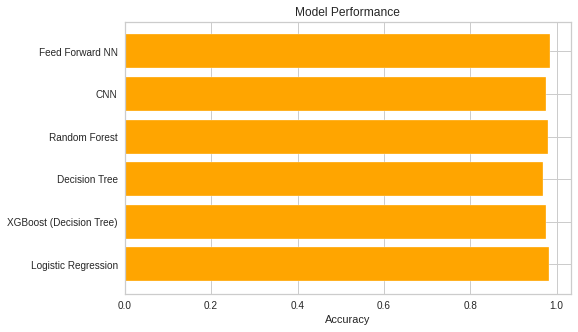

In [188]:
models = ["Logistic Regression","XGBoost (Decision Tree)","Decision Tree","Random Forest","CNN","Feed Forward NN"]
accuracies = [0.983, 0.975, 0.969, 0.979, 0.9755, 0.984]

fig, ax = plt.subplots(figsize=(8, 5))

# Create a horizontal bar chart
ax.barh(models, accuracies, color='orange')

# Set the x-axis label
ax.set_xlabel('Accuracy')

# Set the title
ax.set_title('Model Performance')

# Display the plot
plt.show()

The DFs we have prepared so far.

In [186]:
display(df_TRS_TR_OneCus)
display(df_groupedBuyingArticlesValues)
display(df_oneArticleMost)
display(df_all_values)
display(df_articles_all)
display(df_article_cluster)

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...   
7     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
12    0008968c0d451dbc5a9968da03196fe20051965edde741...   
14    000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
9983  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
9985  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
9988  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                               articles  
0                                 0663713001,0541518023  
2     0505221004,0685687003,0685687004,0685687001,05...  
7     0688873012,0501323011,0598859003,0688873020,06...  
12                                0531310002,0529841001  
14    0501820043,0501820043,0674681001,0671505001,06...  
...                                                 ...  
9983                              0673677002,0636455008  
9985                   0622238007,0622238009,0622238018  
9988  0657165001,0189616008,0524939008,0610274009,06...  
9995                                         0671057002  
9996        0305304008,0561617003,0671777002,0587782001  

[2954 rows x 2 columns]

article_id  price  customer_id   FN  Active   age  CMS_ACTIVE  \
4641   685687004   0.02           98 0.43    0.43 40.99        1.00   
4638   685687001   0.02           56 0.41    0.41 38.32        0.96   
4640   685687003   0.02           51 0.45    0.45 39.86        0.98   
4336   673677002   0.02           29 0.45    0.45 39.97        1.00   
4639   685687002   0.02           27 0.41    0.41 37.11        1.00   
...          ...    ...          ...  ...     ...   ...         ...   
2800   626815001   0.03            1 1.00    1.00 53.00        1.00   
2801   626815002   0.03            1 0.00    0.00 35.00        1.00   
2804   626816004   0.02            1 1.00    1.00 22.00        1.00   
2805   627009010   0.03            1 1.00    0.00 72.00        1.00   
2451   618398011   0.02            1 0.00    0.00 46.00        1.00   

      CMS_UNKNOWN  CMS_LEFT CLUB  CMS_PRE-CREATE  FNF_None  FNF_Monthly  \
4641         0.00           0.00            0.00      0.57         0.00   
4638         0.04           0.00            0.00      0.59         0.00   
4640         0.02           0.00            0.00      0.55         0.00   
4336         0.00           0.00            0.00      0.55         0.00   
4639         0.00           0.00            0.00      0.59         0.00   
...           ...            ...             ...       ...          ...   
2800         0.00           0.00            0.00      0.00         0.00   
2801         0.00           0.00            0.00      1.00         0.00   
2804         0.00           0.00            0.00      0.00         0.00   
2805         0.00           0.00            0.00      0.00         0.00   
2451         0.00           0.00            0.00      1.00         0.00   

      FNF_Regularly  
4641           0.43  
4638           0.41  
4640           0.45  
4336           0.45  
4639           0.41  
...             ...  
2800           1.00  
2801           0.00  
2804           1.00  
2805           1.00  
2451           0.00  

[4903 rows x 13 columns]

article_id      most_prod_name most_product_type_name  \
0    663713001  RaePushMelbourne2p                    Bra   
0    541518023  RaePushMelbourne2p                    Bra   
0    505221004          Incajumper                Sweater   
0    685687003    WYODAKNITOLOFFER                Sweater   
0    685687004    WYODAKNITOLOFFER                Sweater   
..         ...                 ...                    ...   
0    610274009     Heavyjsylongleg         LeggingsTights   
0    627554001     Heavyjsylongleg         LeggingsTights   
0    567968002     Heavyjsylongleg         LeggingsTights   
0    561617003      BoyDenimShorts                 Shorts   
0    671777002      BoyDenimShorts                 Shorts   

   most_product_group_name most_graphical_appearance_name  \
0                Underwear                          Solid   
0                Underwear                          Solid   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                        Melange   
0         GarmentUpperbody                          Solid   
..                     ...                            ...   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentUpperbody                          Solid   
0         GarmentLowerbody                          Solid   
0         GarmentLowerbody                          Solid   

   most_colour_group_name most_perceived_colour_value_name  \
0                    Pink                       DustyLight   
0                    Pink                       DustyLight   
0                    Pink                      MediumDusty   
0                   Black                             Dark   
0                   Black                             Dark   
..                    ...                              ...   
0                   Black                             Dark   
0                   Black                             Dark   
0                   Black                             Dark   
0                    Blue                       DustyLight   
0                    Blue                       DustyLight   

   most_perceived_colour_master_name  most_department_name  \
0                               Pink        CasualLingerie   
0                               Pink        CasualLingerie   
0                               Pink        TopsKnitwearDS   
0                              Black             Campaigns   
0                              Black             Campaigns   
..                               ...                   ...   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                              Black  YoungGirlJerseyFancy   
0                               Blue                Shorts   
0                               Blue                Shorts   

        most_index_name most_index_group_name         most_section_name  \
0       LingeriesTights            Ladieswear            WomensLingerie   
0       LingeriesTights            Ladieswear            WomensLingerie   
0               Divided               Divided           DividedSelected   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
0            Ladieswear            Ladieswear  WomensEverydayCollection   
..                  ...                   ...                       ...   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0   ChildrenSizes134170          BabyChildren                 YoungGirl   
0               Divided               Divided         DividedCollection   
0               Divided               Divided         DividedCollection   

   most_garment_group_name  
0           UnderNightwear  
0           UnderNightwear  
0                 Knitwear  
0            SpecialOffers  
0 

price   FN  Active  age  CMS_ACTIVE  CMS_UNKNOWN  CMS_LEFT CLUB  \
article_id                                                                    
685687004    0.06 0.43    0.43 0.38        1.00         0.00           0.00   
685687001    0.06 0.41    0.41 0.34        0.96         0.04           0.00   
685687003    0.06 0.45    0.45 0.36        0.98         0.02           0.00   
673677002    0.06 0.45    0.45 0.37        1.00         0.00           0.00   
685687002    0.06 0.41    0.41 0.32        1.00         0.00           0.00   
...           ...  ...     ...  ...         ...          ...            ...   
626815001    0.13 1.00    1.00 0.58        1.00         0.00           0.00   
626815002    0.13 0.00    0.00 0.28        1.00         0.00           0.00   
626816004    0.09 1.00    1.00 0.07        1.00         0.00           0.00   
627009010    0.10 1.00    0.00 0.90        1.00         0.00           0.00   
618398011    0.06 0.00    0.00 0.47        1.00         0.00           0.00   

            CMS_PRE-CREATE  FNF_None  FNF_Monthly  ...  MPTN_Woodballs  \
article_id                                         ...                   
685687004             0.00      0.57         0.00  ...               0   
685687001             0.00      0.59         0.00  ...               0   
685687003             0.00      0.55         0.00  ...               0   
673677002             0.00      0.55         0.00  ...               0   
685687002             0.00      0.59         0.00  ...               0   
...                    ...       ...          ...  ...             ...   
626815001             0.00      0.00         0.00  ...               0   
626815002             0.00      1.00         0.00  ...               0   
626816004             0.00      0.00         0.00  ...               0   
627009010             0.00      0.00         0.00  ...               0   
618398011             0.00      1.00         0.00  ...               0   

            MPTN_Zipperhead  PCMN_BluishGreen  PCMN_YellowishGreen  \
article_id                                                           
685687004                 0                 0                    0   
685687001                 0                 0                    0   
685687003                 0                 0                    0   
673677002                 0                 0                    0   
685687002                 0                 0                    0   
...                     ...               ...                  ...   
626815001                 0                 0                    0   
626815002                 0                 0                    0   
626816004                 0                 0                    0   
627009010                 0                 0                    0   
618398011                 0                 0                    0   

            SN_DividedAsiakeys  SN_DividedComplementsOther  SN_EQDivided  \
article_id                                                                 
685687004                    0                           0             0   
685687001                    0                           0             0   
685687003                    0                           0             0   
673677002                    0                           0             0   
685687002                    0                           0             0   
...                        ...                         ...           ...   
626815001                    0                           0             0   
626815002                    0                           0             0   
626816004                    0                           0             0   
627009010                    0                           0             0   
618398011                    0                           0             0   

            SN_LadiesOther  SN_MenEdition  SN_MenHMSport  
article_id                                                
685

MPTN_Accessoriesset  MPTN_Aliceband  MPTN_BabyBib  MPTN_Backpack  \
article_id                                                                     
0108775015                    0               0             0              0   
0108775044                    0               0             0              0   
0108775051                    0               0             0              0   
0110065001                    0               0             0              0   
0110065002                    0               0             0              0   
...                         ...             ...           ...            ...   
0953450001                    0               0             0              0   
0953763001                    0               0             0              0   
0956217002                    0               0             0              0   
0957375001                    0               0             0              0   
0959461001                    0               0             0              0   

            MPTN_Bag  MPTN_Ballerinas  MPTN_Beanie  MPTN_Belt  MPTN_Bikinitop  \
article_id                                                                      
0108775015         0                0            0          0               0   
0108775044         0                0            0          0               0   
0108775051         0                0            0          0               0   
0110065001         0                0            0          0               0   
0110065002         0                0            0          0               0   
...              ...              ...          ...        ...             ...   
0953450001         0                0            0          0               0   
0953763001         0                0            0          0               0   
0956217002         0                0            0          0               0   
0957375001         0                0            0          0               0   
0959461001         0                0            0          0               0   

            MPTN_Blanket  ...  GGN_Shorts  GGN_Skirts  GGN_SocksandTights  \
article_id                ...                                               
0108775015             0  ...           0           0                   0   
0108775044             0  ...           0           0                   0   
0108775051             0  ...           0           0                   0   
0110065001             0  ...           0           0                   0   
0110065002             0  ...           0           0                   0   
...                  ...  ...         ...         ...                 ...   
0953450001             0  ...           0           0                   1   
0953763001             0  ...           0           0                   0   
0956217002             0  ...           0           0                   0   
0957375001             0  ...           0           0                   0   
0959461001             0  ...           0           0                   0   

            GGN_SpecialOffers  GGN_Swimwear  GGN_Trousers  GGN_TrousersDenim  \
article_id                                                                     
0108775015                  0             0             0                  0   
0108775044                  0             0             0                  0   
0108775051                  0             0             0                  0   
0110065001                  0             0             0                  0   
0110065002                  0             0             0                  0   
...                       ...           ...           ...                ...   
0953450001                  0             0             0                  0   
0953763001                  0             0             0                  0   
0956217002                  0             0             0                  0   
0957375001                  0      

article_id  cluster  buying_count
0      685687004        2            98
1      685687001       16            56
2      685687003        2            51
3      673677002       12            29
4      685687002       16            27
...          ...      ...           ...
4898   626815001        1             1
4899   626815002       23             1
4900   626816004       18             1
4901   627009010       20             1
4902   618398011        6             1

[4903 rows x 3 columns]

In [251]:
df_TRS_TR_OneCus.to_csv('Customer_Articles.csv')

In [246]:
df_article_cluster.to_csv('articles_clusters.csv')

## Estimation Operations

We are in the estimation phase.

I am preparing the DF that I will use to generate the information of a customer in the estimation phase. We could have done this with df_customer_root without provisioning.


In [247]:
df_customersWithProperties = pd.merge(transactions, customers, on='customer_id', how='left')
df_customersWithProperties = df_customersWithProperties.sort_values('day', ascending=False)
df_customersWithProperties

customer_id  article_id  price  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0663713001   0.05   
6670  23f51c30d7615e0f806de86804026cf5a238506a54824b...  0656377002   0.03   
6663  23f1e98f8465a8e696c47f7bac665021bc156c6058fb16...  0590582001   0.02   
6664  23f37e31b501bd3b5588ecd2f81ff498f2b6ef360e1693...  0588689001   0.03   
6665  23f51c30d7615e0f806de86804026cf5a238506a54824b...  0616763001   0.01   
...                                                 ...         ...    ...   
3333  13be5c80b127f566b344dcbeae23ee679dae0c88d51a62...  0529008026   0.02   
3334  13be5c80b127f566b344dcbeae23ee679dae0c88d51a62...  0541519001   0.02   
3335  13be5c80b127f566b344dcbeae23ee679dae0c88d51a62...  0573716023   0.03   
3336  13be5c80b127f566b344dcbeae23ee679dae0c88d51a62...  0529012025   0.01   
9999  366d7effce9489934c3317a8e4e1828622d51f30cee29c...  0587782001   0.03   

      sales_channel_id  year  month  day   FN  Active   age  CMS_ACTIVE  \
0                    2    18      9   20 0.00    0.00 24.00           1   
6670                 2    18      9   20 0.00    0.00 52.00           1   
6663                 2    18      9   20 1.00    1.00 31.00           1   
6664                 1    18      9   20 0.00    0.00 27.00           1   
6665                 2    18      9   20 0.00    0.00 52.00           1   
...                ...   ...    ...  ...  ...     ...   ...         ...   
3333                 2    18      9   20 0.00    0.00 24.00           1   
3334                 2    18      9   20 0.00    0.00 24.00           1   
3335                 2    18      9   20 0.00    0.00 24.00           1   
3336                 2    18      9   20 0.00    0.00 24.00           1   
9999                 2    18      9   20 0.00    0.00 25.00           1   

      CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  FNF_Monthly  FNF_None  \
0                 0               0            0            0         1   
6670              0               0            0            0         1   
6663              0               0            0            0         0   
6664              0               0            0            0         1   
6665              0               0            0            0         1   
...             ...             ...          ...          ...       ...   
3333              0               0            0            0         1   
3334              0               0            0            0         1   
3335              0               0            0            0         1   
3336              0               0            0            0         1   
9999              0               0            0            0         1   

      FNF_Regularly  
0                 0  
6670              0  
6663              1  
6664              0  
6665              0  
...             ...  
3333              0  
3334              0  
3335              0  
3336              0  
9999              0  

[10000 rows x 17 columns]

In [248]:
df_customersWithProperties.to_csv('df_customersWithProperties.csv')

Receiving products purchased by a customer as an example

In [190]:
df_TRS_TR_OneCus.iloc[2,:]['customer_id']

'00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280'

In [191]:
articles = df_TRS_TR_OneCus.iloc[2,:]['articles']
articles = articles.split(',')
display(articles)
df_ad = pd.DataFrame(articles,columns = ['articles'])
display(df_ad)

['0688873012', '0501323011', '0598859003', '0688873020', '0688873011']

articles
0  0688873012
1  0501323011
2  0598859003
3  0688873020
4  0688873011

In [192]:
df_ad['articles']=df_ad['articles'].astype('int64')

In [193]:
df_reduced_article[df_reduced_article['article_id'].isin(df_ad['articles'].to_numpy())]

article_id           prod_name product_type_name product_group_name  \
5944    501323011  Thomaspaperbagwide          Trousers   GarmentLowerbody   
22540   598859003           FionaWide          Trousers   GarmentLowerbody   
47415   688873011                Gyda            Blouse   GarmentUpperbody   
47416   688873012                Gyda            Blouse   GarmentUpperbody   
47423   688873020                Gyda            Blouse   GarmentUpperbody   

      graphical_appearance_name colour_group_name perceived_colour_value_name  \
5944                      Solid             Black                        Dark   
22540                     Solid               Red                        Dark   
47415                     Solid         Turquoise                  DustyLight   
47416            Alloverpattern             Beige                  DustyLight   
47423                     Solid            Yellow                 MediumDusty   

      perceived_colour_master_name department_name  index_name  \
5944                         Black         Trouser  Ladieswear   
22540                          Red         Trouser  Ladieswear   
47415                    Turquoise          Blouse  Ladieswear   
47416                        Beige          Blouse  Ladieswear   
47423                       Yellow          Blouse  Ladieswear   

      index_group_name     section_name garment_group_name  
5944        Ladieswear  WomensTailoring           Trousers  
22540       Ladieswear  WomensTailoring           Trousers  
47415       Ladieswear  WomensTailoring            Blouses  
47416       Ladieswear  WomensTailoring            Blouses  
47423       Ladieswear  WomensTailoring            Blouses

 am creating my class that prepares the product information that a customer receives that I will use in the estimation phase.

In [194]:
class CustomerMostArticles:
    
    df_base = None
    df_customersWithArticlesList = None
    df_reduced_article = None
    customer_id = None
    
    def __init__(self,customer_id,customersWithArticlesList,article_list):
        self.customer_id = customer_id;
        self.customersWithArticlesList = customersWithArticlesList.copy()
        self.df_reduced_article = article_list.copy()
        
        
        
    def build(self):

    
        row = self.customersWithArticlesList[self.customersWithArticlesList['customer_id'] == self.customer_id]

        df_first = None
        df_others = None
        df_others_grouped = None
        df_customersWithArticlesList = None
        customerArticles = self.customerArticles(row)
        customerArticlesDetails = self.getCustomerArticlesDetails(customerArticles)
        customerArticlesDetails = self.dropRedundant(customerArticlesDetails)
            
#         print(customerArticlesDetails.shape)
        if(customerArticlesDetails.shape[0] == 1):
            
            df_first  = customerArticlesDetails.iloc[0:1]
            df_first = self.createFirst(df_first)
            df_first = df_first.reset_index(drop=True)
            return df_first
        else:
            
            df_first  = customerArticlesDetails.iloc[0:1]
            df_others = customerArticlesDetails[1:len(customerArticlesDetails)]
            df_others_grouped = df_others.groupby(["article_id"],as_index=False)
            df_customersMost = self.getMost(df_others)
            df_first = self.createFirst(df_first)
            articles = pd.concat([df_first,df_customersMost]).reset_index(drop=True)
            return articles
            
            
        
    def customerArticles(self,row):
        articles = row['articles'].tolist()
        articles = articles[0].split(',')
        for i in range(0, len(articles)):
            articles[i] = int(articles[i])
        return articles
        
        
    def getCustomerArticlesDetails(self,articlesList):    
        return df_reduced_article[df_reduced_article['article_id'].isin(articlesList)]
        
    def dropRedundant(self,df):
        return df.drop(['product_code','product_type_no','graphical_appearance_no',
                                     'colour_group_code','perceived_colour_value_id',
                                     'perceived_colour_master_id','department_no','prod_name',
                                     'index_group_no','index_code','section_no','garment_group_no','detail_desc'],axis=1,errors='ignore')
    
    def getMost(self,others_arr):
        df_article_most = pd.DataFrame()
        columns = others_arr.columns.tolist()
        del columns[0]
        columns = ['most_' + sub for sub in columns]
        values = np.array([])
        for col in others_arr:
            if(col == 'base_article_id' or col == 'article_id'):
                continue
            values = np.append(values, others_arr[col].value_counts().index[0])
        cache_df = pd.DataFrame([values],columns = columns)
        return cache_df
    
    def createFirst(self,first_row):
        first_row = first_row.drop(['article_id'], axis=1)
        columns = first_row.columns.tolist()
        first_row.columns = ['most_' + sub for sub in columns]
        
        values = np.array([])
        for col in first_row:
            
            if(col == 'base_article_id' or col == 'article_id'):
                continue
            values = np.append(values, first_row[col].value_counts().index[0])
            
        
        cache_df = pd.DataFrame([values],columns = first_row.columns)
        return cache_df

For example, a customer's information

Get a sample customer id - Use it you want to try it yourself.

Pay attention to whether the customer you sent is within the area I specified with the head.

In [195]:
print(df_customersWithProperties.sample().iloc[0]['customer_id'])
df_customersWithProperties[df_customersWithProperties.customer_id == df_customersWithProperties.sample().iloc[0]['customer_id']]

00e1f75b5a9c8deed486dc2c409329e8aaef117d314e01fe0c08a7300d4d9f03


customer_id  article_id  price  \
9061  30fcba564abbe08ace351099f711cb595731a08f481758...  0632534005   0.02   
9058  30fcba564abbe08ace351099f711cb595731a08f481758...  0656345001   0.03   
9059  30fcba564abbe08ace351099f711cb595731a08f481758...  0529008027   0.02   
9060  30fcba564abbe08ace351099f711cb595731a08f481758...  0509091025   0.02   

      sales_channel_id  year  month  day   FN  Active   age  CMS_ACTIVE  \
9061                 1    18      9   20 0.00    0.00 27.00           1   
9058                 1    18      9   20 0.00    0.00 27.00           1   
9059                 1    18      9   20 0.00    0.00 27.00           1   
9060                 1    18      9   20 0.00    0.00 27.00           1   

      CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  FNF_Monthly  FNF_None  \
9061              0               0            0            0         1   
9058              0               0            0            0         1   
9059              0               0            0            0         1   
9060              0               0            0            0         1   

      FNF_Regularly  
9061              0  
9058              0  
9059              0  
9060              0

In [196]:
df_customerArticleMost = CustomerMostArticles("00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280",
                                              df_TRS_TR_OneCus.head(5),df_reduced_article).build()
df_customerArticleMost

most_product_type_name most_product_group_name  \
0               Trousers        GarmentLowerbody   
1                 Blouse        GarmentUpperbody   

  most_graphical_appearance_name most_colour_group_name  \
0                          Solid                  Black   
1                          Solid                    Red   

  most_perceived_colour_value_name most_perceived_colour_master_name  \
0                             Dark                             Black   
1                       DustyLight                               Red   

  most_department_name most_index_name most_index_group_name  \
0              Trouser      Ladieswear            Ladieswear   
1               Blouse      Ladieswear            Ladieswear   

  most_section_name most_garment_group_name  
0   WomensTailoring                Trousers  
1   WomensTailoring                 Blouses

I'm creating my class that prepares the customer information that I will use in the prediction phase of a customer.

In [197]:
class CustomerInfo:
    customerWithProperties = None
    customersWithProperties = None
    customer_id = None
    
    def __init__(self,customer_id,customersWithProperties):
        self.customersWithProperties = customersWithProperties.copy()
        self.customerWithProperties = customersWithProperties.drop_duplicates(subset=['customer_id'])
        self.customer_id = customer_id
        
    def build(self):
        
        row = self.customerWithProperties[self.customerWithProperties['customer_id'] == self.customer_id]
        customer_id = self.customer_id
        customerData = self.customersWithProperties[self.customersWithProperties.customer_id == customer_id]
        customerData = customerData.reset_index(drop=True)
        if(customerData.shape[0] > 1):
            customerData['age'] = customerData['age'].mean()
            customerData['price'] = customerData['price'].mean()
        customerData = customerData.drop(['day','month','year','sales_channel_id','postal_code'],axis=1,errors='ignore')
        customerData = customerData.iloc[0:1]
        customerData = pd.concat([customerData]*2).reset_index(drop=True)
        return customerData

For example, a customer's information. I mentioned above why we made 2 lines.

In [198]:
df_customer_info = CustomerInfo("2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d00816c71ea70999825",df_customersWithProperties).build()
df_customer_info

customer_id  article_id  price   FN  \
0  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.02 0.00   
1  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.02 0.00   

   Active   age  CMS_ACTIVE  CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  \
0    0.00 52.00           1              0               0            0   
1    0.00 52.00           1              0               0            0   

   FNF_Monthly  FNF_None  FNF_Regularly  
0            0         1              0  
1            0         1              0

In [199]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

Display of information tables to be combined as an example.

In [200]:
df_customer_info

customer_id  article_id  price   FN  \
0  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.02 0.00   
1  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.02 0.00   

   Active   age  CMS_ACTIVE  CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  \
0    0.00 52.00           1              0               0            0   
1    0.00 52.00           1              0               0            0   

   FNF_Monthly  FNF_None  FNF_Regularly  
0            0         1              0  
1            0         1              0

In [201]:
df_customerArticleMost

most_product_type_name most_product_group_name  \
0               Trousers        GarmentLowerbody   
1                 Blouse        GarmentUpperbody   

  most_graphical_appearance_name most_colour_group_name  \
0                          Solid                  Black   
1                          Solid                    Red   

  most_perceived_colour_value_name most_perceived_colour_master_name  \
0                             Dark                             Black   
1                       DustyLight                               Red   

  most_department_name most_index_name most_index_group_name  \
0              Trouser      Ladieswear            Ladieswear   
1               Blouse      Ladieswear            Ladieswear   

  most_section_name most_garment_group_name  
0   WomensTailoring                Trousers  
1   WomensTailoring                 Blouses

I am preparing my class where the merge operation will be done.

In [202]:
class CustomerDataCreate:
    
    df_all_values = None
    customer_df = None
    articles_df = None
    max_price = None
    min_price = None
    max_age = None
    min_age = None
    model_data = None
    example_data = None
    
    def __init__(self,customer_data,articles_data,max_price,min_price,max_age,min_age,example_data):
        
        self.customer_df = customer_data
        self.articles_df = articles_data
        self.max_price = max_price
        self.min_price = min_price
        self.max_age = max_age
        self.min_age = min_age
        self.example_data = example_data
        
        
    def build(self):
        self.df_all_values = pd.concat([self.customer_df,self.articles_df],axis=1)  
        self.df_all_values['age'] = self.df_all_values['age'].apply(self.normalizeAge)
        self.df_all_values['price'] = self.df_all_values['price'].apply(self.normalizePrice)
        return self.df_all_values
    
    def createModelData(self):
        model_data = self.df_all_values.drop(['customer_id'],axis=1)
        model_data = pd.get_dummies(model_data, columns = ["most_product_type_name"], prefix = ["MPTN"])
        model_data = pd.get_dummies(model_data, columns = ["most_product_group_name"], prefix = ["MPGN"])
        model_data = pd.get_dummies(model_data, columns = ["most_graphical_appearance_name"], prefix = ["GAN"])
        model_data = pd.get_dummies(model_data, columns = ["most_colour_group_name"], prefix = ["CGN"])
        model_data = pd.get_dummies(model_data, columns = ["most_perceived_colour_value_name"], prefix = ["PCVN"])
        model_data = pd.get_dummies(model_data, columns = ["most_perceived_colour_master_name"], prefix = ["PCMN"])
        model_data = pd.get_dummies(model_data, columns = ["most_department_name"], prefix = ["DN"])
        model_data = pd.get_dummies(model_data, columns = ["most_index_name"], prefix = ["IN"])
        model_data = pd.get_dummies(model_data, columns = ["most_index_group_name"], prefix = ["IGN"])
        model_data = pd.get_dummies(model_data, columns = ["most_section_name"], prefix = ["SN"])
        model_data = pd.get_dummies(model_data, columns = ["most_garment_group_name"], prefix = ["GGN"])

        self.example_data = pd.concat([self.example_data]*2)

        different_cols = self.example_data.columns.difference(model_data.columns)
        self.example_data = self.example_data[different_cols]
        self.example_data = self.example_data.reset_index(drop=True)
        
        model_data = pd.concat([model_data,self.example_data],axis=1)
        model_data = model_data.set_index('article_id',drop=True)
        return model_data
        
    def normalizeAge(self,val):
        return (val-self.min_age)/(self.max_age-self.min_age)
        
    def normalizePrice(self,val):
        return (val-self.min_price)/(self.max_price-self.min_price)

In [219]:
customerData = CustomerDataCreate(df_customer_info, df_customerArticleMost, max_price, min_price, max_age, min_age, example_modelData)
oneCustomerData = customerData.build()
oneCustomerModelData = customerData.createModelData()

customer_id  article_id  price   FN  \
0  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.02 0.00   
1  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.02 0.00   

   Active   age  CMS_ACTIVE  CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  \
0    0.00 52.00           1              0               0            0   
1    0.00 52.00           1              0               0            0   

   FNF_Monthly  FNF_None  FNF_Regularly  
0            0         1              0  
1            0         1              0

The data representation I created above that I will use to complete the missing information when the dummy variable is created. Thanks to this information, I fill in the missing information for my model after the dummy variables are created.

In [204]:
example_modelData

MPTN_Accessoriesset  MPTN_Aliceband  MPTN_BabyBib  MPTN_Backpack  MPTN_Bag  \
0                    0               0             0              0         0   

   MPTN_Ballerinas  MPTN_Beanie  MPTN_Belt  MPTN_Bikinitop  MPTN_Blanket  ...  \
0                0            0          0               0             0  ...   

   GGN_Shorts  GGN_Skirts  GGN_SocksandTights  GGN_SpecialOffers  \
0           0           0                   0                  0   

   GGN_Swimwear  GGN_Trousers  GGN_TrousersDenim  GGN_UnderNightwear  \
0             0             0                  0                   0   

   GGN_Unknown  GGN_WovenJerseyKnittedmixBaby  
0            0                              0  

[1 rows x 568 columns]

Display of a customer's information combined and to be inserted into the model

In [205]:
display(oneCustomerData)

customer_id  article_id  price   FN  \
0  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.08 0.00   
1  2648daf1914c9ab1404629a8dfe1f9e58ce5fdd3da5a0d...  0665211001   0.08 0.00   

   Active  age  CMS_ACTIVE  CMS_LEFT CLUB  CMS_PRE-CREATE  CMS_UNKNOWN  ...  \
0    0.00 0.57           1              0               0            0  ...   
1    0.00 0.57           1              0               0            0  ...   

   most_product_group_name  most_graphical_appearance_name  \
0         GarmentLowerbody                           Solid   
1         GarmentUpperbody                           Solid   

   most_colour_group_name most_perceived_colour_value_name  \
0                   Black                             Dark   
1                     Red                       DustyLight   

  most_perceived_colour_master_name most_department_name most_index_name  \
0                             Black              Trouser      Ladieswear   
1                               Red               Blouse      Ladieswear   

  most_index_group_name most_section_name most_garment_group_name  
0            Ladieswear   WomensTailoring                Trousers  
1            Ladieswear   WomensTailoring                 Blouses  

[2 rows x 24 columns]

In [206]:
display(oneCustomerModelData)

price   FN  Active  age  CMS_ACTIVE  CMS_LEFT CLUB  \
article_id                                                       
0665211001   0.08 0.00    0.00 0.57           1              0   
0665211001   0.08 0.00    0.00 0.57           1              0   

            CMS_PRE-CREATE  CMS_UNKNOWN  FNF_Monthly  FNF_None  ...  \
article_id                                                      ...   
0665211001               0            0            0         1  ...   
0665211001               0            0            0         1  ...   

            SN_WomensJackets  SN_WomensLingerie  SN_WomensNightwearSocksTigh  \
article_id                                                                     
0665211001                 0                  0                            0   
0665211001                 0                  0                            0   

            SN_WomensPremium  SN_WomensShoes  SN_WomensSmallaccessories  \
article_id                                                                
0665211001                 0               0                          0   
0665211001                 0               0                          0   

            SN_WomensSwimwearbeachwear  SN_WomensTrend  SN_YoungBoy  \
article_id                                                            
0665211001                           0               0            0   
0665211001                           0               0            0   

            SN_YoungGirl  
article_id                
0665211001             0  
0665211001             0  

[2 rows x 579 columns]

Estimate of a customer as an example

In [207]:
df_article_cluster[df_article_cluster.cluster == 1]

article_id  cluster  buying_count
37     539723001        1            13
69     189616008        1            10
111    668767002        1             8
112    678086003        1             8
131    189616007        1             7
...          ...      ...           ...
4753   552826028        1             1
4775   631833001        1             1
4859   554450002        1             1
4894   554479001        1             1
4898   626815001        1             1

[220 rows x 3 columns]

I'm writing a main class that will combine all the classes I wrote above and make predictions based on the customer information given.

In [281]:
class createCustomerPrediction:
    instance_CustomerMostArticles = None
    instance_CustomerInfo = None
    instance_CustomerDataCreate = None
    model = None
    articleWithCluster = None
    customerWithPredictions = None

    def __init__(self,CustomerMostArticles,CustomerInfo,CustomerDataCreate,model,articleWithCluster):
        self.instance_CustomerMostArticles = CustomerMostArticles
        self.instance_CustomerInfo = CustomerInfo
        self.instance_CustomerDataCreate = CustomerDataCreate
        self.articleWithCluster = articleWithCluster
        self.model = model
        self.customerWithPredictions = pd.DataFrame()
    
    def letsPrediction(self,transactionsOneCustomer,articleList,customersWithProperties,
                      max_price,min_price,max_age,min_age,example_modelData):
        
        transactionsOneCustomer = transactionsOneCustomer.reset_index(drop=True)
        
        for index in range(len(transactionsOneCustomer)):
            row = transactionsOneCustomer.loc[index]
            
            df_customerArticleMost = self.instance_CustomerMostArticles(row['customer_id'],transactionsOneCustomer
                                                                        ,articleList).build()
            df_customer_info = self.instance_CustomerInfo(row['customer_id'],customersWithProperties).build()
            
            customerData = self.instance_CustomerDataCreate(df_customer_info,
                                              df_customerArticleMost, max_price,min_price,max_age,min_age,example_modelData)        
            oneCustomerData = customerData.build()
            oneCustomerModelData = customerData.createModelData()
            prediction = self.createPrediction(oneCustomerModelData)

            prediction = ','.join(map(str, prediction))
            cache_df = pd.DataFrame([[row['customer_id'],prediction]], columns=['customer_id','predictions'])
        
            if(self.customerWithPredictions.empty):
                self.customerWithPredictions = cache_df
            else:          
                self.customerWithPredictions = pd.concat([self.customerWithPredictions,cache_df])
                
                
    def getPredictions(self):
        self.customerWithPredictions = self.customerWithPredictions.reset_index(drop=True)
        return self.customerWithPredictions
    
    def createPrediction(self,modelData):
        prediction = self.model.predict(modelData)
        print(prediction)
        
#         print(prediction)
        return self.getArticles(prediction)
    
    def getArticles(self,prediction):
        self.articleWithCluster
        first_items = self.articleWithCluster[self.articleWithCluster.cluster == prediction[0]][:4]['article_id'].values
        if(prediction[0] == prediction[1]):
            last_items = self.articleWithCluster[self.articleWithCluster.cluster == prediction[1]][4:8]['article_id'].values
        else:
            last_items = self.articleWithCluster[self.articleWithCluster.cluster == prediction[1]][:3]['article_id'].values
    
        return [*first_items,*last_items]

**My predictions :)**


In [283]:
prediction = createCustomerPrediction(CustomerMostArticles, CustomerInfo, CustomerDataCreate, lgbm_model, df_article_cluster)
prediction.letsPrediction(df_TRS_TR_OneCus, df_reduced_article, df_customersWithProperties, max_price, min_price, max_age, min_age, example_modelData)

[7 7]
[12 13]
[ 7 24]
[7 7]
[ 7 13]
[13 26]
[13  7]
[13 13]
[7 7]
[24 28]
[13  7]
[28 28]
[ 7 12]
[ 7 24]
[13  7]
[28 28]
[13  9]
[ 7 13]
[13  7]
[ 7 13]
[13 26]
[13  7]
[13 26]
[13 26]
[28 28]
[13 26]
[7 7]
[24  7]
[28 28]
[13 26]
[ 7 24]
[13 28]
[12 24]
[7 7]
[26 13]
[13 26]
[13 13]
[13 26]
[7 7]
[ 7 13]
[13 13]
[13 13]
[13  7]
[7 7]
[13 13]
[13 26]
[28 28]
[13 26]
[7 7]
[13 26]
[13  7]
[ 7 24]
[7 7]
[ 7 24]
[ 7 24]
[ 7 24]
[13  7]
[ 7 13]
[12  7]
[7 7]
[ 7 13]
[ 7 13]
[7 7]
[13 13]
[ 7 28]
[12 28]
[24  7]
[12 11]
[28 28]
[12 28]
[13 26]
[13 24]
[13  7]
[ 7 28]
[7 7]
[ 7 13]
[13 26]
[13 13]
[12 28]
[13  7]
[13 13]
[7 7]
[7 7]
[28  7]
[28 28]
[28 28]
[7 7]
[7 7]
[26 13]
[ 7 24]
[7 7]
[13 28]
[ 7 13]
[13 26]
[13 13]
[24  7]
[12 11]
[13  7]
[ 7 28]
[24  7]
[24  7]
[13  7]
[ 7 12]
[13 13]
[7 7]
[24  7]
[13  7]
[7 7]
[ 7 13]
[13 13]
[ 7 13]
[28  7]
[13 26]
[ 7 24]
[ 7 13]
[13 13]
[13  7]
[13 13]
[13 13]
[7 7]
[12 12]
[13 13]
[13 26]
[24  7]
[13 26]
[13 13]
[ 7 13]
[13  7]
[28 28]
[13 26]


KeyboardInterrupt: 

In [210]:
prediction.getPredictions()

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
1     00007d2de826758b65a93dd24ce629ed66842531df6699...   
2     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
3     0008968c0d451dbc5a9968da03196fe20051965edde741...   
4     000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
2949  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
2950  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
2951  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
2952  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
2953  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                            predictions  
0     577513001,649397002,656367001,648968003,512251...  
1     673677002,562820006,579541001,568601006,635742...  
2     577513001,649397002,656367001,648968003,529012...  
3     577513001,649397002,656367001,648968003,512251...  
4     577513001,649397002,656367001,648968003,635742...  
...                                                 ...  
2949  577513001,649397002,656367001,648968003,688873...  
2950  577513001,649397002,656367001,648968003,512251...  
2951  529012025,541518023,464277014,654434002,577513...  
2952  635742002,692401001,592959001,589004004,639104...  
2953  635742002,692401001,592959001,589004004,639104...  

[2954 rows x 2 columns]

In [221]:
import matplotlib.image as mpimg
PATH = "./data/images/"

In the last section, I used index 0 instead of id. Don't forget to fix it when it works :)

In [222]:
from PIL import Image
def showPrediction(customer_id,predictionsDF,transactionsDF, rows=2, columns=7, figsize=(20,10)):
    predictions = predictionsDF[predictionsDF["customer_id"] == customer_id].iloc[0]['predictions'].split(",")
    bought_items = transactionsDF[transactionsDF["customer_id"] == customer_id].iloc[0]['articles'].split(",")
    print(bought_items)
    print(predictions)
    f, ax = plt.subplots(rows, columns, figsize=figsize)
    for i in range(rows):
        index = 0
        for j in range(columns):
            if i==0:
                try:
                    img_path = f'{PATH}{str(bought_items[index])[:3]}/0{int(bought_items[index])}.jpg'
                    img = Image.open(img_path)
                    ax[i,j].imshow(img)
                    ax[i,j].set_xticks([], [])
                    ax[i,j].set_yticks([], [])
                    ax[i,j].grid(False)
                    ax[i,j].set_title("Bought")
                    index += 1
                except IndexError:
                    continue
            else:
                try:
                    img_path = f'{PATH}0{str(predictions[index])[:2]}/0{int(predictions[index])}.jpg'
                    img = Image.open(img_path)
                    ax[i,j].imshow(img)
                    ax[i,j].set_xticks([], [])
                    ax[i,j].set_yticks([], [])
                    ax[i,j].grid(False)
                    ax[i,j].set_title("Prediction")
                    index += 1
                except IndexError:
                    continue
                        
    plt.tight_layout()
    plt.show()

['0710390001', '0640124001', '0654772003', '0560047003']
['529012025', '541518023', '464277014', '654434002', '577513001', '649397002', '656367001']


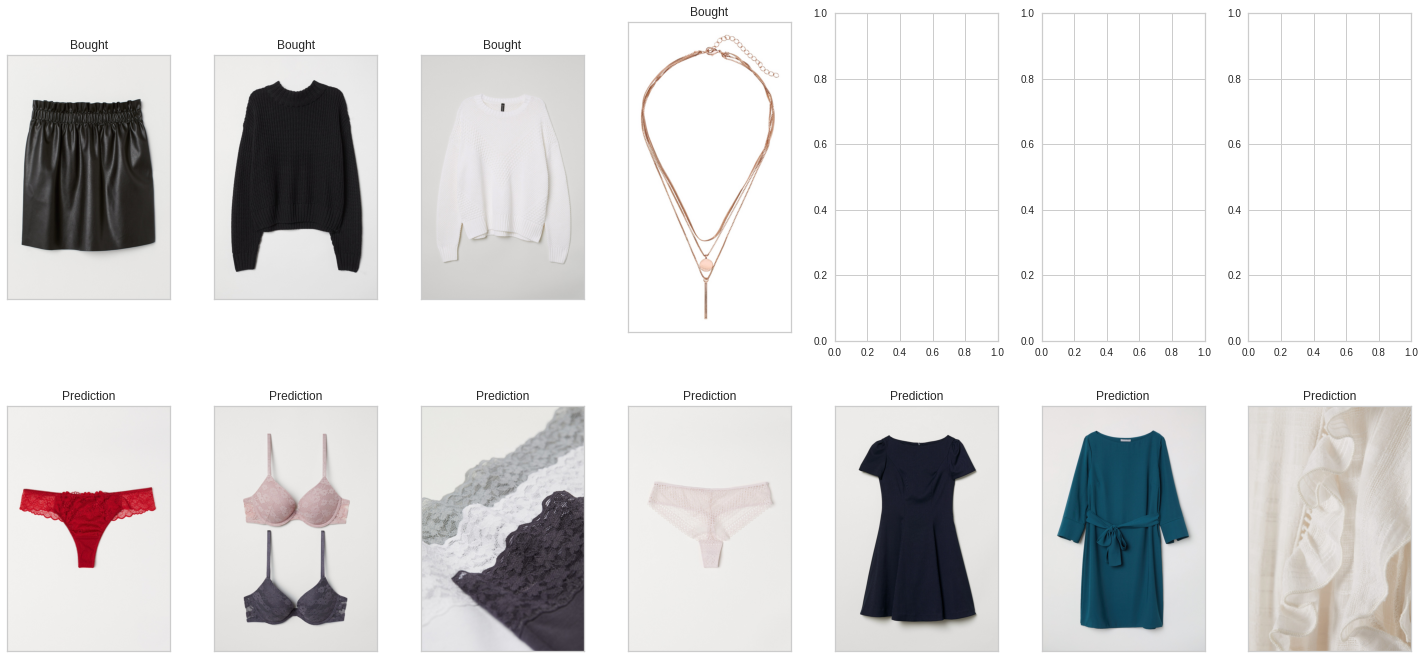

In [223]:
# showPrediction("2ab88c702265f0b335539ea1ec8453bb0752df5e76ee296545b83b5c221d167c",prediction.getPredictions(),df_TRS_TR_OneCus)
showPrediction("2ab88c702265f0b335539ea1ec8453bb0752df5e76ee296545b83b5c221d167c", prediction.getPredictions(), df_TRS_TR_OneCus)

['0537688014', '0214844001']
['529012025', '541518023', '464277014', '654434002', '577513001', '649397002', '656367001']


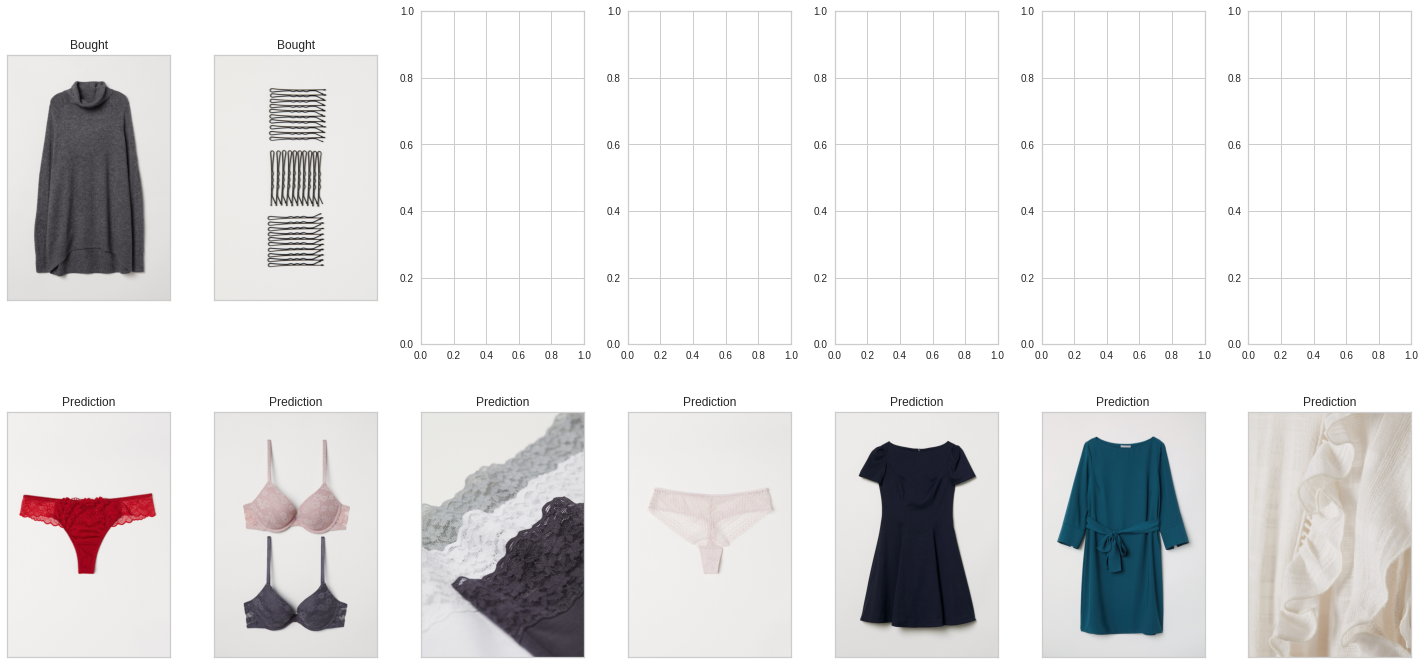

In [224]:
showPrediction("01c8cb2f730cd7253bd3e290d98823894222b305139631fc0471d8d0b3a4bde9", prediction.getPredictions(), df_TRS_TR_OneCus)

In [225]:
df_TRS_TR_OneCus

customer_id  \
0     000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
2     00007d2de826758b65a93dd24ce629ed66842531df6699...   
7     00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...   
12    0008968c0d451dbc5a9968da03196fe20051965edde741...   
14    000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...   
...                                                 ...   
9983  365bfd22ce4b8aabeb84c847266a80a225b04f188629bf...   
9985  365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a9524...   
9988  36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7...   
9995  366b89e56112858fd747d2b8ec9519b8c7856d34e546eb...   
9996  366d7effce9489934c3317a8e4e1828622d51f30cee29c...   

                                               articles  
0                                 0663713001,0541518023  
2     0505221004,0685687003,0685687004,0685687001,05...  
7     0688873012,0501323011,0598859003,0688873020,06...  
12                                0531310002,0529841001  
14    0501820043,0501820043,0674681001,0671505001,06...  
...                                                 ...  
9983                              0673677002,0636455008  
9985                   0622238007,0622238009,0622238018  
9988  0657165001,0189616008,0524939008,0610274009,06...  
9995                                         0671057002  
9996        0305304008,0561617003,0671777002,0587782001  

[2954 rows x 2 columns]

In [293]:
preds = prediction.getPredictions()
preds[preds['customer_id']=='01c8cb2f730cd7253bd3e290d98823894222b305139631fc0471d8d0b3a4bde9'].iloc[0]['predictions'].split(",")

['529012025',
 '541518023',
 '464277014',
 '654434002',
 '577513001',
 '649397002',
 '656367001']

In [294]:
preds = prediction.getPredictions()
preds[preds['customer_id']=='2ab88c702265f0b335539ea1ec8453bb0752df5e76ee296545b83b5c221d167c'].iloc[0]['predictions'].split(",")

IndexError: single positional indexer is out-of-bounds

In [228]:
dims = [
    'prod_name',
    'product_type_no',
    'product_group_name',
    'graphical_appearance_no',
    'colour_group_code',
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_name',
    'index_group_no',
    'section_no',
    'garment_group_no'
]

In [229]:
articles = pd.read_csv(data_dir + 'articles.csv')

In [230]:
articles.set_index('article_id',inplace=True)

In [231]:
from sklearn.preprocessing import LabelEncoder

In [232]:
prod_name_enc = LabelEncoder()
group_name_enc = LabelEncoder()
index_enc = LabelEncoder()

articles['prod_name'] = prod_name_enc.fit_transform(articles['prod_name'].values.reshape(-1,1))
articles['product_group_name'] = group_name_enc.fit_transform(articles['product_group_name'].values.reshape(-1,1))
articles['index_name'] = index_enc.fit_transform(articles['index_name'].values.reshape(-1,1))

In [233]:
vector = np.ascontiguousarray(articles[dims].values, dtype=np.float32)
items = np.array(articles.index)

In [234]:
item_data = {"id":items,"vector":vector}

In [ ]:
!apt install libomp-dev
!pip install faiss-cpu

In [292]:
import faiss

class AnnoyIndex():
    def __init__(self, vectors, labels):
        self.dimension = vectors.shape[1]
        self.vectors = vectors.astype('float32')
        self.labels = labels   
        self.search_in_x_trees = 8
   
    def build(self, number_of_trees=100):
        self.index = faiss.IndexFlatL2(self.dimension)
        self.index.add(self.vectors)
        self.index.nprobe = self.search_in_x_trees
        
    def query(self, vector, k=10):
        distances, indices = self.index.search(
            vector.reshape(1, -1).astype('float32'), 
            k)
        return [self.labels[i] for i in indices[0]]

In [236]:
index = AnnoyIndex(item_data['vector'],item_data['id'])
index.build(100)

In [284]:
dd = {"item":[],"similar_items":[]}
for x in tqdm(range(len(item_data['vector']))):
    similar_items = index.query(item_data['vector'][x])
    dd['item'].append(item_data['id'][x])
    dd['similar_items'].append(similar_items)

  0%|          | 0/105542 [00:00<?, ?it/s]

In [286]:
similar_items_df = pd.DataFrame(dd)
similar_items_df

item                                      similar_items
0       108775015  [108775015, 767834001, 736870005, 824999001, 7...
1       108775044  [108775044, 767834002, 108775051, 824999002, 1...
2       108775051  [108775051, 108775044, 824999002, 767834002, 7...
3       110065001  [110065001, 153115019, 531697001, 253448001, 1...
4       110065002  [110065002, 153115021, 531697002, 110065011, 7...
...           ...                                                ...
105537  953450001  [953450001, 452818029, 584631051, 584631061, 5...
105538  953763001  [953763001, 906696003, 904916001, 905507002, 9...
105539  956217002  [956217002, 581175001, 738883001, 736708001, 6...
105540  957375001  [957375001, 754596001, 682260001, 682260006, 6...
105541  959461001  [959461001, 931052001, 931052003, 906090004, 9...

[105542 rows x 2 columns]

In [287]:
similar_items_df.to_csv('similar_items.csv')

In [304]:
def show_similar_to_predictions(customer_id, predictionsDF, similar_items_df, rows=10, columns=8, figsize=(20,10)):
    predictions = predictionsDF[predictionsDF["customer_id"] == customer_id].iloc[0]['predictions'].split(",")
    
    # Find similar items for each predicted item
    similar_items = []
    for item_id in predictions:
        similar_items.append(similar_items_df[similar_items_df["item"] == int(item_id)]["similar_items"].iloc[0])
    print(similar_items)
    # Flatten the list of similar items and remove duplicates
    similar_items = list(set([item for sublist in similar_items for item in sublist]))
    print(similar_items)

    # Print the recommended items
    # print(f"Recommended items for customer {customer_id}: {similar_items}")
    
    # Show the images of the recommended items
    f, ax = plt.subplots(rows, columns, figsize=figsize)
    for i in range(rows):
        for j in range(columns):
            index = i * columns + j
            if index < len(similar_items):
                try:
                    img_path = f'{PATH}0{str(similar_items[index])[:2]}/0{int(similar_items[index])}.jpg'
                    img = Image.open(img_path)
                    ax[i,j].imshow(img)
                    ax[i,j].set_xticks([], [])
                    ax[i,j].set_yticks([], [])
                    ax[i,j].grid(False)
                    ax[i,j].set_title("Recommended")
                except IndexError:
                    continue
            else:
                break
                        
    plt.tight_layout()
    plt.show()

[[529012025, 529012040, 529012029, 529012001, 736531006, 708107004, 736531010, 736531009, 529012012, 736531008], [541518001, 541518023, 541518026, 541512013, 541512014, 568135002, 560389006, 560389014, 569594001, 584158002], [464277014, 464297021, 464297031, 463970023, 463970027, 463970021, 464277017, 464297007, 757971005, 719655002], [654434002, 654423002, 654434001, 650037001, 700767001, 654423001, 704698001, 577513006, 577513001, 660106001], [577513001, 577513006, 483633004, 836391001, 663567004, 577513003, 577513002, 836391002, 577513005, 743758001], [649397002, 649397006, 649397011, 607076001, 866651001, 723341004, 866651002, 649397016, 822158003, 649397012], [656367001, 708992001, 708992003, 580264001, 669361001, 611906001, 509629003, 509651003, 894674007, 669361002]]
[708992001, 708992003, 650037001, 649397002, 560389006, 649397006, 569594001, 704698001, 660106001, 649397011, 649397012, 560389014, 464277014, 649397016, 464277017, 700767001, 656367001, 663567004, 529012001, 60707

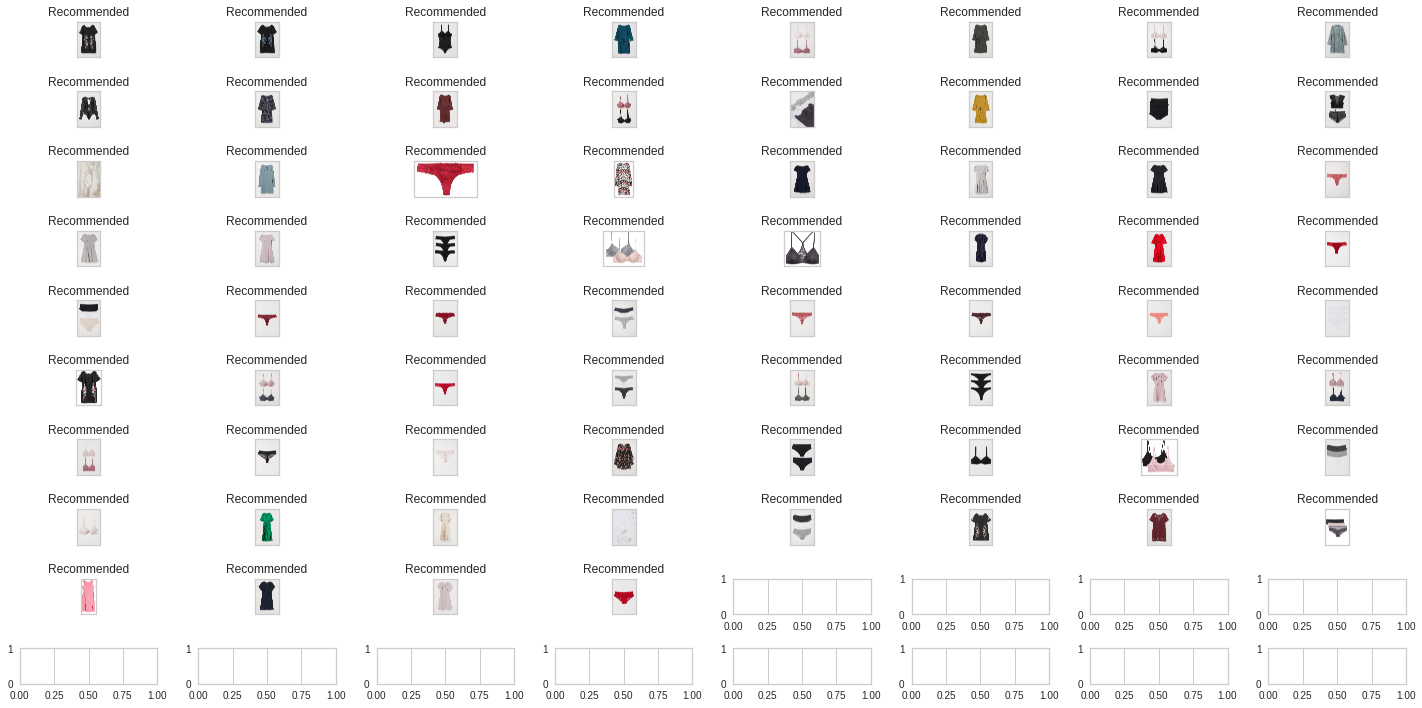

In [305]:
show_similar_to_predictions('01c8cb2f730cd7253bd3e290d98823894222b305139631fc0471d8d0b3a4bde9', prediction.getPredictions(), similar_items_df)

In [289]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import io


def find_article_by_image():
    # Define the file upload widget
    file_upload = widgets.FileUpload(
        accept='.jpg,.jpeg',
        multiple = False
    )

    # Define the output widget
    output = widgets.Output()

    # Define the button to start processing
    button = widgets.Button(description="Process Image")

    def process_image(b):
        # Clear the output widget
        with output:
            clear_output()

        # Get the uploaded file
        uploaded_file = file_upload.value
        uploaded_content = uploaded_file[list(uploaded_file.keys())[0]]['content']
        uploaded_filename = uploaded_file[list(uploaded_file.keys())[0]]['metadata']['name']
        uploaded_image = Image.open(io.BytesIO(uploaded_content))

        # # Open the uploaded image using PIL
        # uploaded_image = Image.open(uploaded_file_content)

        # Get the filename without the extension
        filename = uploaded_filename.split('.')[0][1:]
        
        # Find the article in the articles dataframe
        article = articles.loc[int(filename)]

        # Display the article information
        with output:
            if len(article) > 0:
                # Find similar items for each predicted item
                similar_items = []
                similar_items.append(similar_items_df[similar_items_df["item"] == int(filename)]["similar_items"].iloc[0])
                # Flatten the list of similar items and remove duplicates
                similar_items = list(set([item for sublist in similar_items for item in sublist]))
                # Show the images of the recommended items
                rows, columns, figsize = 2, 5, (20, 10)
                f, ax = plt.subplots(rows, columns, figsize=figsize)
                for i in range(rows):
                    for j in range(columns):
                        index = i * columns + j
                        if index < len(similar_items):
                            try:
                                img_path = f'{PATH}0{str(similar_items[index])[:2]}/0{int(similar_items[index])}.jpg'
                                img = Image.open(img_path)
                                ax[i,j].imshow(img)
                                ax[i,j].set_xticks([], [])
                                ax[i,j].set_yticks([], [])
                                ax[i,j].grid(False)
                                ax[i,j].set_title("Recommended")
                            except IndexError:
                                continue
                        else:
                            break
                                    
                plt.tight_layout()
                plt.show()

            else:
                print("No matching article found.")

    # Assign the button to call the process_image function
    button.on_click(process_image)

    # Display the widgets
    display(file_upload, button, output)

In [ ]:
find_article_by_image()